# Credit card case study:
## Problem Statement:
The aim of this project is to predict fraudulent credit card transactions using machine learning models. 




### Detecting Fraud is typically challenging because of these four characteristics of fraud:  
1. **Uncommon:** Fraud cases are in a minority, sometimes only 0, sometimes only 0.01% of a company’s transactions are fraudulent. If there are few cases of fraud, then there's little data to learn how to identify them.  This is known as **class imbalance**, and it's one of the main challenges of fraud detection. 
2. **Concealed:** Fraudsters will also try their best to blend in and conceal their activities. 
3. **Change over time:** Fraudsters will find new methods to avoid getting caught and change their behaviors over time.
4. **Organized:** Fraudsters oftentimes work together and organize their activities in a network, making it harder to detect. 

### How does a company deal with fraud?  
1. Use rules-based systems,based on manually set thresholds and experience to filter out strange cases.
2. Check the news: the fraud analytics team check the news for suspicious names. 
3. Receive external lists of fraudulent accounts and names: keep track of the external hits lists from the police to reference check against the client base.
4. Use machine learning algorithms to detect suspicious names and behaviors.
5. Combine different strategies and various models together to avoid sub-par detection results since organized crime schemes are so sophisticated and quick to adapt. 

### Machine Learning in Fraud Detection 
Traditional rules-based expert systems are not enough to catch fraud. They can do an excellent job of uncovering known patterns; but alone aren’t very effective at uncovering unknown schemes, adapting to new fraud patterns, or handling fraudsters’ increasingly sophisticated techniques. And this is where machine learning becomes necessary for fraud detection.   
Many in the financial services industry have updated their fraud detection to include some basic machine learning algorithms including various clustering classifiers, linear approaches, and support vector machines. The most advanced companies in the financial services industry, such as PayPal, have been pioneering more advanced artificial intelligence techniques such as deep neural networks and autoencoders. 
When building a machine-learning model suite for fraud detection, it is very important not only to identify bad activity(high true positive rate) but also to allow good transactions to go through(low false positive rate).    

### Supervised and Unsupervised Machine Learning

* Supervised Machine Learning: A model that is trained on a set of properly “labeled” transactions. Each transaction is tagged as either fraud or non-fraud.  Supervised machine learning model accuracy is directly correlated with the amount of clean, relevant training data. Common supervised machine learning methods include linear regression, logistic regression, 
* Unsupervised Machine Learning: A model that is trained in cases where tagged transaction data is relatively thin or non-existent. Unsupervised models are designed to discover outliers that represent previously unseen forms of fraud. In the real world of fraud detection, well labeled data is very rare. Therefore supervised machine learning methods alone can not do a good job and unsupervised learning will play an important role in the war. 

### Model Evaluation in Credit Card Fraud Detection
* Accuracy isn't everything. When working with highly imbalanced data, accuracy is not a reliable performance metric. Because by doing nothing but just predicting everything is in the maority class, you can obtain a higher accuracy than  by building a predictive model.  
* Precision: true positives / (true positives + false positives)  
* Recall : true positives / (true positives +false negatives) 
* F1-score: 2 x Precision x Recall / (Precision + Recall) = 2 x TP / (2 x TP + FP + FN)   
* A credit card company wants to watch as much fraud as possible(reduce false negatives) as fraudulent transactios can be very costly and a false alarm means someone's transaction is blocked(reduce false positives). The credit card company therefore wants to optimize recall. F-score takes into account a balance between precision and recall.  
* Precision-Recall Curve(PR): Precision vs. Recall at various threshold settings.  
* Average Precision(AP): 
* Receiver Operating Characteristic Curve(ROC): Ture positive rate vs. False positive rate at various shreshold settings. It's useful to compare performance of different algorithms for fraud detection.  
*  Area Under the Receiver Operating Characteristic Curve (ROCAUC):  
* The AUROC answers the question: "How well can this classifier be expected to perform in general, at a variety of different baseline probabilities?" but precision and recall don't. 
* Confusion Matrix: shows how many fraud cases you can predict correctly.  
* Classification Report: tells you about the precision and recall of your model. 

### Map of This Project
This project will use several different machine learning algorithms, from logistic regression to one of more advanced techniques, autoencoders.  
Module 1: Data Reading And Understanding
Module 2: Data Exploration  
Module 3: Logistic Regression    
Module 4: Decision Tree Classifier  
Module 5: Random Forest Classifier  
Module 6: Voting Classifier  
Module 7: K-means Clustering<br/>
Module 8: Resampling for Imbalanced Data   
Module 9: Running the above models again with resampled data <br/>
Module 10: Conclusion

### Dataset Context 
* The data contains **284,807** European credit card transactions with **492** fraudulent transactions that occurred over two days in September 2013.    
* Everything except the time and amount has been reduced by a Principle Component Analysis (PCA) for privacy concerns.  Features V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 
* In order to implement a PCA transformation, features need to be previously **scaled**. So features V1, V2, ... V28 have been scaled already.  
* Feature **'Time'** contains the seconds elapsed between each transaction and the first transaction in the dataset.   
* The feature **'Amount'** is the transaction Amount, this feature can be used for example-dependant cost-senstive learning.    
* Feature **'Class'** is the response variable and it takes value 1 in case of fraud and 0 otherwise.    
* The dataset is highly **unbalanced**, the positive class (frauds) account for **0.172%** of all transactions. Given the class imbalance ratio, Area Under the Precision-Recall Curve (AUPRC) are recommend to measure the accuracy.  Confusion matrix accuracy is not meaningful for unbalanced classification due to this [Accuracy Paradox](https://en.wikipedia.org/wiki/Accuracy_paradox)

# Module 1: Data Preprocessing:

## Importing the libraries:



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', 100)

from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve,roc_auc_score, precision_recall_curve, average_precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
# Reading the data
from google.colab import files
# uploaded = files.upload()

In [ ]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.shape

(284807, 31)

There are 284807 rows and 31 columns.

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
occ

0    284315
1       492
Name: Class, dtype: int64

There are 284315 non fraudulent transactions and 492 fraudulent transactions.

In [ ]:
# checking for missing values, if any:
round(100*(df.isnull().sum()/len(df.index)),2)

Time      0.0
V1        0.0
V2        0.0
V3        0.0
V4        0.0
V5        0.0
V6        0.0
V7        0.0
V8        0.0
V9        0.0
V10       0.0
V11       0.0
V12       0.0
V13       0.0
V14       0.0
V15       0.0
V16       0.0
V17       0.0
V18       0.0
V19       0.0
V20       0.0
V21       0.0
V22       0.0
V23       0.0
V24       0.0
V25       0.0
V26       0.0
V27       0.0
V28       0.0
Amount    0.0
Class     0.0
dtype: float64

There is no null values in the dataset.

In [ ]:
# Note:There are no missing value or null values present in this dataset.
df = df.dropna()

In [ ]:
print(df.groupby('Class').aggregate({'Amount':'min'}))
print('\n')
print(df.groupby('Class').aggregate({'Amount':'max'}))
print('\n')
print(df.groupby('Class').aggregate({'Amount':'mean'}))

       Amount
Class        
0         0.0
1         0.0


         Amount
Class          
0      25691.16
1       2125.87


           Amount
Class            
0       88.291022
1      122.211321


The maximum amount was 2125 and the mean was around 122.Clearly there is class imbalance in the data.

In [ ]:
df.groupby('Class').aggregate({'Time':'mean'})

,Time
Class,
0,94838.202258
1,80746.806911


# Data Understanding on the first look:
Except for the transaction and amount we dont know what the other columns are (due to privacy reasons). The only thing we know, is that those columns that are unknown have been scaled already.

- The transaction amount is relatively small. The mean of all the mounts made is approximately USD 88.
- There are no "Null" values, so we don't have to work on ways to replace values.
- Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (017%) of the time in the dataframe.<br/>

### PCA Transformation: 
- The description of the data says that all the features went through a PCA transformation (Dimensionality Reduction technique) (Except for time and amount).

### Scaling: 
- In order to implement a PCA transformation features need to be previously scaled. (In this case, all the V features have been scaled )

# EDA:
<br/>
Here we will observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
df['normal_share']=classes[0]/df['Class'].count()*100
df['fraud_share']=classes[1]/df['Class'].count()*100

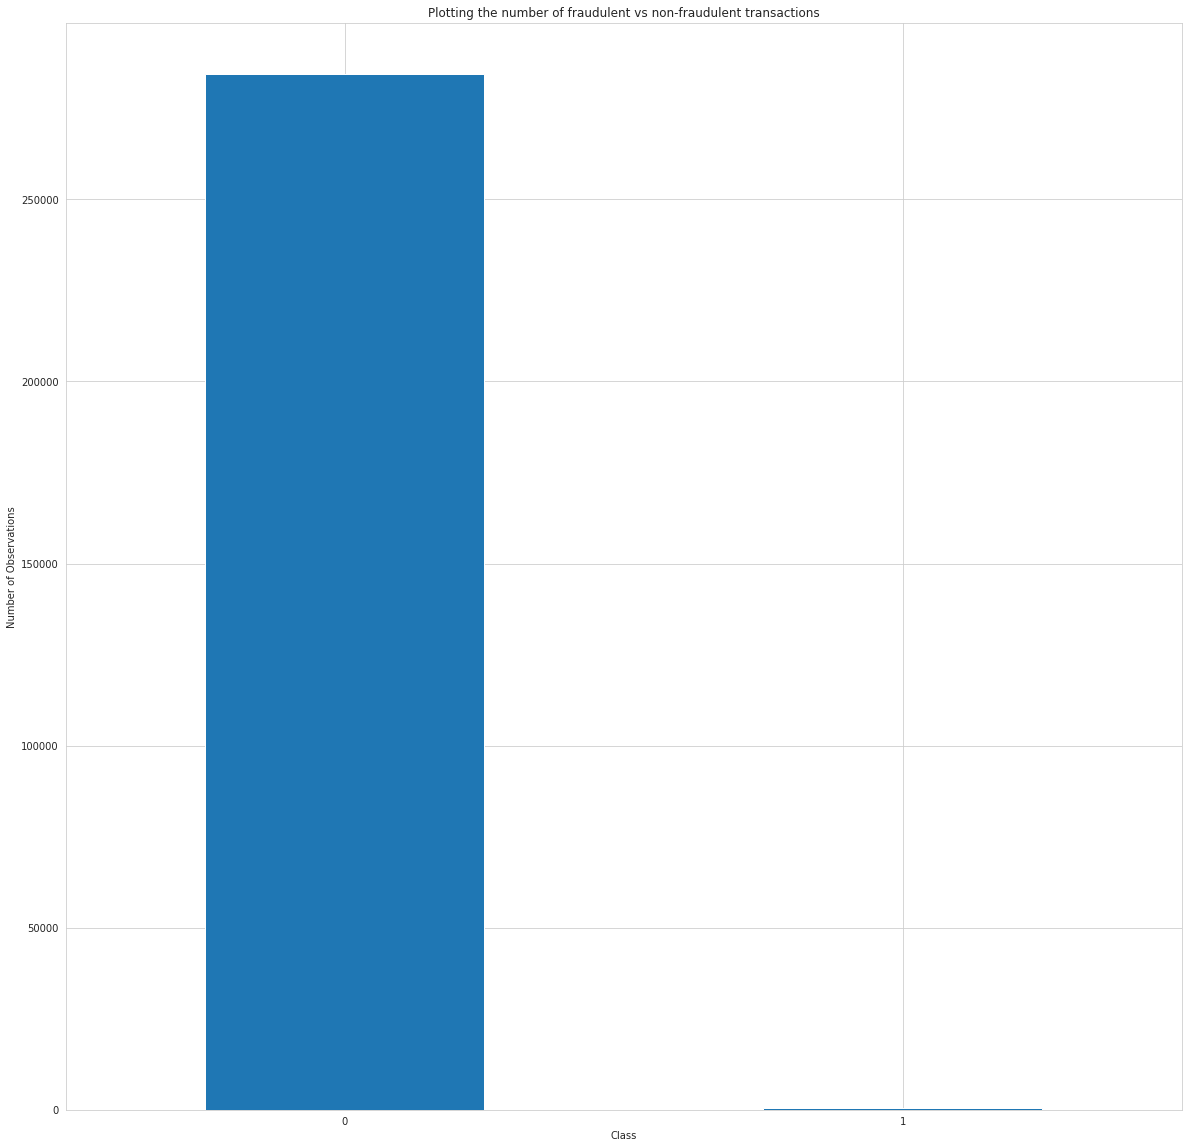

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transactions

plt.xlabel("Class")
plt.ylabel("Number of Observations")
occ.plot(kind = 'bar',title = 'Plotting the number of fraudulent vs non-fraudulent transactions',rot=0)

The indifference in  the class group is shown in this bar plot with class 0(non-fraudelent activity) on the higher side of the data set.


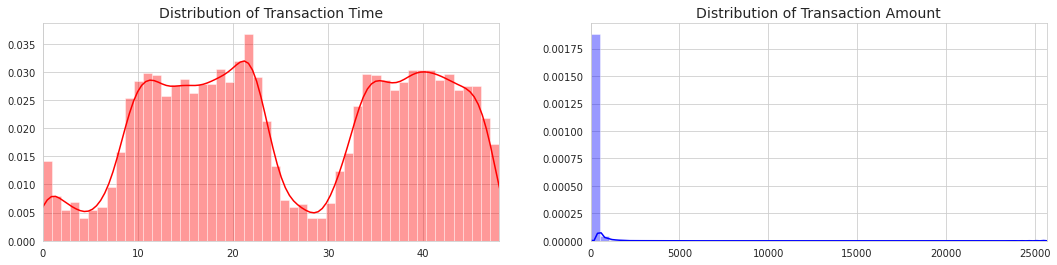

In [ ]:
# Scatter Plot

fig, ax = plt.subplots(1, 2, figsize=(18,4))

# Plot the distribution of 'Time' feature 
sns.distplot(df['Time'].values/(60*60), ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Time', fontsize=14)
ax[0].set_xlim([min(df['Time'].values/(60*60)), max(df['Time'].values/(60*60))])

# Plot the distribution of 'Amount' feature
sns.distplot(df['Amount'].values, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Amount', fontsize=14)
ax[1].set_xlim([min(df['Amount'].values), max(df['Amount'].values)])

plt.show()

### Summary:
Time: Most transactions happended in day time.
Mean of transaction amount is **88 USD** and 75% quatile is 77 USD.
We should better scale these two skewed features also.

## Dividing the dataset into fraud and non fraud:

In [ ]:
# Seperate total data into non-fraud and fraud cases
df_nonfraud = df[df.Class == 0] #save non-fraud df observations into a separate df
df_fraud = df[df.Class == 1] #do the same for frauds

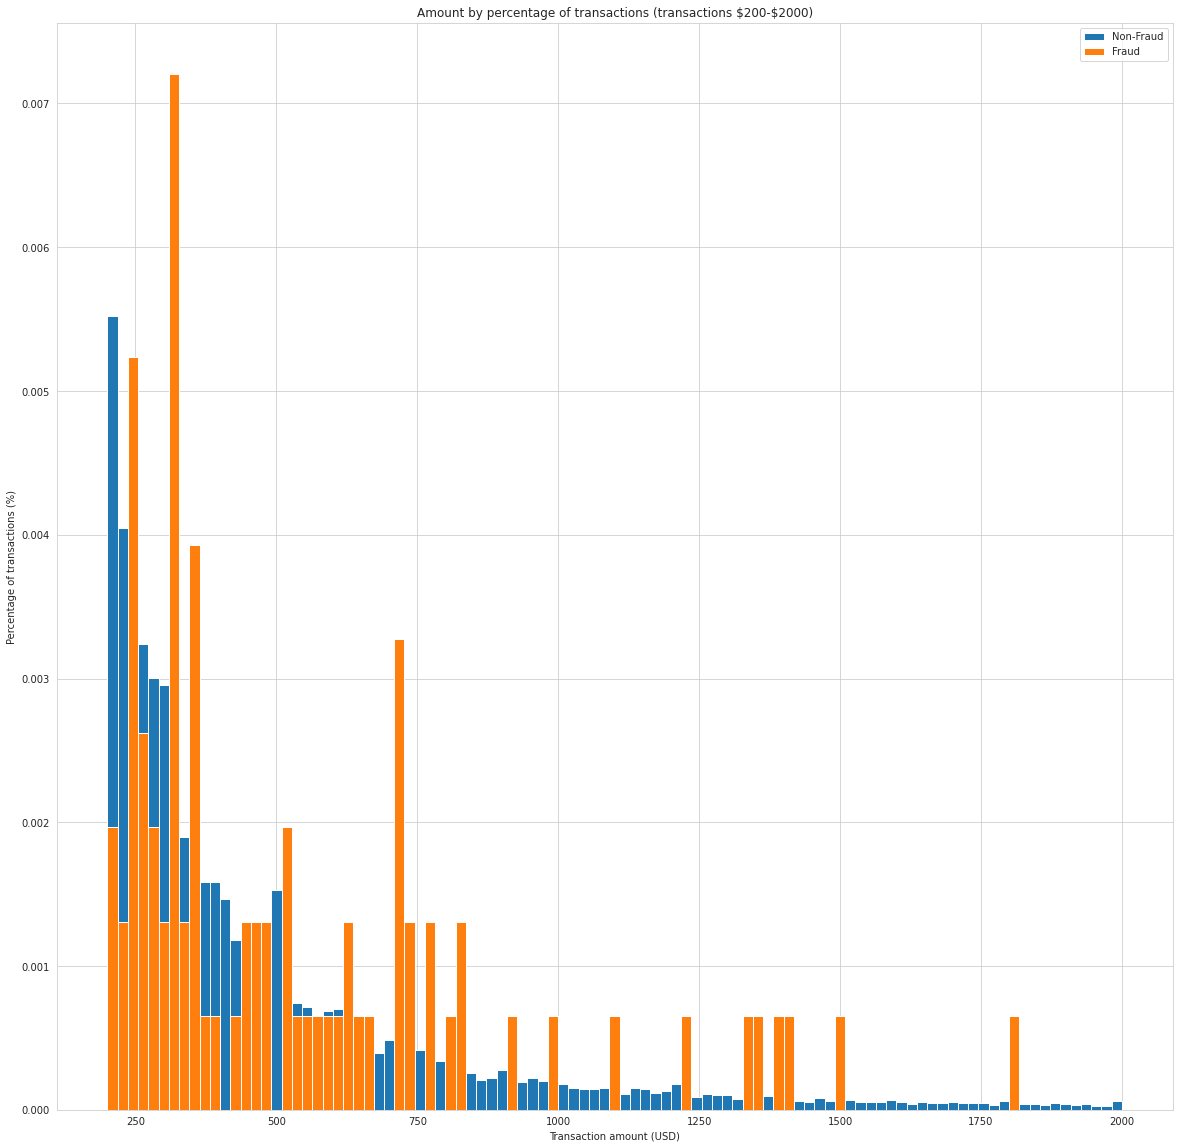

In [ ]:
# Plot of high value transactions($200-$2000)
bins = np.linspace(200, 2000, 100)
plt.hist(df_nonfraud.Amount, bins, alpha=1,density=True, label='Non-Fraud')
plt.hist(df_fraud.Amount, bins, alpha=1, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Amount by percentage of transactions (transactions \$200-$2000)")
plt.xlabel("Transaction amount (USD)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

### Findings:
1. In the long tail, fraud transaction happened more frequently.
2. It seems It would be hard to differentiate fraud from normal transactions by transaction amount alone.

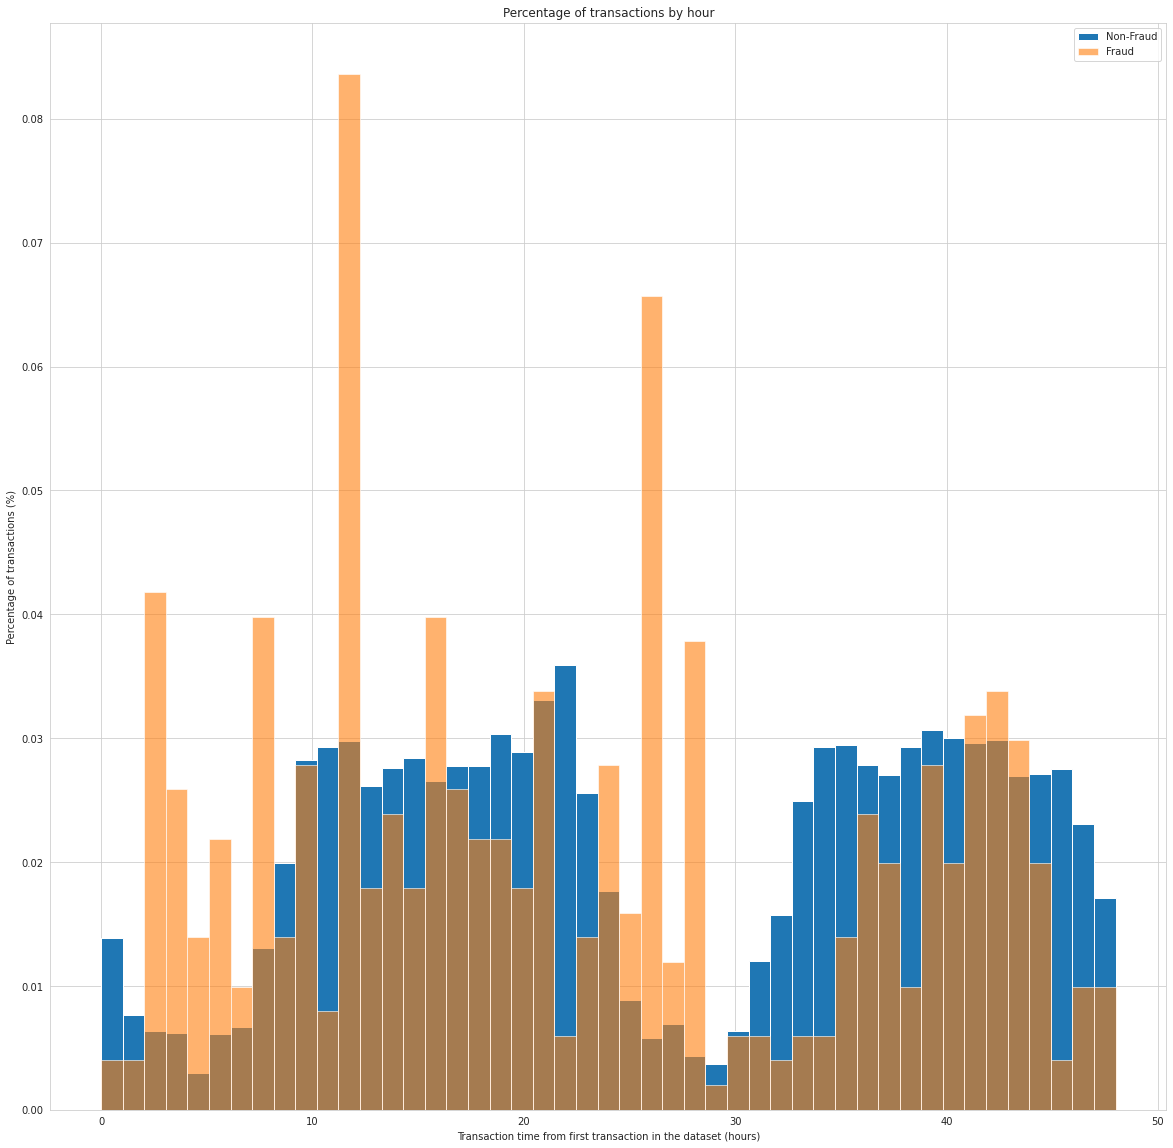

In [ ]:
# Plot of transactions in 48 hours
bins = np.linspace(0, 48, 48) #48 hours
plt.hist((df_nonfraud.Time/(60*60)), bins, alpha=1, density=True, label='Non-Fraud')
plt.hist((df_fraud.Time/(60*60)), bins, alpha=0.6, density=True, label='Fraud')
plt.legend(loc='upper right')
plt.title("Percentage of transactions by hour")
plt.xlabel("Transaction time from first transaction in the dataset (hours)")
plt.ylabel("Percentage of transactions (%)")
plt.show()

There is a heavy decrease in normal transactions from hours 1 to 8 and again roughly at hours 24 to 32, it seems fraud tends to occur at higher rates during the night.
<br/>
# Transaction amount vs hour:

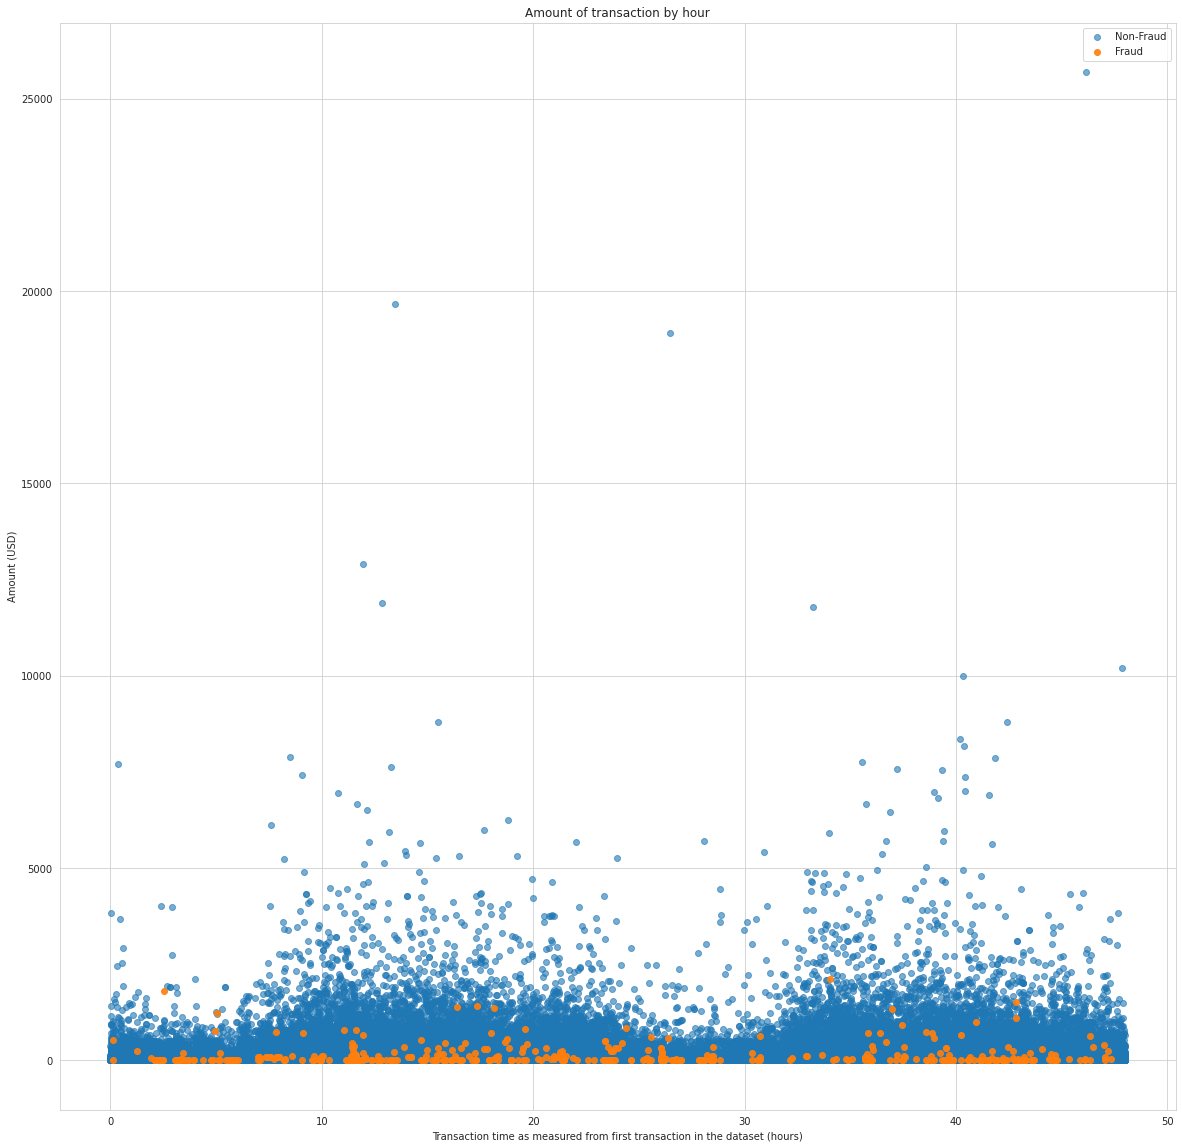

In [ ]:
# Plot of transactions in 48 hours
plt.scatter((df_nonfraud.Time/(60*60)), df_nonfraud.Amount, alpha=0.6, label='Non-Fraud')
plt.scatter((df_fraud.Time/(60*60)), df_fraud.Amount, alpha=0.9, label='Fraud')
plt.title("Amount of transaction by hour")
plt.xlabel("Transaction time as measured from first transaction in the dataset (hours)")
plt.ylabel('Amount (USD)')
plt.legend(loc='upper right')
plt.show()

There is a clear outlier in terms of non-fradulent transactions since its large in size in comparison to fradulent transaction. It may be due to certain pattern in the fradulent activity. So we have decided not to drop any values as outliers.

# Dropping the unnecessary columns:
The time column doesnot provide any useful information. So we decided to drop it.

In [ ]:
df = df.drop(['Time'],axis = 1,inplace=False)

# Finding the correlation between various features:

Text(0.5, 1.0, 'Imbalanced Correlation Matrix')

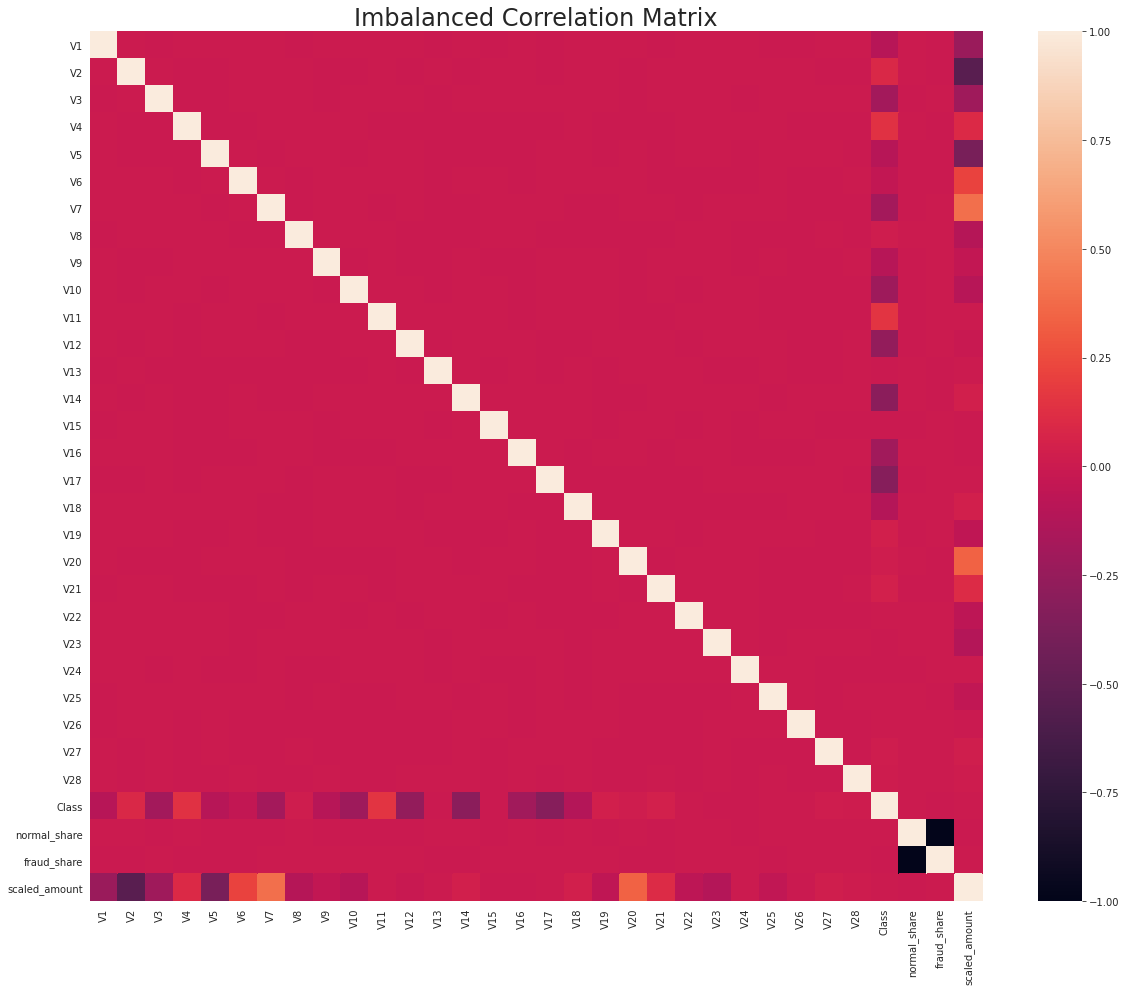

In [ ]:
# Calculate pearson correlation coefficient
corr = df_scaled.corr()

# Plot heatmap of correlation
f, ax = plt.subplots(1, 1, figsize=(20,16))
sns.heatmap(corr, annot_kws={'size':20})
ax.set_title("Imbalanced Correlation Matrix", fontsize=24)

- The class variable is highly correlated with the V14,V17,V4 variables.
- Scaled amount is highly correlated with V2,V5 variables.

# Feature Density Plot:

<Figure size 1440x1440 with 0 Axes>

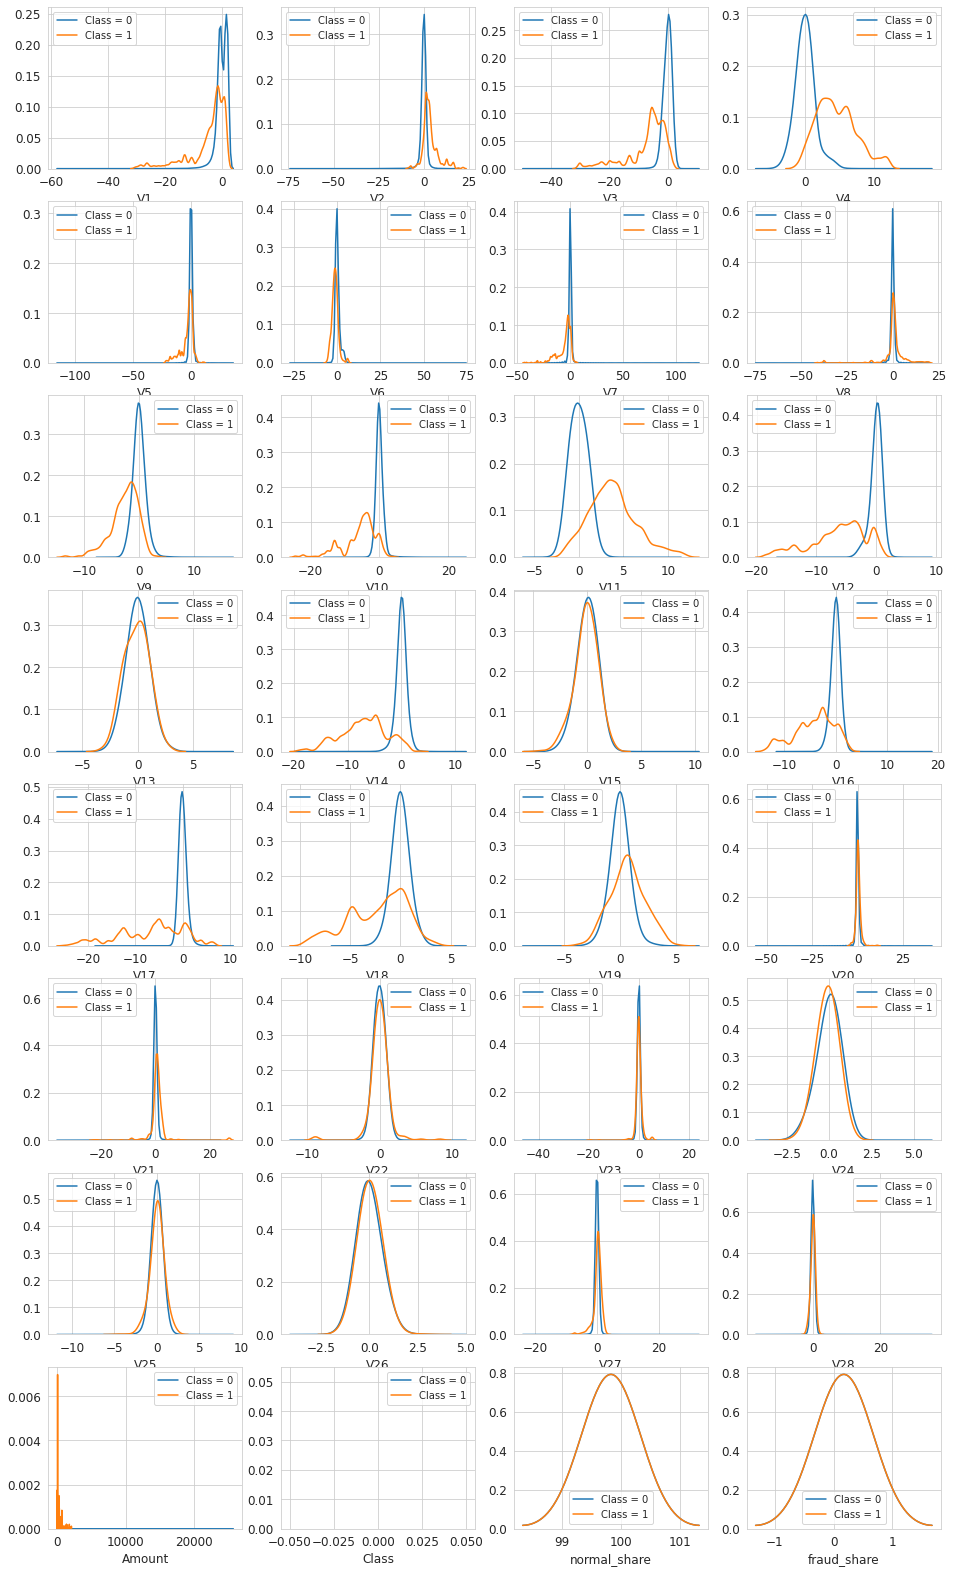

In [ ]:
var = df.columns.values

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8,4,figsize=(16,28))

for feature in var:
    if i <32:
      i += 1
      plt.subplot(8,4,i)
      sns.kdeplot(t0[feature], bw=0.5,label="Class = 0")
      sns.kdeplot(t1[feature], bw=0.5,label="Class = 1")
      plt.xlabel(feature, fontsize=12)
      locs, labels = plt.xticks()
      plt.tick_params(axis='both', which='major', labelsize=12)
    
plt.show();

### Define predictors and target values

Let's define the predictor features and the target features. Categorical features, if any, are also defined. In our case, there are no categorical feature.

In [ ]:
target = 'Class'
predictors = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',\
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19',\
       'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28',\
       'Amount']

In [ ]:
# Import library
from sklearn.model_selection import train_test_split

In [ ]:
# Putting feature variables into X
X = df.drop(['Class'], axis=1)

In [ ]:
# Putting target variable to y
y = df['Class']

In [ ]:
# Splitting data into train and test set 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

# Split Test and Train Dataset:

In [ ]:

# Create the training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=0)


## Feature Scaling
We need to scale only the `Amount` column as all other columns are already scaled by the PCA transformation.

In [ ]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [ ]:
# Instantiate the Scaler
scaler = StandardScaler()

In [ ]:
# Fit the data into scaler and transform
X_train['Amount'] = scaler.fit_transform(X_train[['Amount']])

In [ ]:
X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,normal_share,fraud_share
161145,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,-0.362707,0.527911,0.505396,-0.742107,0.492430,-0.163585,-0.950404,0.262987,-1.760767,-0.939037,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,-0.165692,99.827251,0.172749
204520,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,0.028747,-1.208334,0.838156,1.511476,-0.042076,-0.002894,0.080270,-0.658905,-0.747678,0.431762,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,-0.352239,99.827251,0.172749
182659,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,1.404677,1.346697,0.140822,0.159637,-1.147153,0.664997,-0.133032,-1.267675,0.818995,0.405276,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,0.330886,99.827251,0.172749
25117,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,0.619206,0.103615,-1.067971,-1.227629,0.197196,1.151364,0.846905,0.710309,-1.963506,0.130406,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,-0.336067,99.827251,0.172749
227642,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,-1.033567,-0.706095,-0.612354,-0.336939,-1.384147,0.314279,0.552201,0.512582,0.370183,-0.163736,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,0.005211,99.827251,0.172749


##### Scaling the test set
We don't fit scaler on the test set. We only transform the test set.

In [ ]:
# Transform the test set
X_test['Amount'] = scaler.transform(X_test[['Amount']])
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,normal_share,fraud_share
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,-1.118863,0.202647,1.145965,-1.802360,-0.247178,-0.060945,0.846606,0.379454,0.847262,0.186409,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,-0.197752,99.827251,0.172749
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,-0.854776,-0.620458,-0.806471,-0.770837,-0.108158,0.258964,0.492095,-0.148516,-0.148099,-0.096502,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,-0.352239,99.827251,0.172749
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,-1.726259,-0.736771,-1.516835,0.348343,0.041437,0.732681,-1.136766,0.816653,-1.578951,0.419835,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0.029794,99.827251,0.172749
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,1.551682,0.435125,-0.336022,0.278965,1.812232,0.080001,0.116347,0.291818,0.106228,-0.987790,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0.891218,99.827251,0.172749
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,0.664531,-3.282511,0.409266,1.252202,-0.868774,0.214387,1.878003,-1.906559,0.263854,-0.126871,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,-0.339968,99.827251,0.172749


In [ ]:
# Listing the columns
cols = X_train.columns
cols

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'normal_share', 'fraud_share'],
      dtype='object')

# Plotting the distribution of a variable

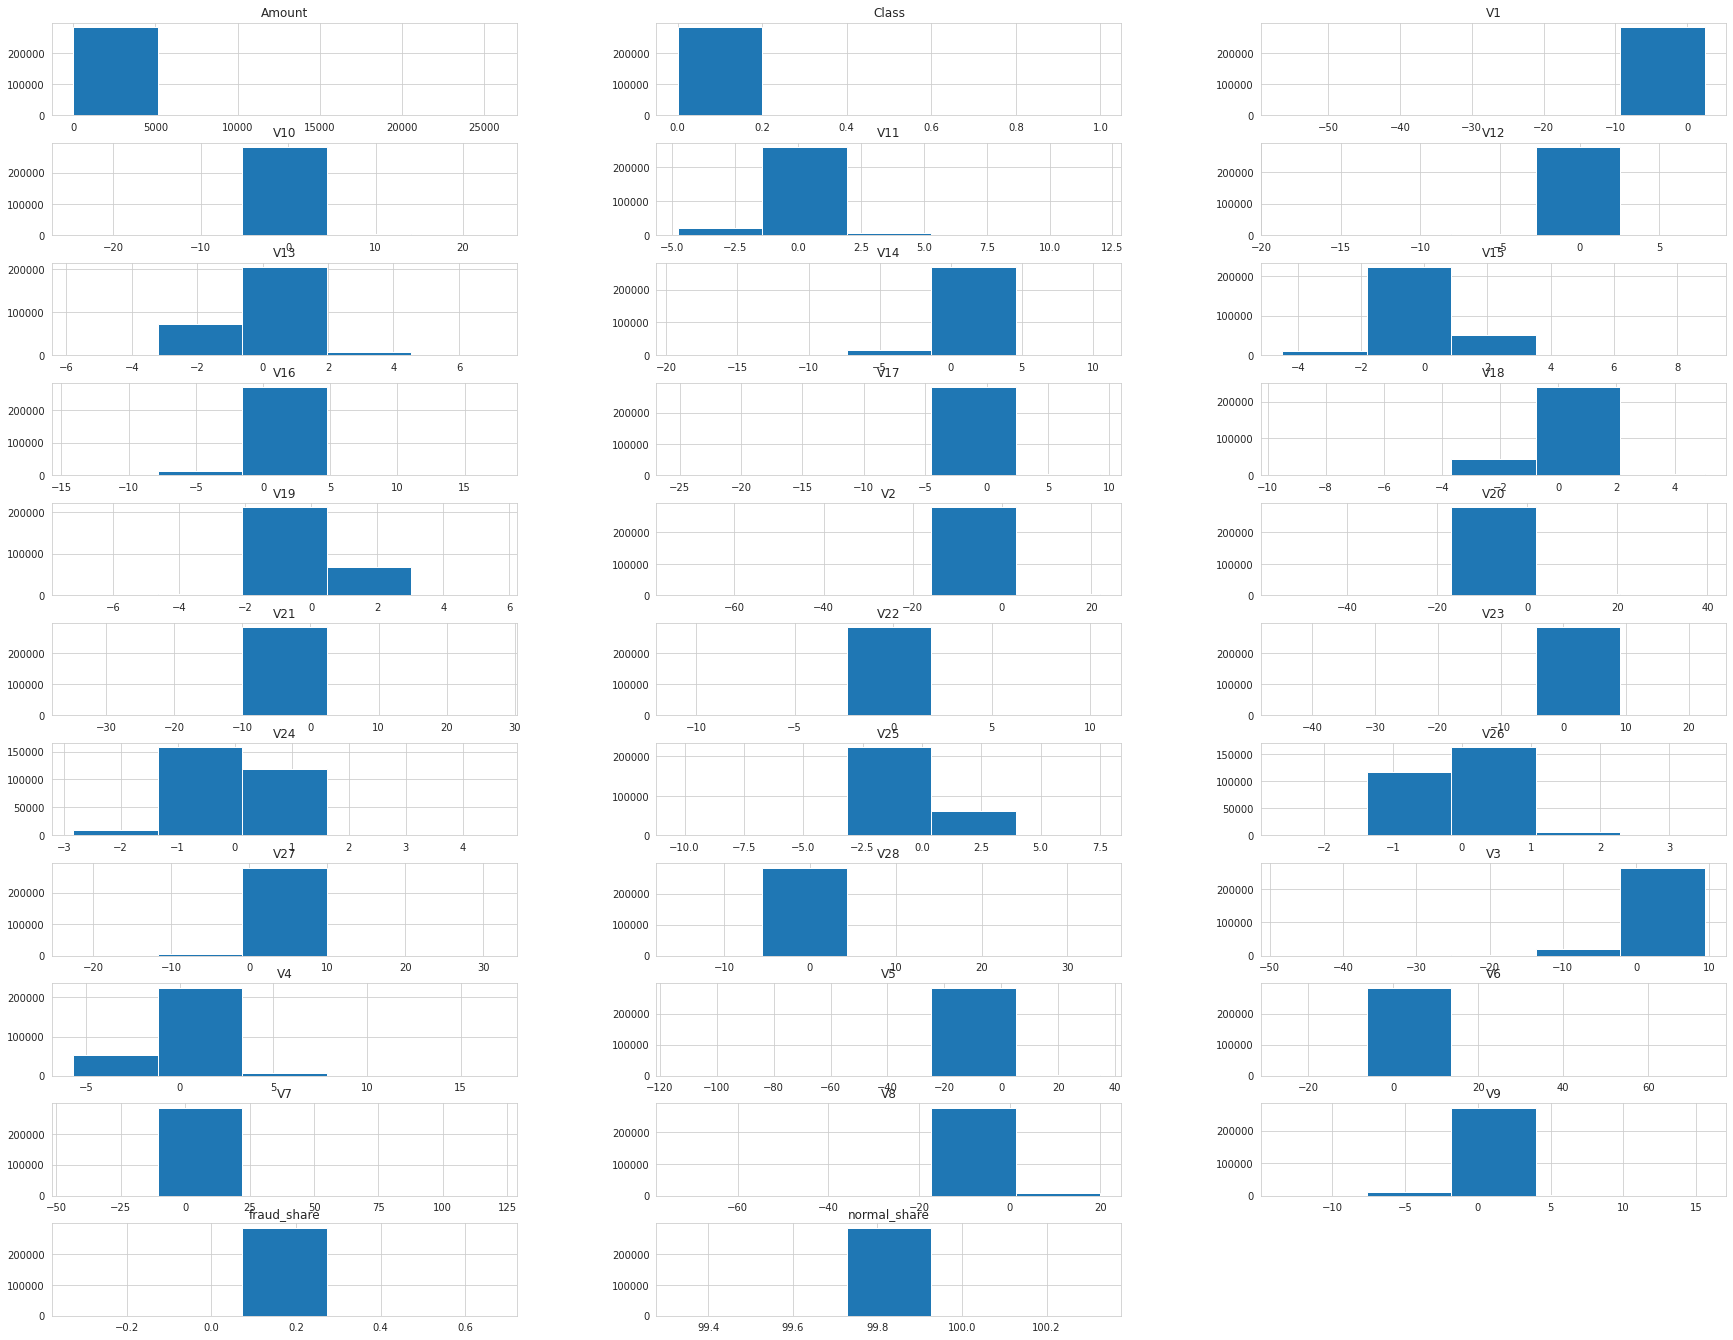

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
df.hist(bins=5, figsize=(30, 26), layout=(12, 3));

### If there is skewness present in the distribution use:
Power Transformer package present in the preprocessing library provided by sklearn to make distribution more gaussian

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

from sklearn.preprocessing import  PolynomialFeatures, PowerTransformer


In [ ]:
# performing fit_transform on the train dataset:
pt = PowerTransformer(method="yeo-johnson",standardize=True,copy=False)
X_train[cols]=pt.fit_transform(X_train)             

In [ ]:
# performing Transform on the train dataset:
X_test[cols]=pt.transform(X_test)

# Predefined Methods for generating Model Results:

In [ ]:

# Define a roc_curve function
def plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=5, label='AUC = %0.3f'% roc_auc)
    plt.plot([0,1],[0,1], linewidth=5)
    plt.xlim([-0.01, 1])
    plt.ylim([0, 1.01])
    plt.legend(loc='upper right')
    plt.title('Receiver operating characteristic curve (ROC)')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

# Define a precision_recall_curve function
def plot_pr_curve(recall, precision, average_precision):
    plt.step(recall, precision, color='b', alpha=0.2, where='post')
    plt.fill_between(recall, precision, step='post', alpha=0.2, color='b')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.ylim([0.0, 1.05])
    plt.xlim([0.0, 1.0])
    plt.title('2-class Precision-Recall curve: AP={0:0.2f}'.format(average_precision))
    plt.show()
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 3, scoring=scoring)
    return np.mean(xval)

In [ ]:
def PrintModelResults(Name,ytest,ypred,false_positive_rate, true_positive_rate, threshold):
    print('*'*70)
    print(Name)
    print('*'*70)
    # Calculate average precision 
    average_precision = average_precision_score(y_test, y_predicted)
    
    roc_auc = roc_auc_score(y_test, probs[:, 1])
    
    # Obtain precision and recall 
    precision, recall, thresholds = precision_recall_curve(y_test, y_predicted)

    print('ROC AUC Score:',roc_auc)

    print('Classification report:\n', classification_report(ytest, ypred))
    print('Confusion matrix:\n', confusion_matrix(y_true = ytest, y_pred = ypred))

    print('Accuracy :{0:0.5f}'.format(metrics.accuracy_score(ypred , ytest)))
    
    print("F1 Score: {}".format(f1_score(y_true = ytest, y_pred = ypred)))

    print("Recall score: {}".format(recall_score(y_true = ytest, y_pred = ypred)))

    print("Precision score: {}".format(precision_score(y_true = ytest, y_pred = ypred)))

    # Plot the roc curve 
    plot_roc_curve(false_positive_rate,true_positive_rate,roc_auc)

    # Plot recall precision curve
    plot_pr_curve(recall, precision, average_precision)
    print('*'*70)

# Module 3: Logistic Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


# Fit a logistic regression model to our data
model = LogisticRegression()
model.fit(X_train, y_train)

# Obtain model predictions
y_predicted = model.predict(X_test)

## Model Evaluation

**********************************************************************
Logistic Regression Classifier: 
**********************************************************************
ROC AUC Score: 0.978236093724678
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85284    12]
 [   56    91]]
Accuracy :0.99920
F1 Score: 0.728
Recall score: 0.6190476190476191
Precision score: 0.883495145631068


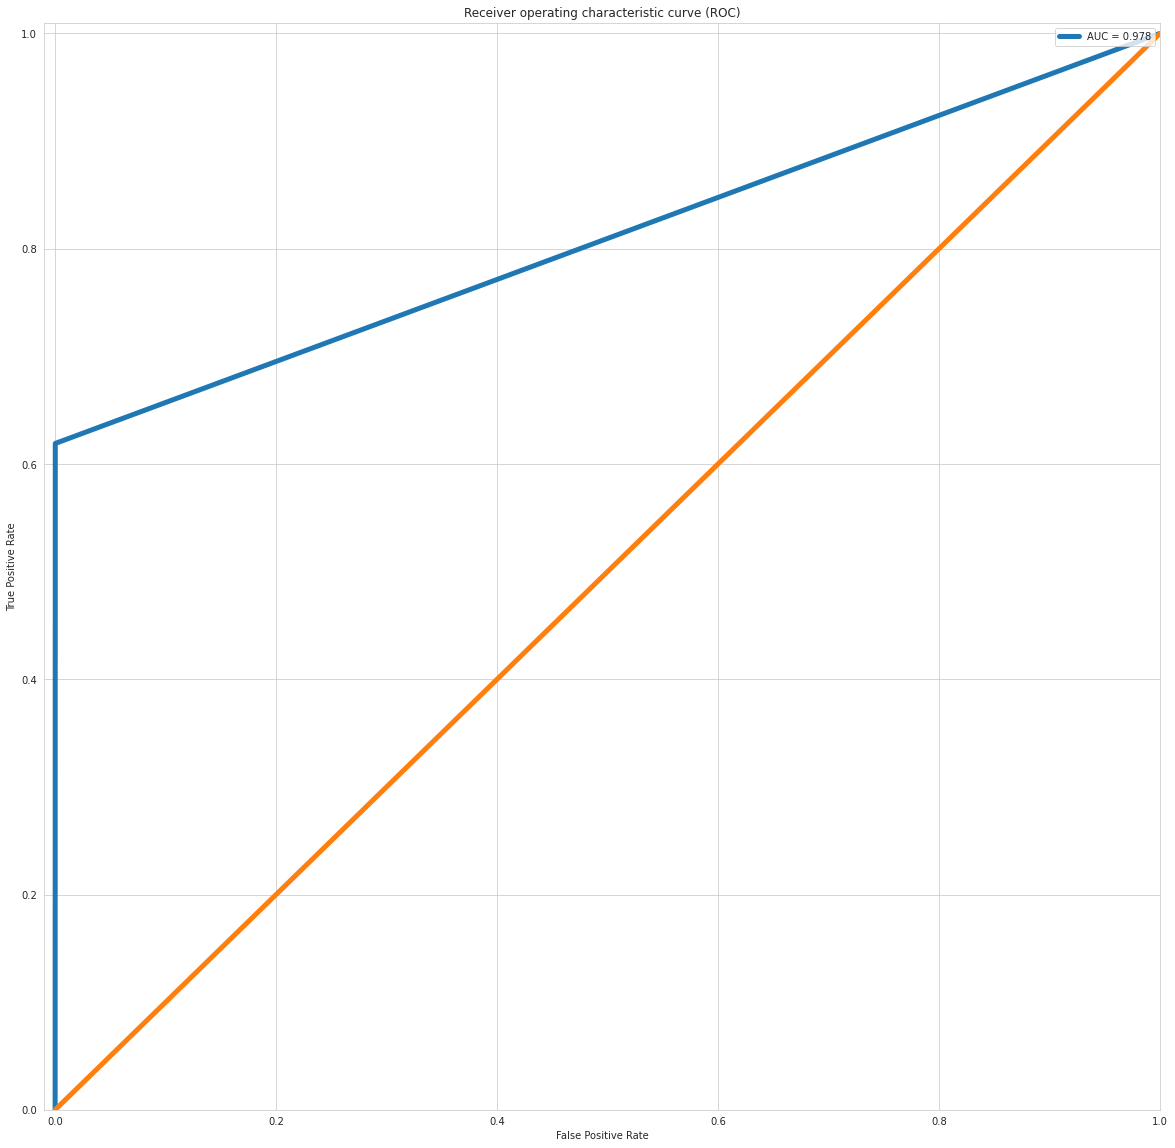

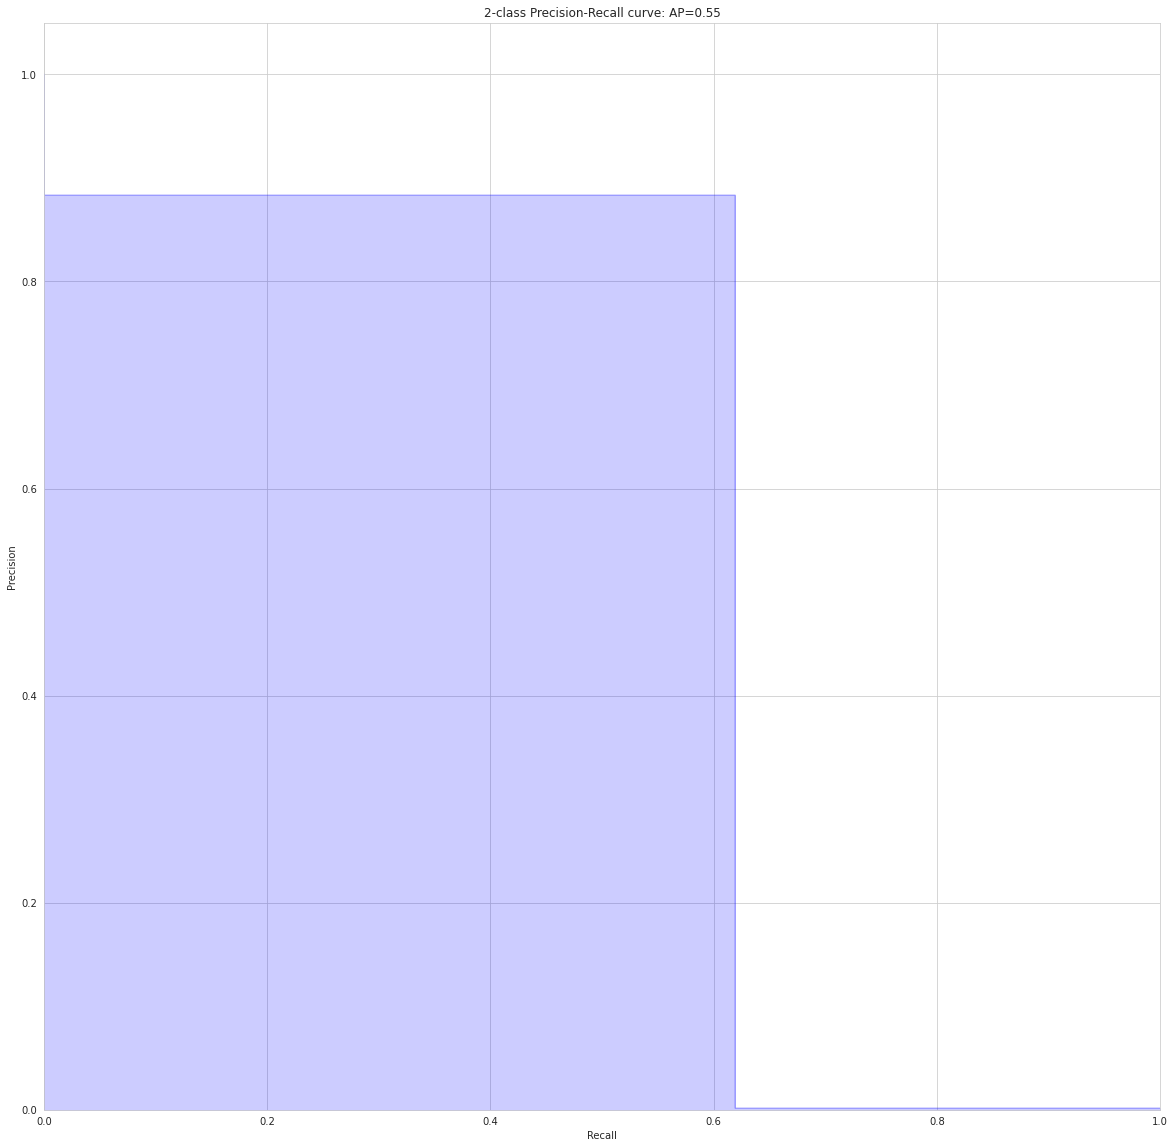

**********************************************************************


In [ ]:


# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

# Calculate Area Under the Receiver Operating Characteristic Curve 
probs = model.predict_proba(X_test)

PrintModelResults("Logistic Regression Classifier: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)


Accuracy score= 99.92% which is higher than the baseline 99.83%.  
Precision = 91/(12+91) = 0.88.  The rate of true positive in all positive cases.  
Recall =  91/ (56+91) = 0.62.  The rate of true positive in all true cases.  
F1-score = 0.73  
False positives cases =   12.  
The AUC ROC is 0.972.

## GridSearchCV to find optimal parameters for Logistic Regression:

In [ ]:
# Logistic Regression 

# Define the parameter sets to test
param_grid = {"penalty": ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}


# Define the model to use
model = LogisticRegression(random_state=5)
rungs=False
if rungs==True:
  # Combine the parameter sets with the defined model
  CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

  # Fit the model to our training data and obtain best parameters
  CV_model.fit(X_train, y_train)
  print(CV_model.best_params_)
else:
  ''' 
  The optimum hyperparameters are:
{C= 100, penalty= 'l2'} '''

## Model results using GridSearchCV

**********************************************************************
Logistic Regression:
**********************************************************************
ROC AUC Score: 0.978236093724678
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.88      0.62      0.73       147

    accuracy                           1.00     85443
   macro avg       0.94      0.81      0.86     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85284    12]
 [   56    91]]
Accuracy :0.99920
F1 Score: 0.728
Recall score: 0.6190476190476191
Precision score: 0.883495145631068


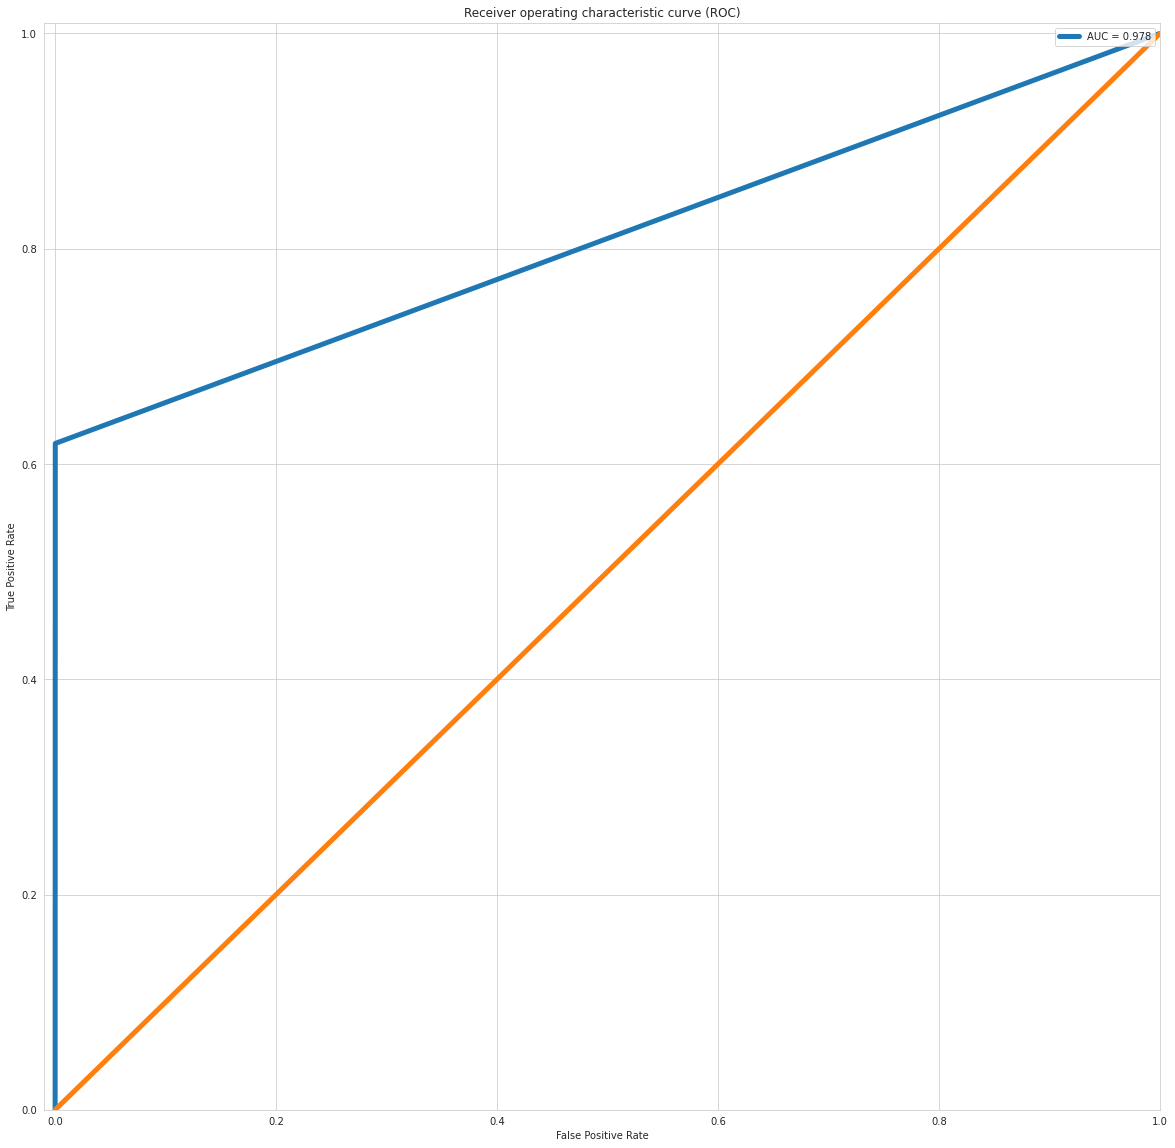

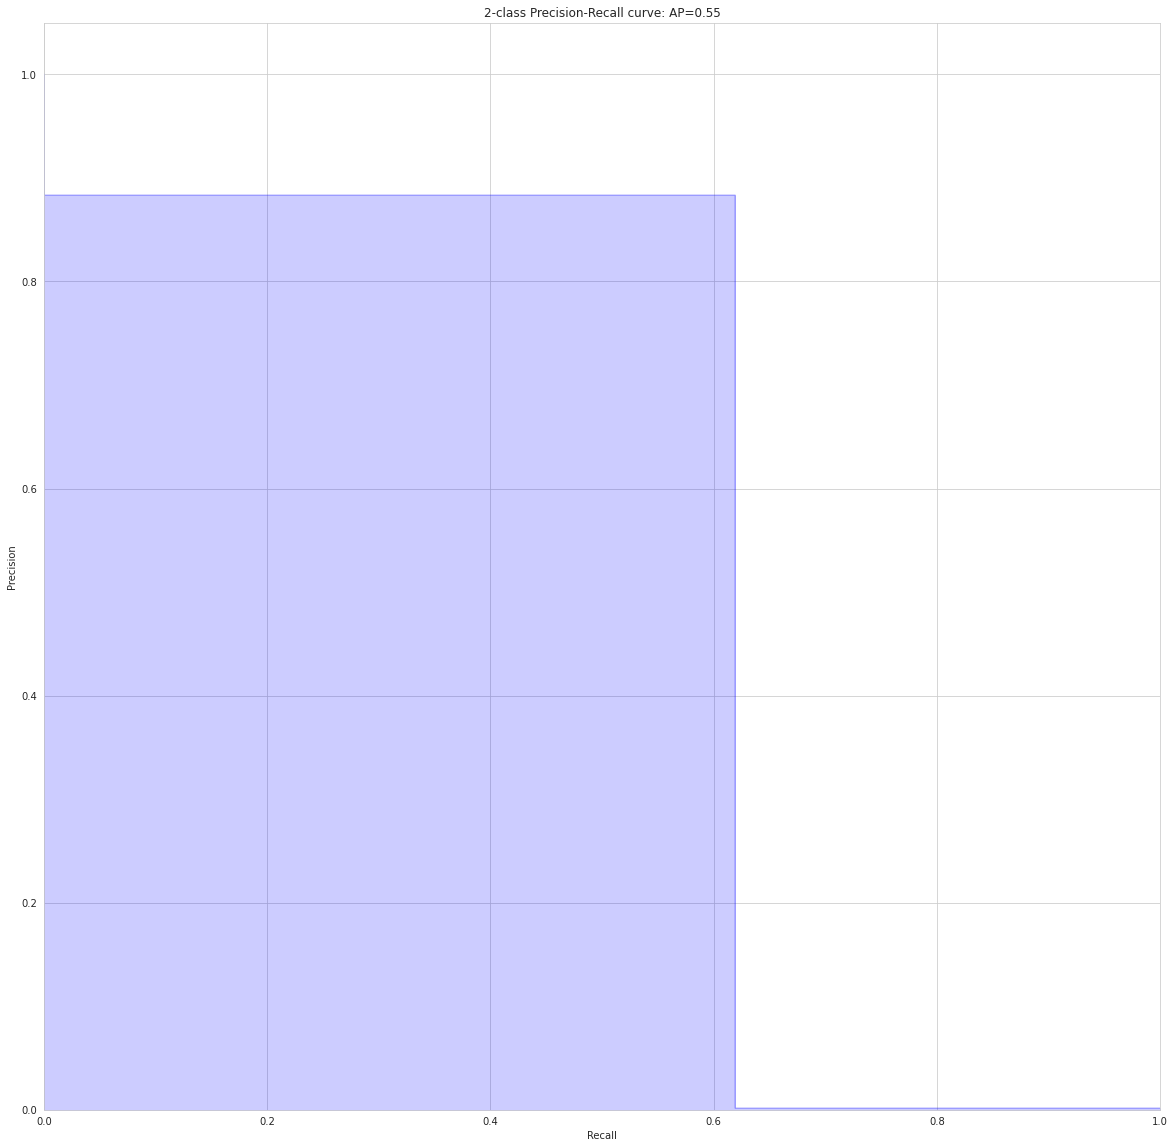

**********************************************************************


In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Build a RandomForestClassifier using the GridSearchCV parameters
model = LogisticRegression(C= 100, penalty= 'l2')

# Fit the model to your training data and get the predicted results
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)
# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("Logistic Regression:",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

# Module 4: Decision Tree Classifier

**********************************************************************
Decision Tree Classifier: 
**********************************************************************
ROC AUC Score: 0.978236093724678
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.80      0.76      0.78       147

    accuracy                           1.00     85443
   macro avg       0.90      0.88      0.89     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85269    27]
 [   36   111]]
Accuracy :0.99926
F1 Score: 0.7789473684210526
Recall score: 0.7551020408163265
Precision score: 0.8043478260869565


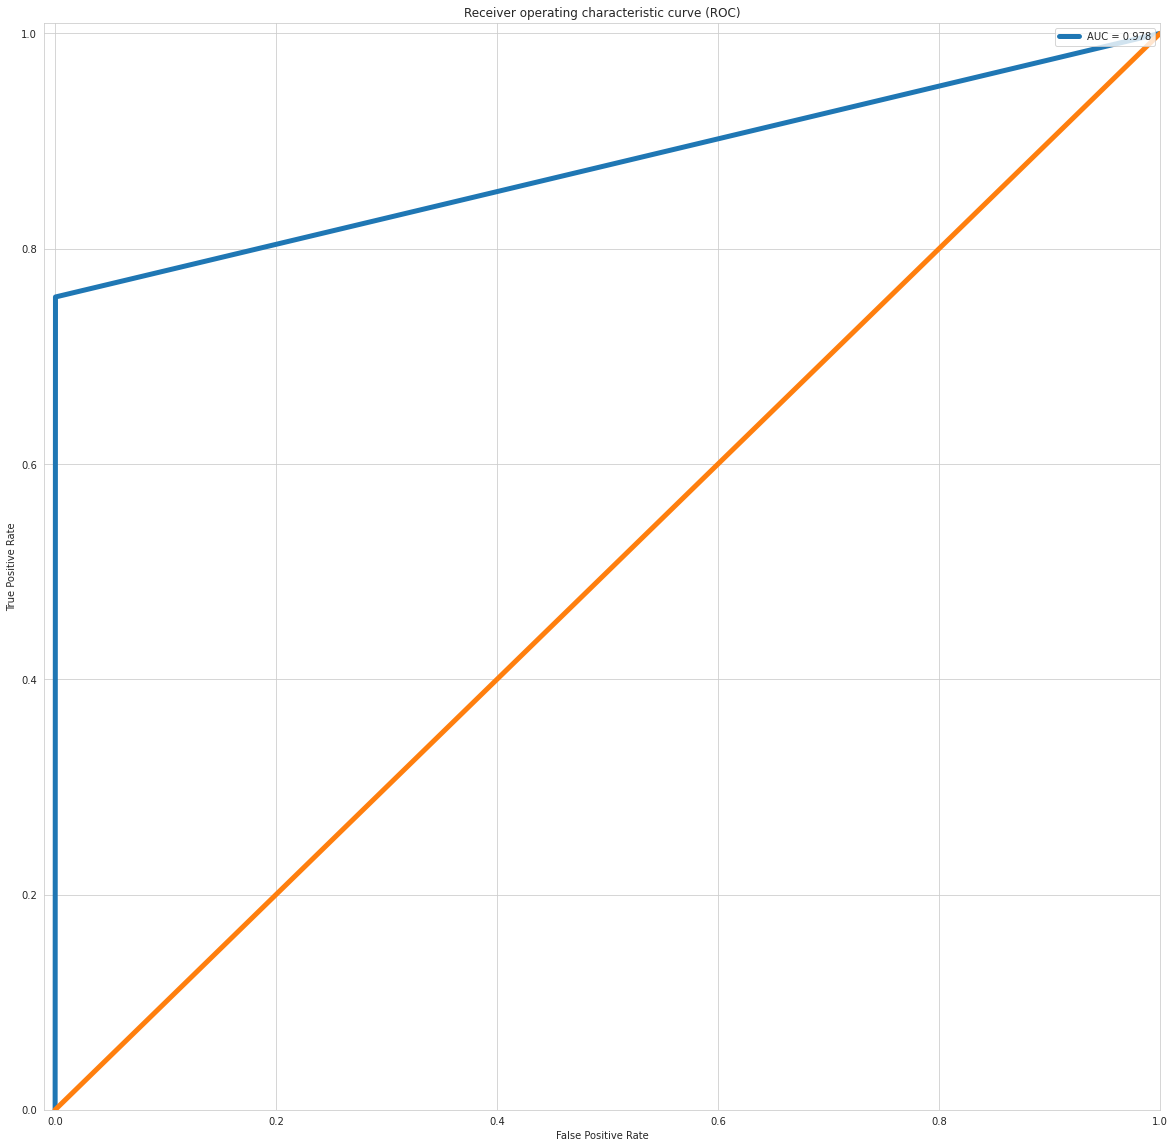

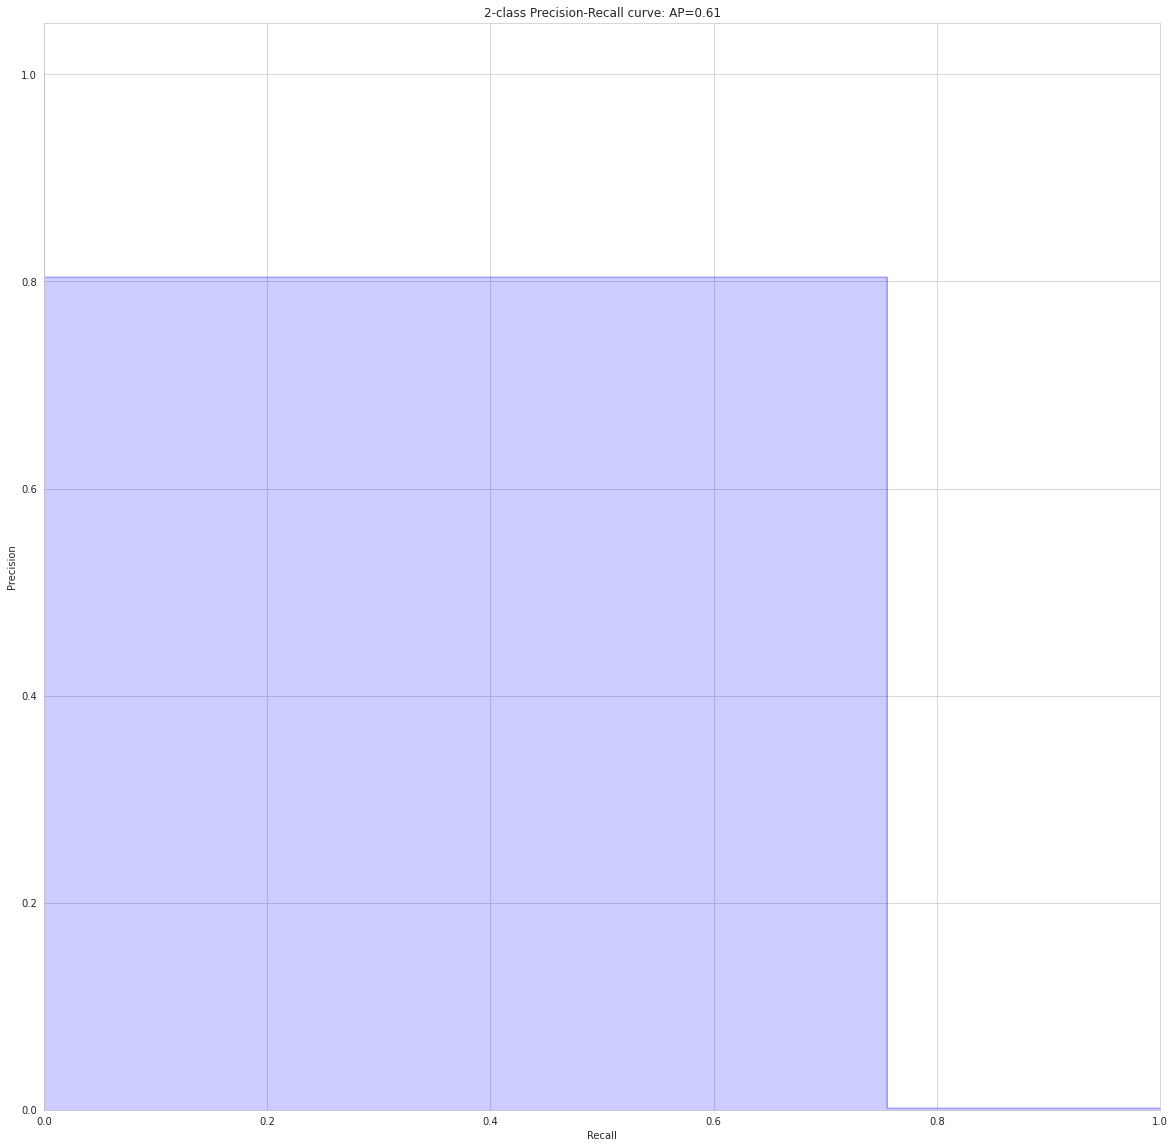

**********************************************************************


In [ ]:
# Import the decision tree model from sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Fit a logistic regression model to our data
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Obtain model predictions
y_predicted = model.predict(X_test)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("Decision Tree Classifier: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

Precision = 113/(113+25) = 0.82. The rate of true positive in all positive cases.  
Recall =  113/ (113+34) = 0.77. The rate of true positive in all true cases.  
F1-score = 0.79 
False positives cases = 31.  

## GridSearchCV to find optimal parameters for Decision Tree Classifier:

In [ ]:
# Decision Tree Classifier

# Define the parameter sets to test
param_grid = {"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)), 
              "min_samples_leaf": list(range(5,7,1))}

# Define the model to use
model = DecisionTreeClassifier(random_state=5)
rungs=False
if rungs==True:
  # Combine the parameter sets with the defined model
  CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

  # Fit the model to our training data and obtain best parameters
  CV_model.fit(X_train, y_train)
  print(CV_model.best_params_)
else:
  ''' 
  The optimum hyperparameters are:
  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5} '''

## Model results using GridSearchCV

**********************************************************************
Decision Tree Classifier: 
**********************************************************************
ROC AUC Score: 0.978236093724678
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.86      0.76      0.81       147

    accuracy                           1.00     85443
   macro avg       0.93      0.88      0.90     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85278    18]
 [   35   112]]
Accuracy :0.99938
F1 Score: 0.8086642599277978
Recall score: 0.7619047619047619
Precision score: 0.8615384615384616


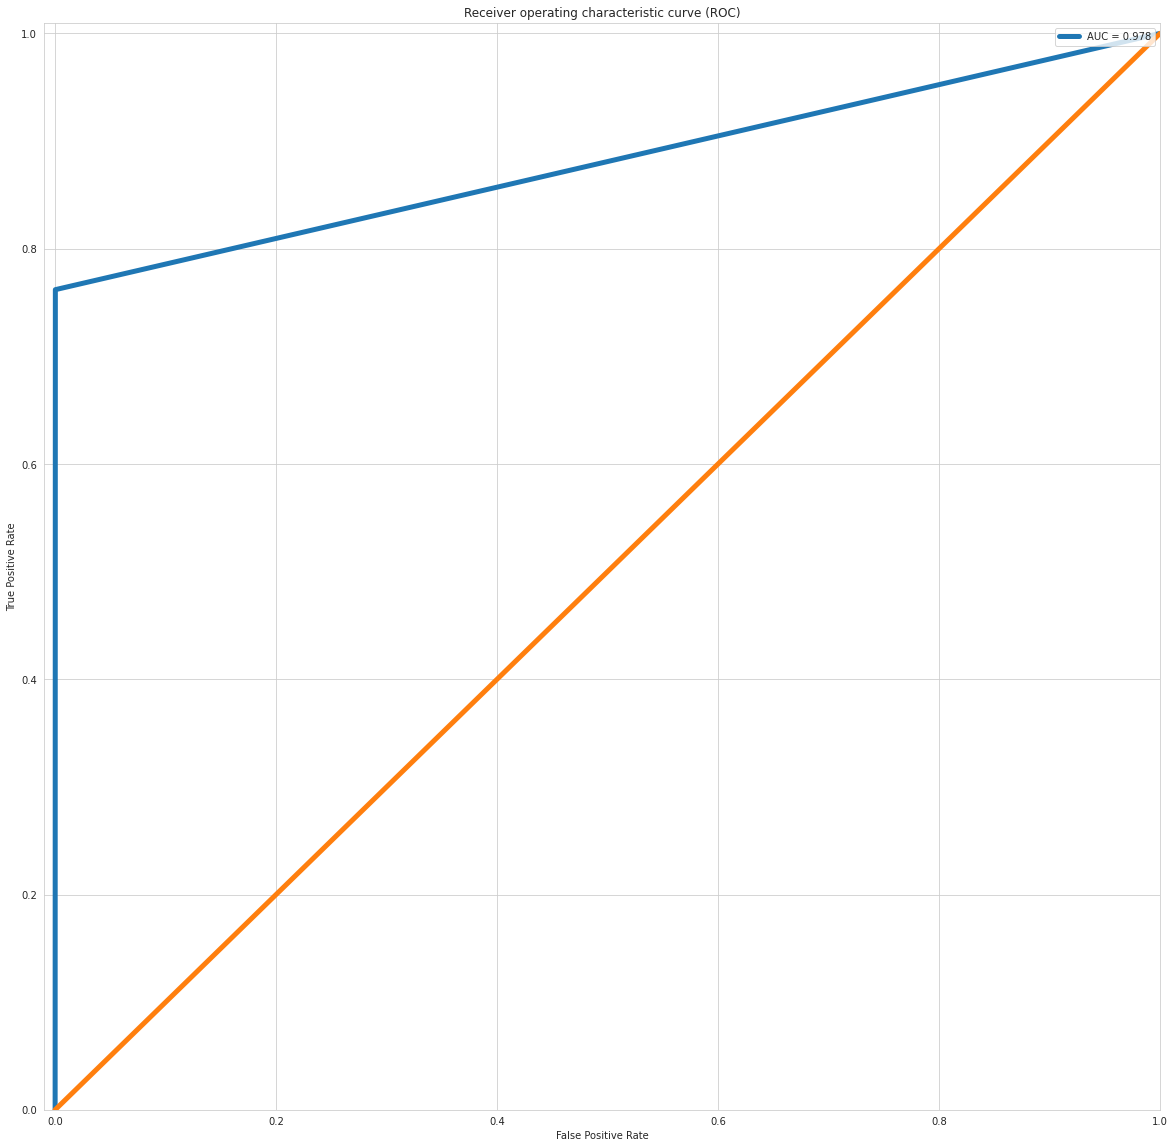

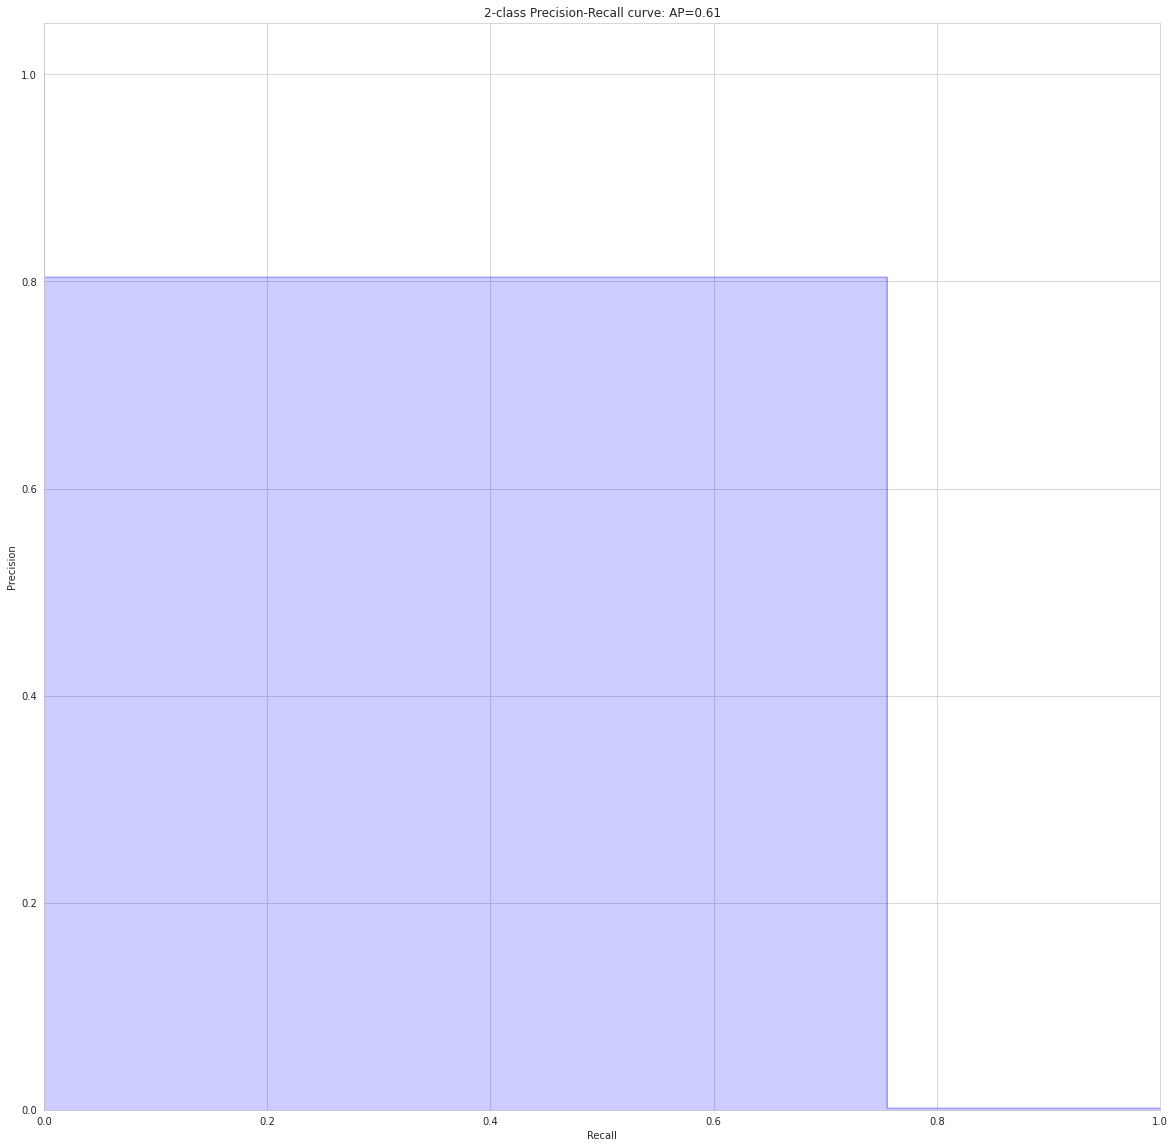

**********************************************************************


In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Build a DecisionTreeClassifier using the GridSearchCV parameters
DT_model = DecisionTreeClassifier(criterion= 'entropy', max_depth= 3, min_samples_leaf= 5)

# Fit the model to your training data and get the predicted results
DT_model.fit(X_train,y_train)
y_predicted_DT = DT_model.predict(X_test)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted_DT)

PrintModelResults("Decision Tree Classifier: ",y_test, y_predicted_DT,false_positive_rate, true_positive_rate, threshold)

# Module 5: Random Forest Classifier

**********************************************************************
Random Forest Classifier: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.94      0.76      0.84       147

    accuracy                           1.00     85443
   macro avg       0.97      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85289     7]
 [   36   111]]
Accuracy :0.99950
F1 Score: 0.8377358490566039
Recall score: 0.7551020408163265
Precision score: 0.940677966101695


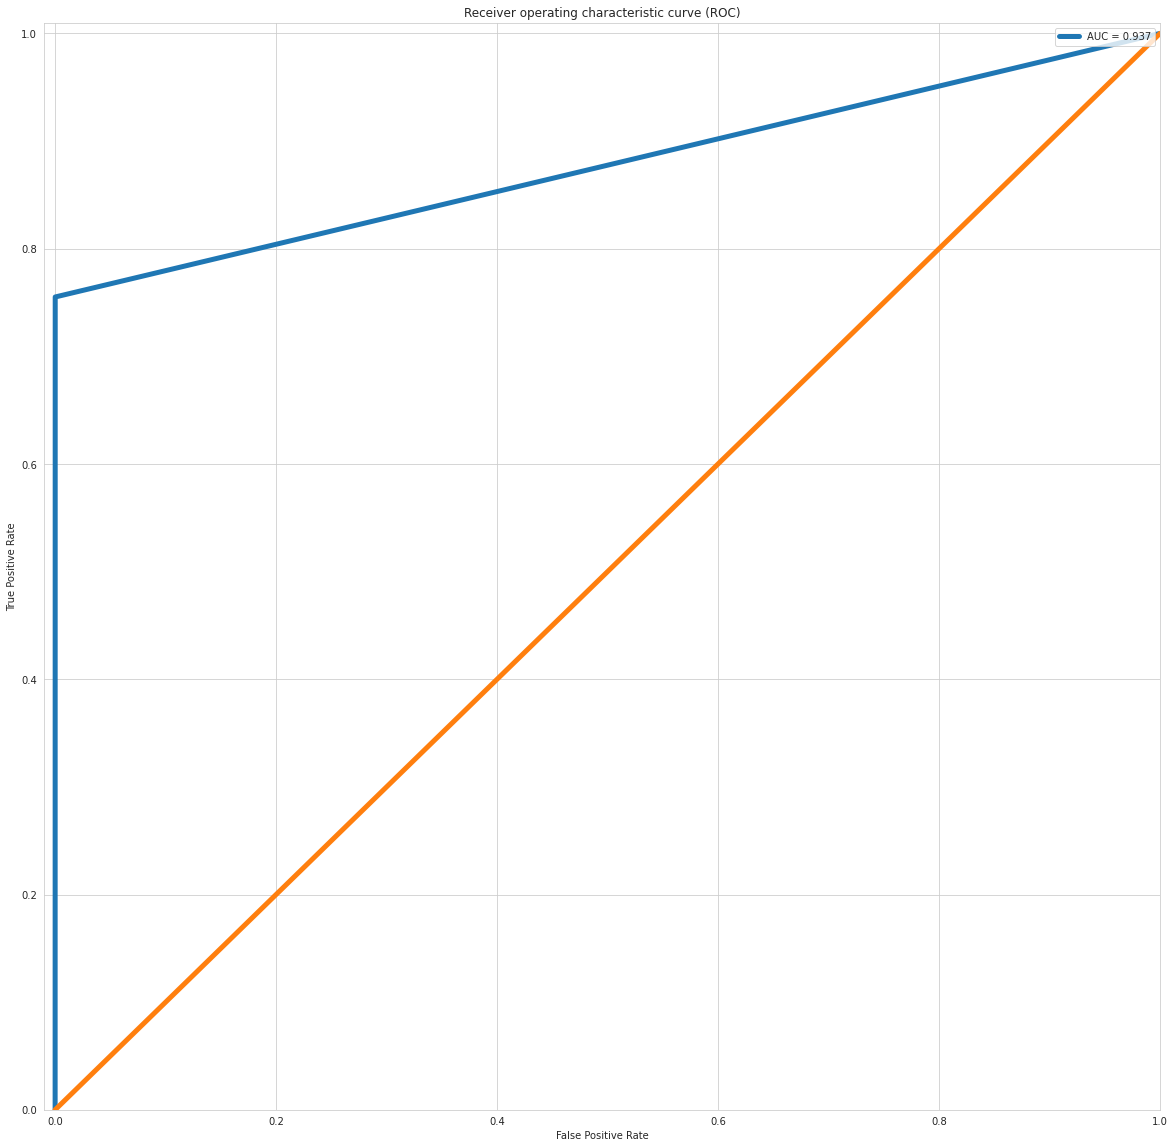

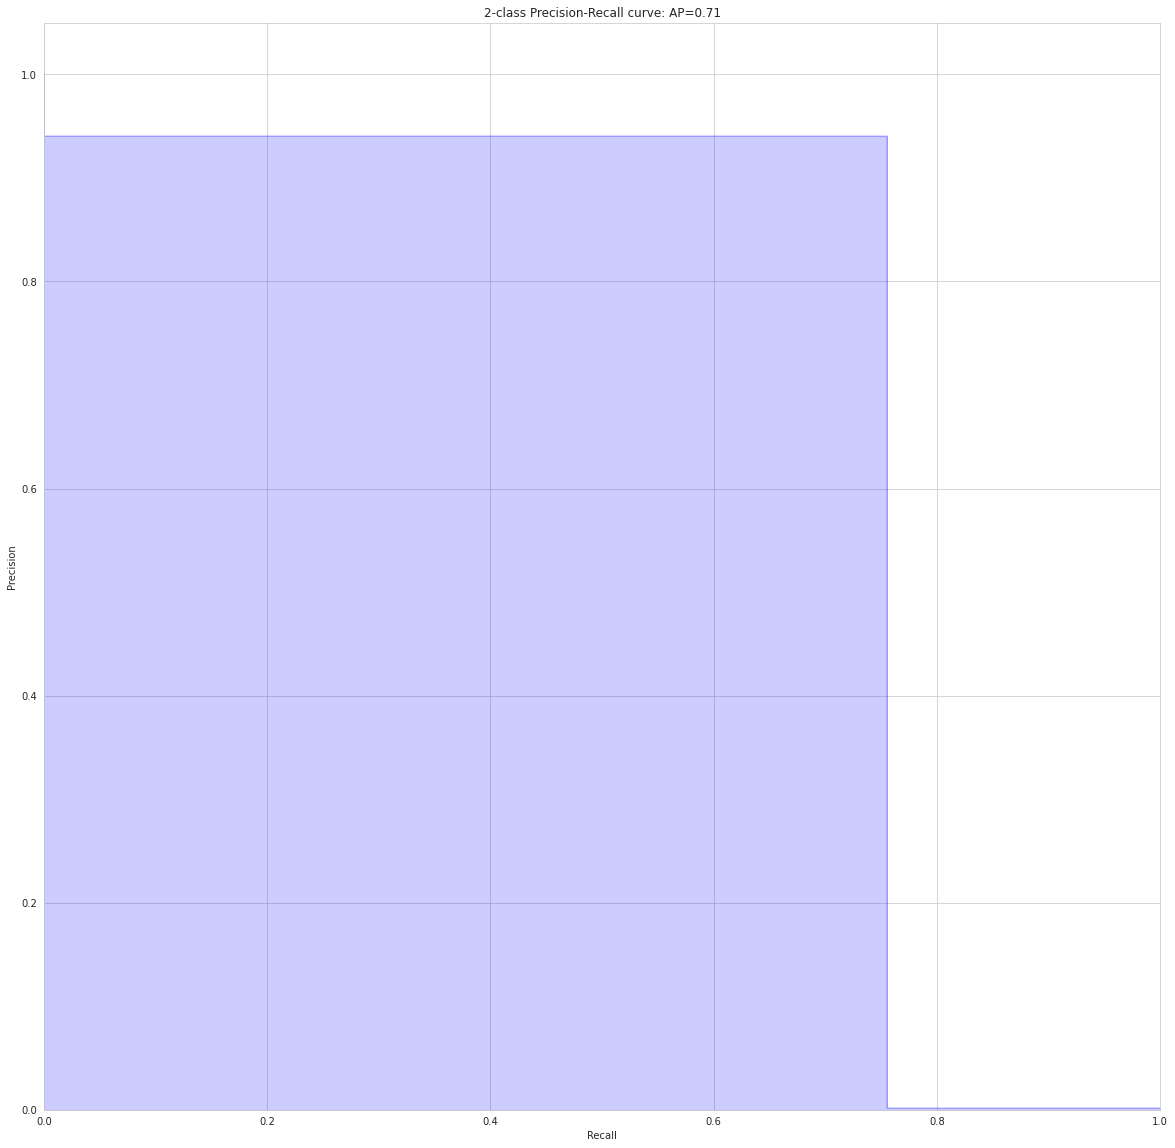

**********************************************************************


In [ ]:
# Import the Random Forest Classifier model from sklearn
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Fit a logistic regression model to our data
model = RandomForestClassifier(random_state=5)
model.fit(X_train, y_train)

# Obtain model predictions
y_predicted = model.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("Random Forest Classifier: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

Accuracy score = 
Precision =  0.95. The rate of true positive in all positive cases.  
Recall =  0.73. The rate of true positive in all true cases.  
F1-score = 0.83
False positives cases = 6, which is much better.   

## GridSearchCV to find optimal parameters for Random Forest Classifier

In [ ]:


# Define the parameter sets to test
param_grid = {
    'n_estimators': [1, 30], 
    'max_features': ['auto', 'log2'],  
    'max_depth': [4, 8], 
    'criterion': ['gini', 'entropy']
}

# Define the model to use
model = RandomForestClassifier(random_state=5)
rungs=False
if rungs==True:
  # Combine the parameter sets with the defined model
  CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

  # Fit the model to our training data and obtain best parameters
  CV_model.fit(X_train, y_train)
  print(CV_model.best_params_)
else:
  ''' 
  The optimum hyperparameters are:
  {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 5} '''

## Model results using GridSearchCV

**********************************************************************
Random Forest Classifier: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.87      0.79      0.83       147

    accuracy                           1.00     85443
   macro avg       0.93      0.89      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85278    18]
 [   31   116]]
Accuracy :0.99943
F1 Score: 0.8256227758007118
Recall score: 0.7891156462585034
Precision score: 0.8656716417910447


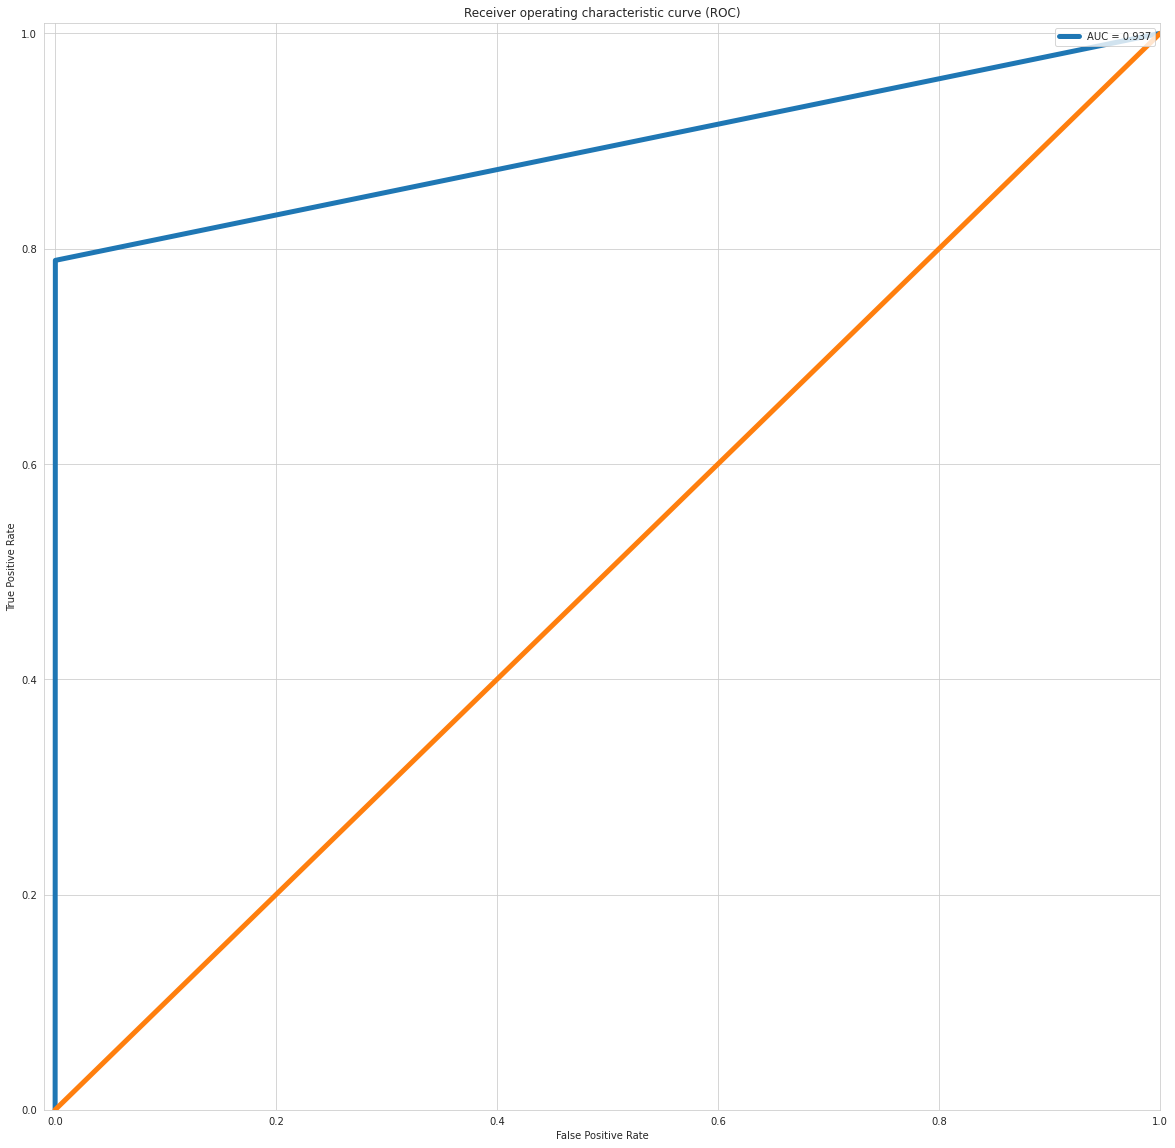

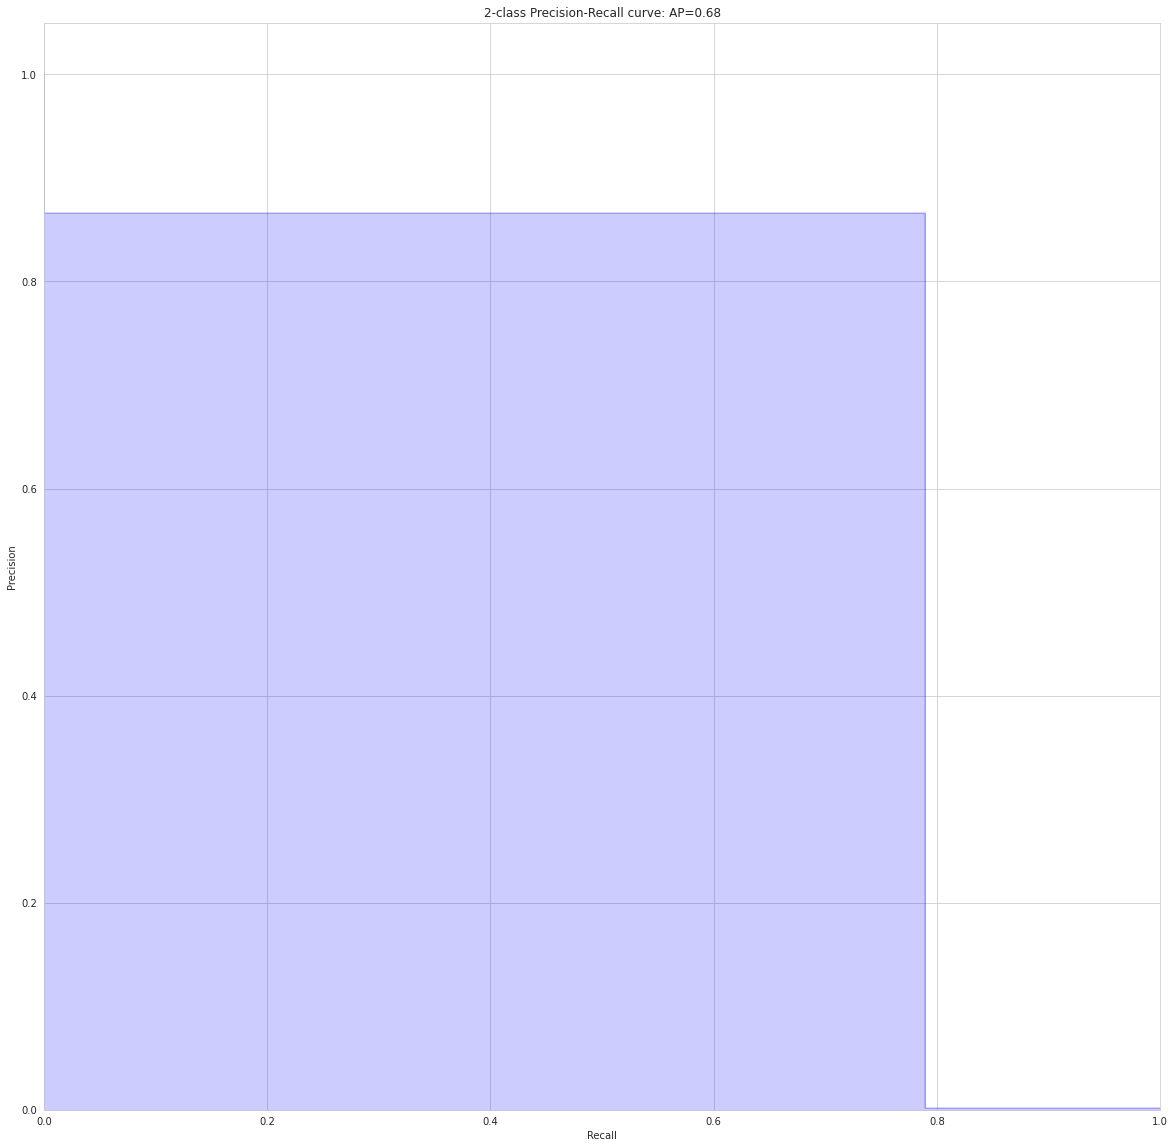

**********************************************************************


In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Build a RandomForestClassifier using the GridSearchCV parameters
model = RandomForestClassifier(bootstrap=True,
                               class_weight = {0:1,1:12},
                               criterion = 'entropy',
                               n_estimators = 30,
                               max_features = 'auto',
                               min_samples_leaf = 5,
                               max_depth = 3,
                               n_jobs = -1,
                               random_state = 5)

# Fit the model to your training data and get the predicted results
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("Random Forest Classifier: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

The results of this model just does not perform better.

# Module 6: Voting Classifier

**********************************************************************
Voting Classifier: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.87      0.82      0.84       147

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85278    18]
 [   27   120]]
Accuracy :0.99947
F1 Score: 0.8421052631578948
Recall score: 0.8163265306122449
Precision score: 0.8695652173913043


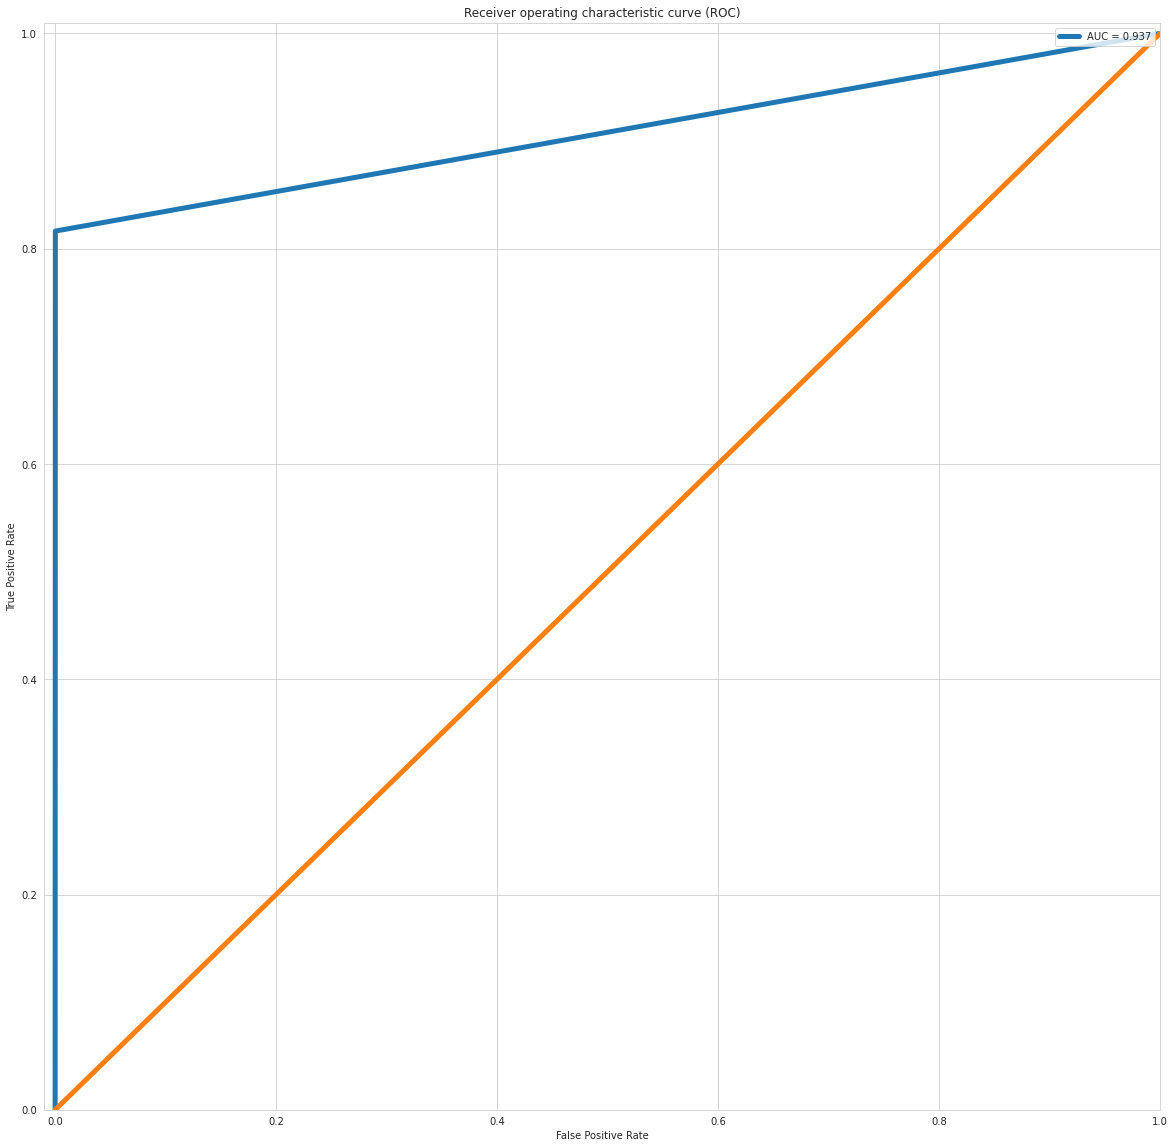

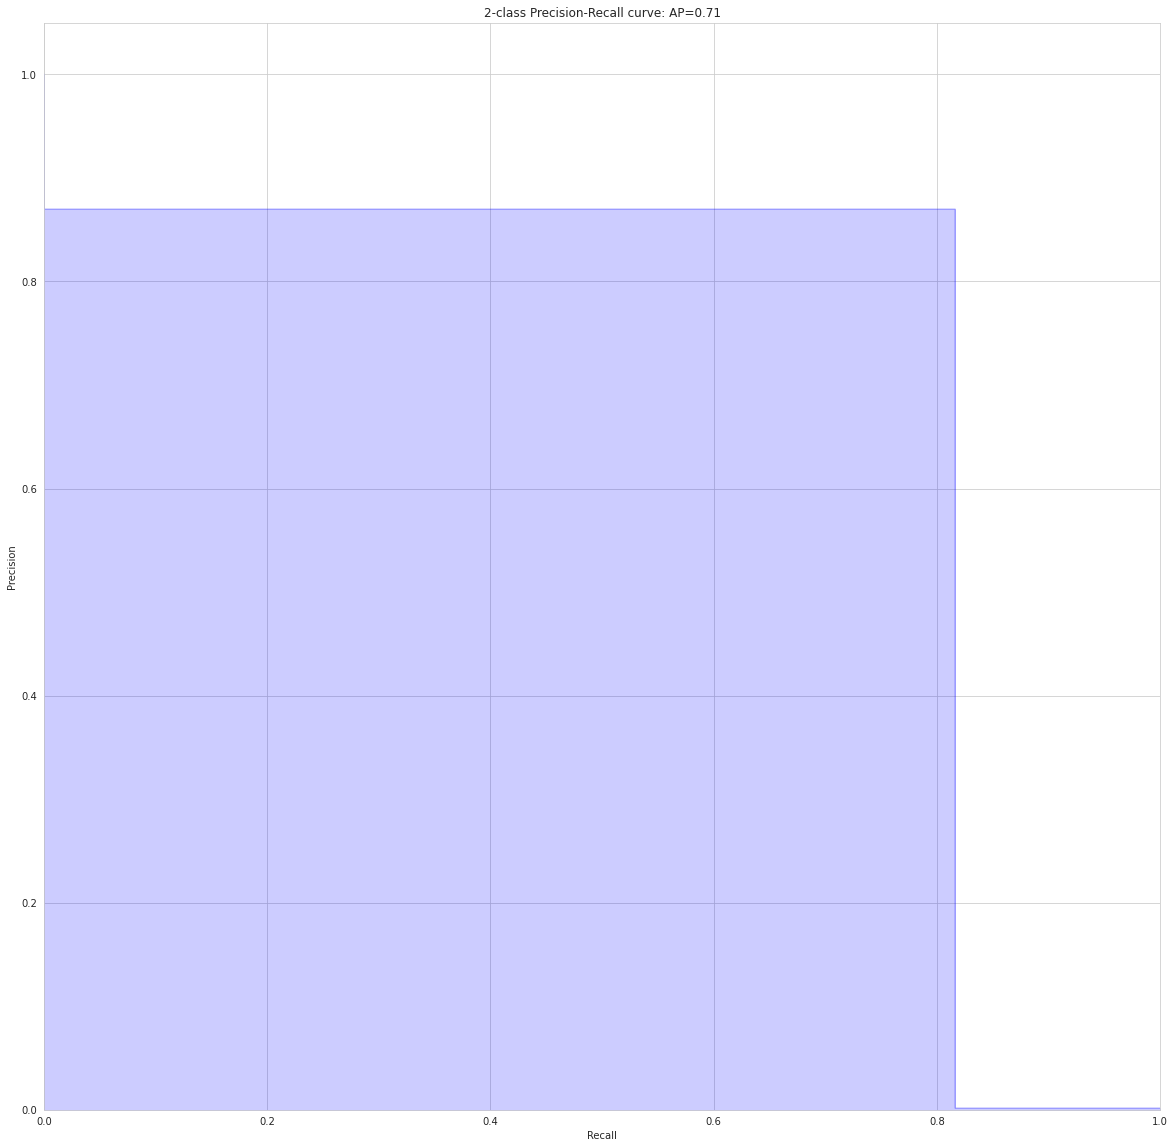

**********************************************************************


In [ ]:


# Define the three classifiers to use in the ensemble
clf1 = LogisticRegression(class_weight={0:1,1:15},random_state=5)
clf2 = RandomForestClassifier(class_weight={0:1,1:12},
                              criterion='entropy',
                              max_depth=10,
                              max_features='auto',
                              min_samples_leaf=10, 
                              n_estimators=20,
                              n_jobs=-1,
                              random_state=5)
clf3 = DecisionTreeClassifier(class_weight='balanced',random_state=5)

# Combine the classifiers in the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('dt', clf3)], voting='hard')

# Fit the model to your training data and get the predicted results
ensemble_model.fit(X_train,y_train)
y_predicted = ensemble_model.predict(X_test)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("Voting Classifier: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

By combining the classifiers, you can take the best of multiple models.  
By combining these together you indeed managed to improve performance.

**********************************************************************
Voting Classifier: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.87      0.82      0.84       147

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85278    18]
 [   27   120]]
Accuracy :0.99947
F1 Score: 0.8421052631578948
Recall score: 0.8163265306122449
Precision score: 0.8695652173913043


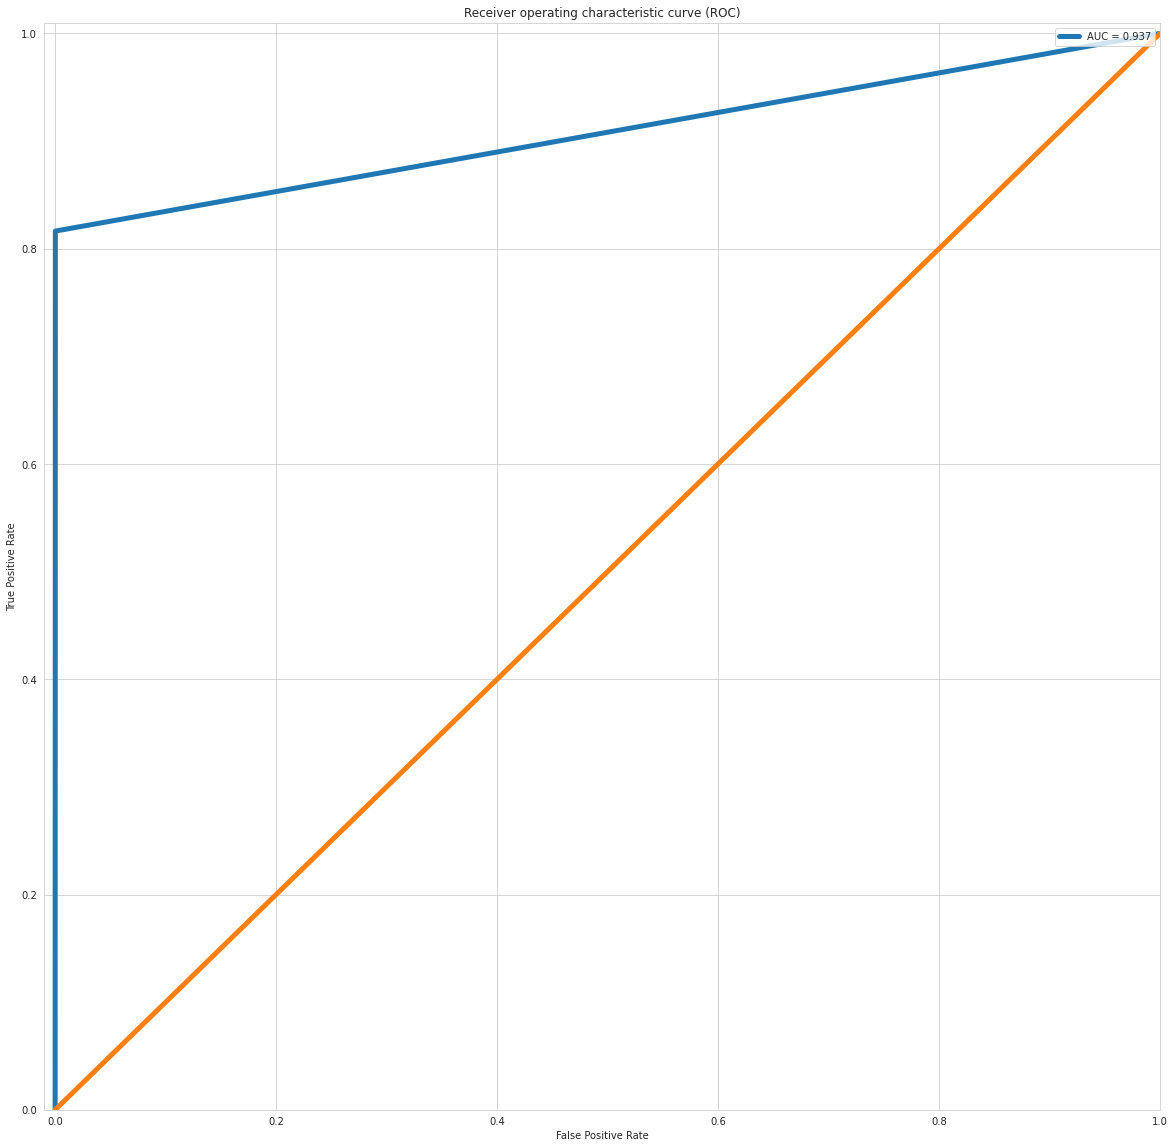

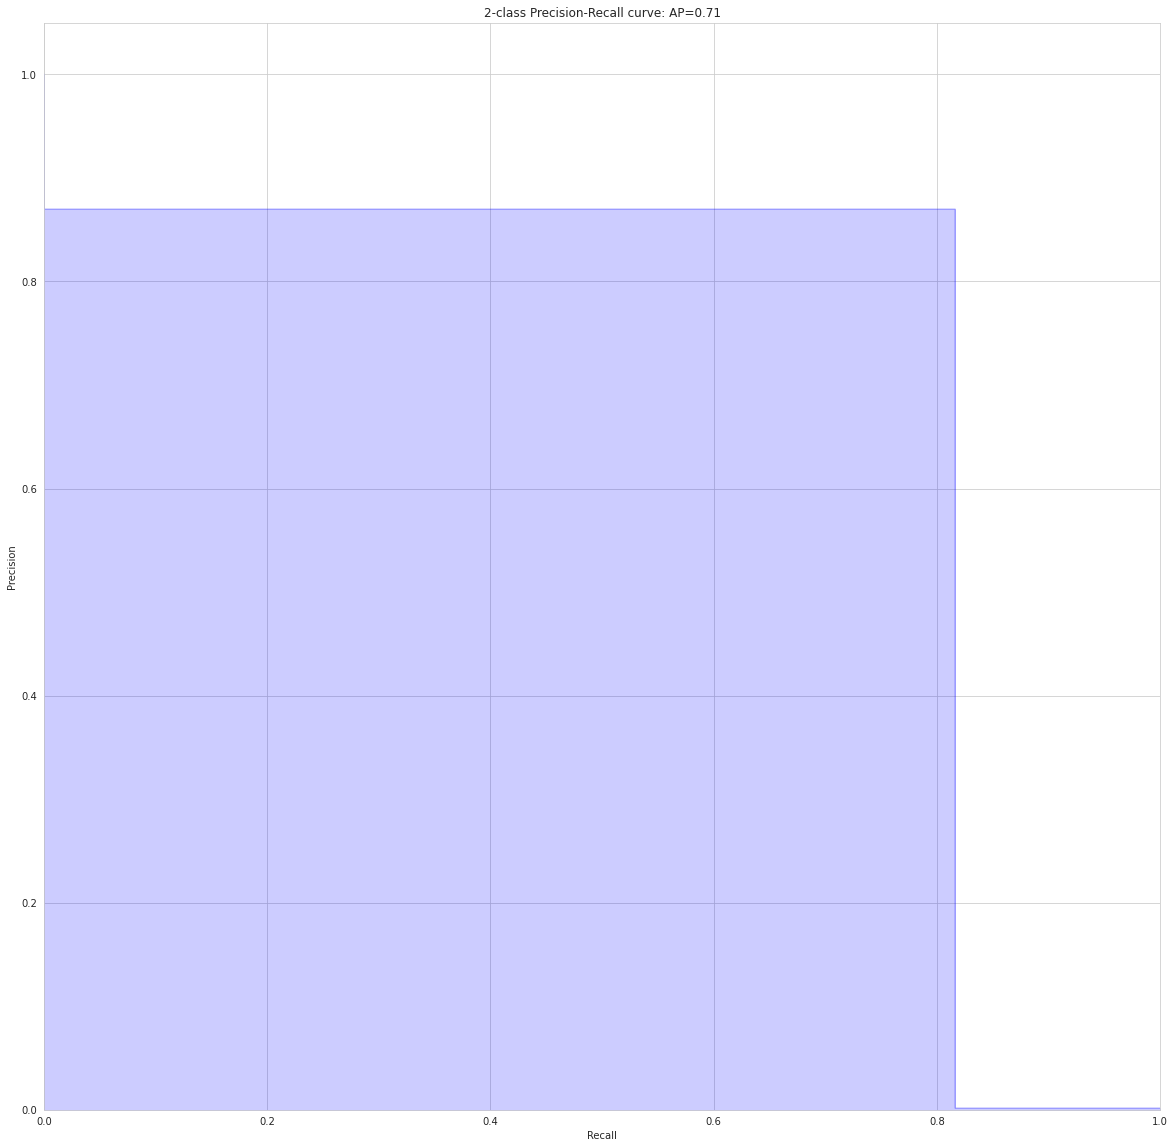

**********************************************************************


In [ ]:
# Adjust weights within the Voting Classifier

# Define the ensemble model
ensemble_model = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)], 
                                  voting='soft', 
                                  weights=[1, 4, 1], 
                                  flatten_transform=True)

# Fit the model to your training data and get the predicted results
ensemble_model.fit(X_train,y_train)
y_predicted = ensemble_model.predict(X_test)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("Voting Classifier: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)


In [ ]:
ensemble_model.estimators_

[LogisticRegression(C=1.0, class_weight={0: 1, 1: 15}, dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=5, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                        class_weight={0: 1, 1: 12}, criterion='entropy',
                        max_depth=10, max_features='auto', max_leaf_nodes=None,
                        max_samples=None, min_impurity_decrease=0.0,
                        min_impurity_split=None, min_samples_leaf=10,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
                        n_estimators=20, n_jobs=-1, oob_score=False,
                        random_state=5, verbose=0, warm_start=False),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced', criterion='gini',
                   

The weight option allows you to play with the individual models to get the best final mix for your fraud detection model.  
But the model performance does not improve.

# Module 7: KMeans Clustering

## Prepare unlabeled train and test dataset

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize

# Split the data into train set and test set
train,test = train_test_split(df,test_size=0.3,random_state=0)

# Get the arrays of features and labels in train dataset
features_train = train.drop(['Class'],axis=1)
features_train = features_train.values
labels_train = pd.DataFrame(train[['Class']])
labels_train = labels_train.values

# Get the arrays of features and labels in test dataset
features_test = test.drop(['Class'],axis=1)
features_test = features_test.values
labels_test = pd.DataFrame(test[["Class"]])
labels_test = labels_test.values

# Normalize the features in both train and test dataset
features_train = normalize(features_train)
features_test = normalize(features_test)

## Build the model

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix

model = KMeans(n_clusters=2,random_state=0)
model.fit(features_train)
labels_train_predicted = model.predict(features_train)
labels_test_predicted = model.predict(features_test)

# Decide if model predicted label is aligned with true label 
true_negative,false_positive,false_negative,true_positive = confusion_matrix(labels_train,labels_train_predicted).ravel()
reassignflag = true_negative + true_positive < false_positive + false_negative
print(reassignflag)


labels_test_predicted = 1- labels_test_predicted


False


## Model Evaluation

Confusion Matrix:
 [[23788 61508]
 [   41   106]]
kmeans_precison_score: 0.0017203882234557081
kmeans_recall_score: 0.7210884353741497
kmeans_accuracy_score: 0.27964842058448325
kmeans_f1_score: 0.003432586907595408
**********************************************************************
K Means clustering: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.28      0.44     85296
           1       0.00      0.72      0.00       147

    accuracy                           0.28     85443
   macro avg       0.50      0.50      0.22     85443
weighted avg       1.00      0.28      0.44     85443

Confusion matrix:
 [[23788 61508]
 [   41   106]]
Accuracy :0.27965
F1 Score: 0.003432586907595408
Recall score: 0.7210884353741497
Precision score: 0.0017203882234557081


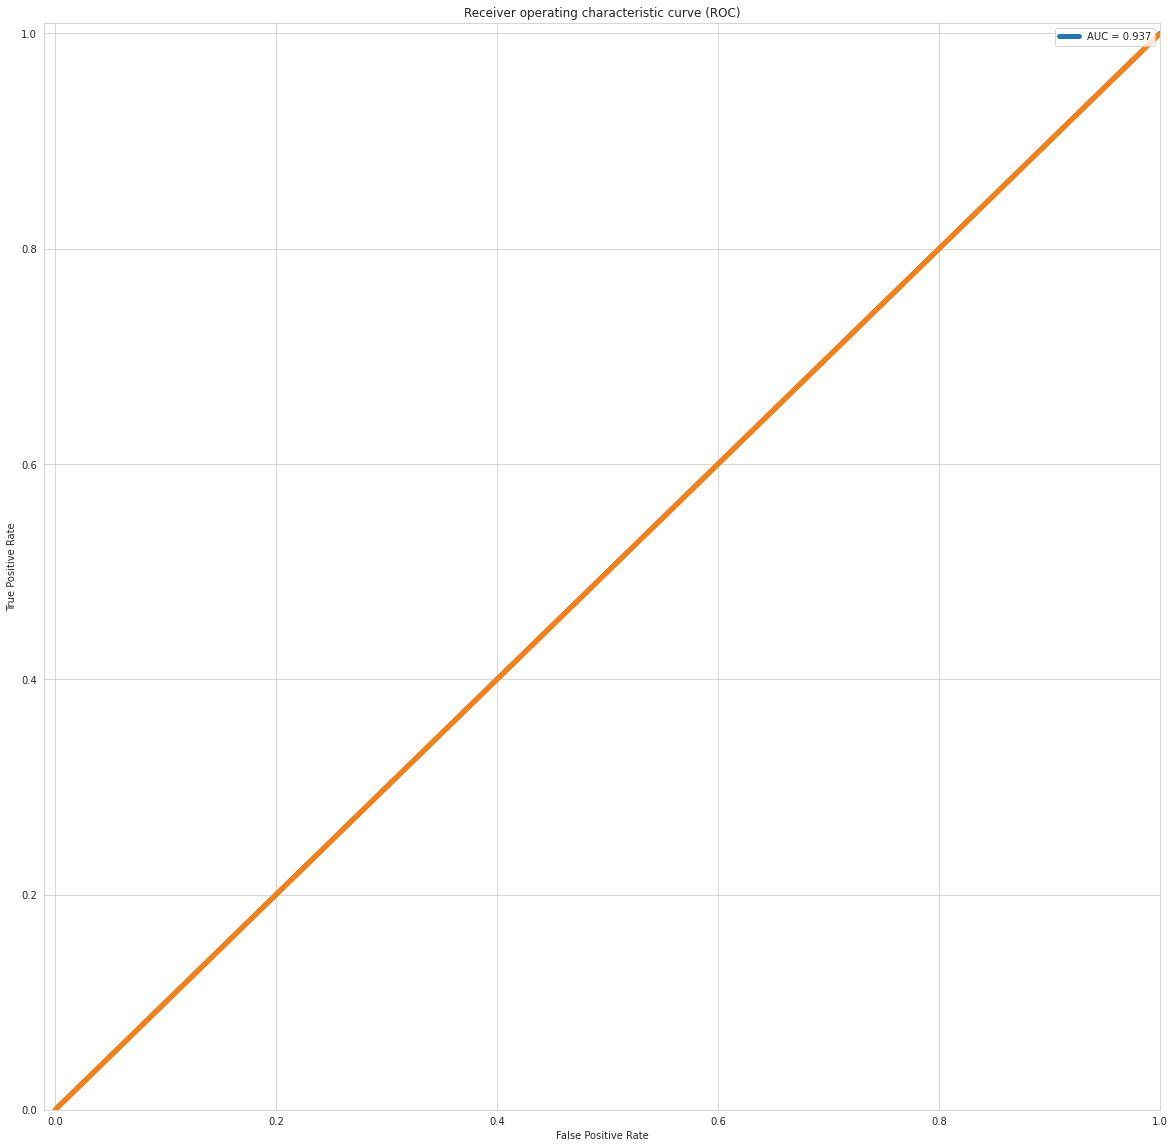

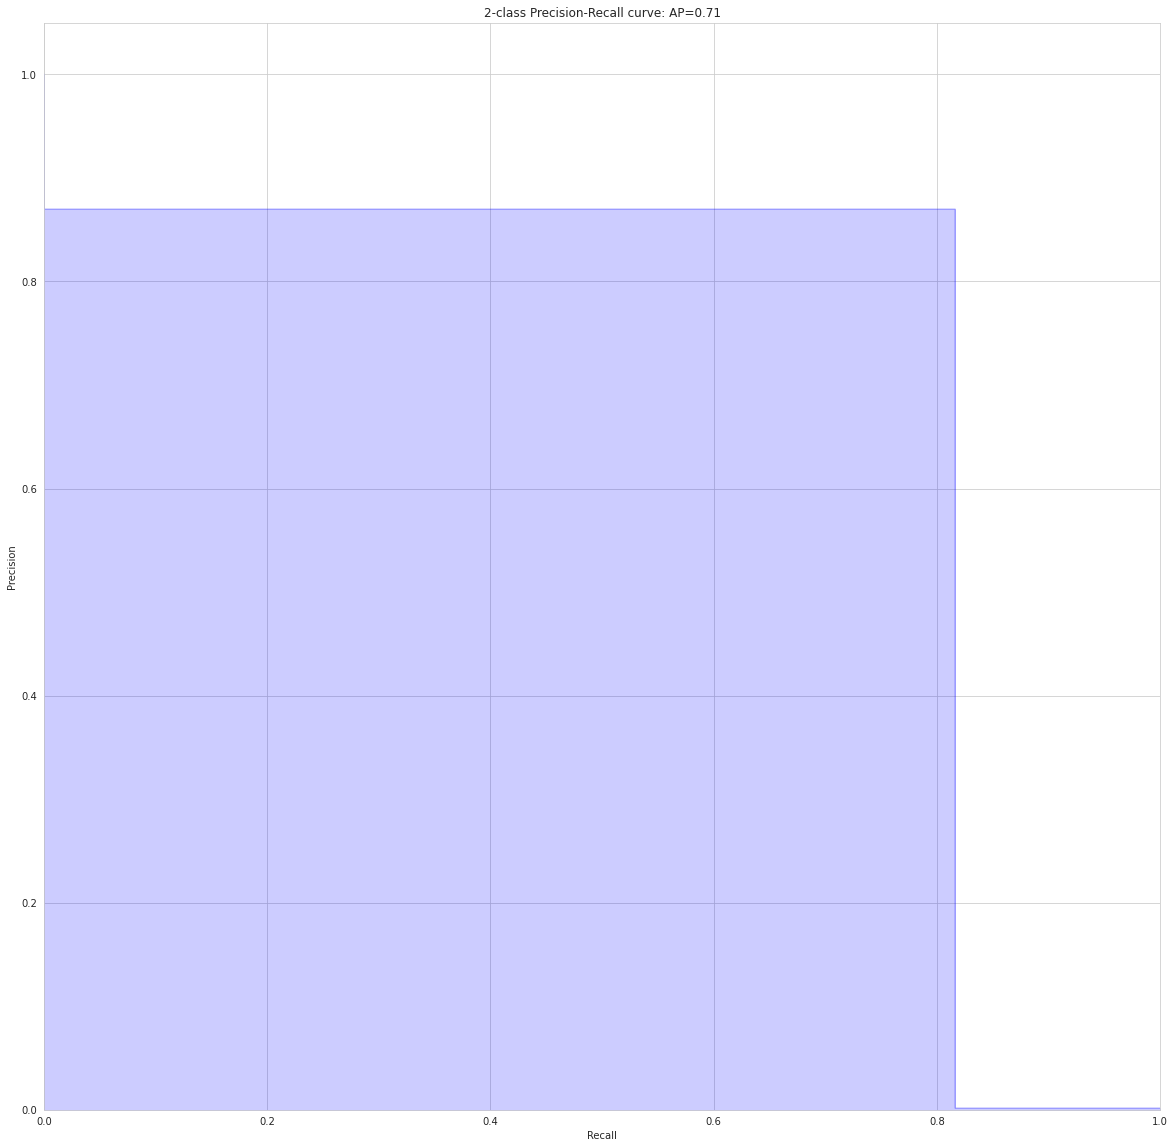

**********************************************************************


In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, accuracy_score,f1_score
# Calculating confusion matrix for kmeans
print('Confusion Matrix:\n',confusion_matrix(labels_test,labels_test_predicted))

# Scoring kmeans

print('kmeans_precison_score:', precision_score(labels_test,labels_test_predicted))
print('kmeans_recall_score:', recall_score(labels_test,labels_test_predicted))
print('kmeans_accuracy_score:', accuracy_score(labels_test,labels_test_predicted))
print('kmeans_f1_score:',f1_score(labels_test,labels_test_predicted))


# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(labels_test, labels_test_predicted)

PrintModelResults("K Means clustering: ",labels_test, labels_test_predicted,false_positive_rate, true_positive_rate, threshold)

We can detect 91 out of 147 fraud cases in the test dataset.  
But there are 17361 false positive cases which indicated that our KMeans model needs to be improved by selecting good features.  


# XGBOOST:

**********************************************************************
XG Boost: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.87      0.82      0.84       147

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85278    18]
 [   27   120]]
Accuracy :0.99947
F1 Score: 0.8421052631578948
Recall score: 0.8163265306122449
Precision score: 0.8695652173913043


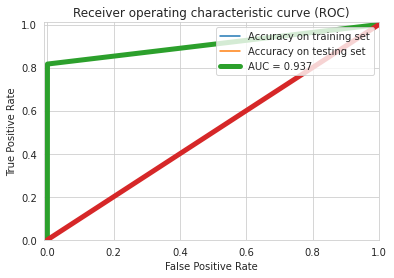

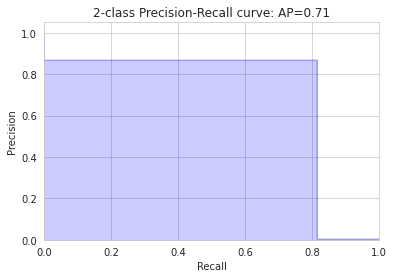

**********************************************************************


In [ ]:
tree_range = range(2, 30, 5)
score1=[]
score2=[]
for tree in tree_range:
    xgb=XGBClassifier(n_estimators=tree)
    xgb.fit(X_train,y_train)
    score1.append(xgb.score(X_train,y_train))
    score2.append(xgb.score(X_test,y_test))
    
%matplotlib inline
plt.plot(tree_range,score1,label= 'Accuracy on training set')
plt.plot(tree_range,score2,label= 'Accuracy on testing set')
plt.xlabel('Value of number of class in XGboost')
plt.ylabel('Accuracy')
plt.legend()


# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("XG Boost: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

**********************************************************************
XGBoost: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.87      0.82      0.84       147

    accuracy                           1.00     85443
   macro avg       0.93      0.91      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85278    18]
 [   27   120]]
Accuracy :0.99947
F1 Score: 0.8421052631578948
Recall score: 0.8163265306122449
Precision score: 0.8695652173913043


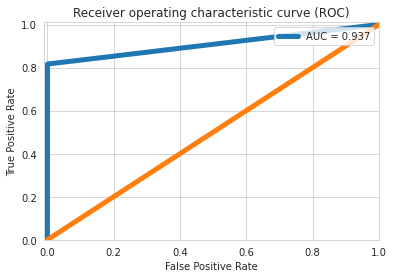

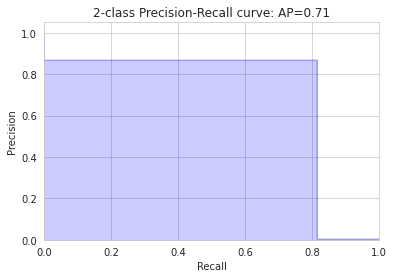

**********************************************************************


In [ ]:
xgb=XGBClassifier(n_estimators=25)
xgb.fit(X_train,y_train)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("XGBoost: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

## GridSearchCV to find optimal parameters for XGBoost:

In [ ]:


# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6], 
             'subsample': [0.3, 0.6, 0.9]} 

# Define the model to use
model = XGBClassifier(n_estimators=25)
rungs=False
if rungs==True:
  # Combine the parameter sets with the defined model
  CV_model = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='recall', n_jobs=-1)

  # Fit the model to our training data and obtain best parameters
  CV_model.fit(X_train, y_train)
  print(CV_model.best_params_)
else:
  ''' 
  The optimum hyperparameters are:
 {'learning_rate': 0.2, 'subsample': 0.9}'''

## Model results using GridSearchCV

**********************************************************************
XG Boost: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.93      0.76      0.84       147

    accuracy                           1.00     85443
   macro avg       0.96      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85287     9]
 [   35   112]]
Accuracy :0.99949
F1 Score: 0.8358208955223881
Recall score: 0.7619047619047619
Precision score: 0.9256198347107438


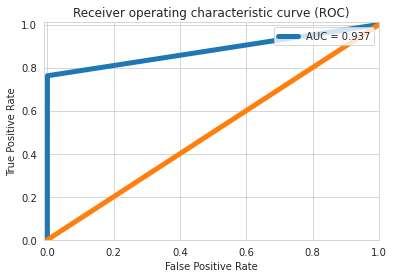

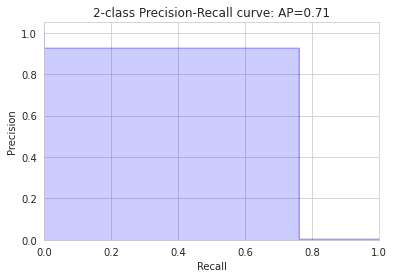

**********************************************************************


In [ ]:
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.2,
          'max_depth': 2, 
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}
model=XGBClassifier(params = params)

# Fit the model to your training data and get the predicted results
model.fit(X_train,y_train)
y_predicted = model.predict(X_test)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("XG Boost: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

### Choosing best model on the imbalanced data

We can see that among all the models we tried (Logistic, XGBoost, Decision Tree, Random Forest,KMeans, Voting Classifier), almost all of them have performed well. More specifically Logistic regression and XGBoost performed best in terms of ROC-AUC score.

But as we have to choose one of them, we can go for the best as `Voting Classifier` which gives the maximum ROC AUC score of 94.5%

Top var = 17
2nd Top var = 14
3rd Top var = 10


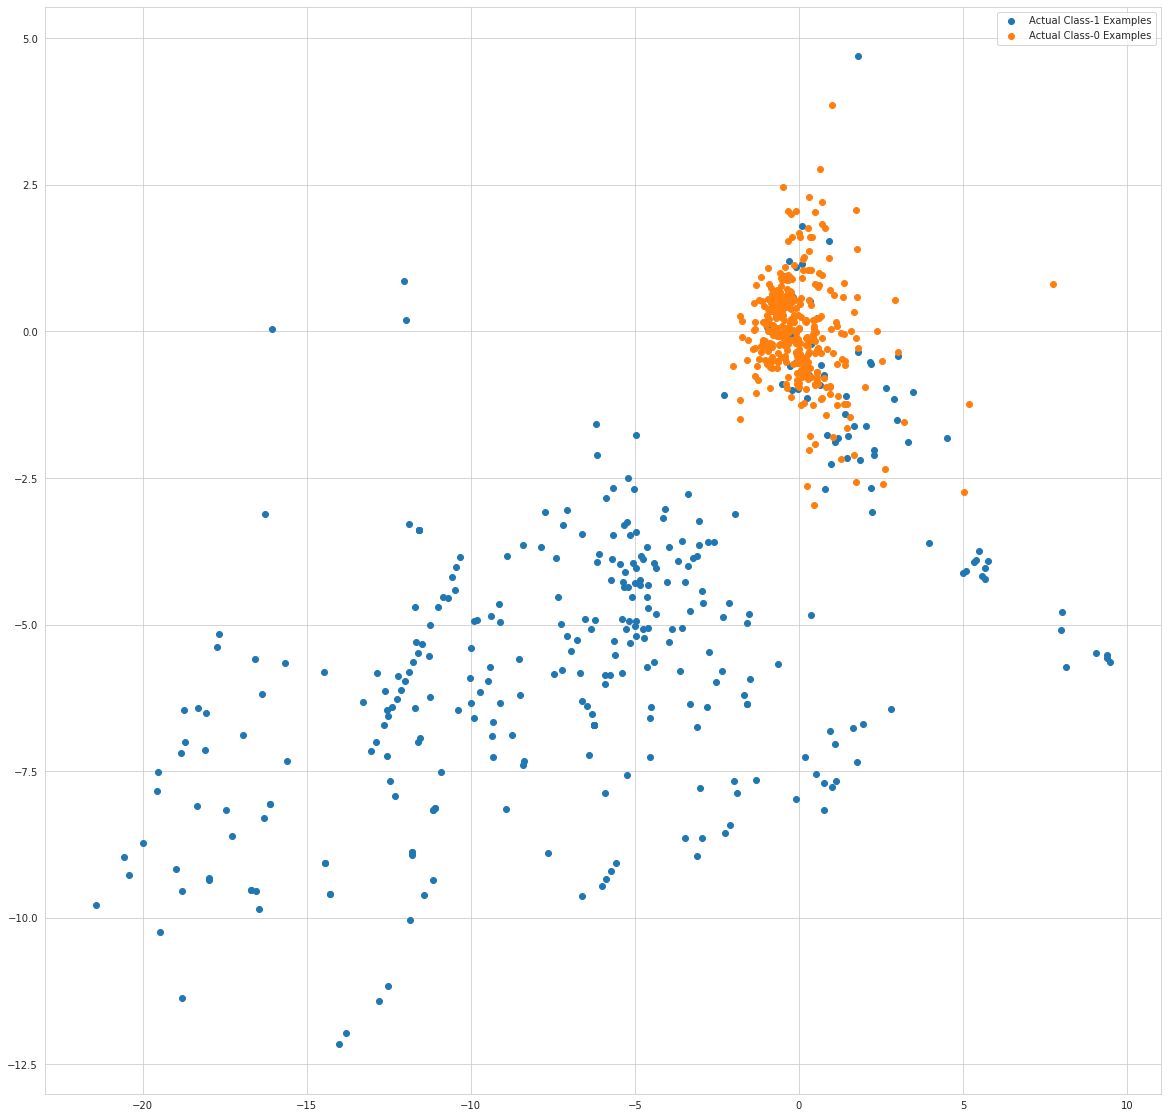

In [ ]:
var_imp = []
for i in DT_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(DT_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(DT_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(DT_model.feature_importances_)[-3])+1)
# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(DT_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(DT_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

# Building models after applying balancing techniques:

# Module 8: Resampling for Imbalanced Data 
There are two types of resampling methods to deal with imbalanced data, one is **under sampling** and another one is **over sampling**. 
* **Under sampling:** you take ramdom draws from non-fraud observations to match the amount of fraud observations.  But you're randomly throwing away a lot of data and infromation. aka: Random Under Sampling
* **Over sampling:** you take ramdom draws from frad cases and copy these observations to increase to amount of fraud samples in your data. But you are traning your model many many duplicates. aka: Random Over Sampling & SMOTE
* **Synthetic Minority Oversampling Technique(SMOTE):** Adjust the data imbalance by oversampling the monority observations(fraud cases) using nearest neighbors of fraud cases to create new synthetic fraud cases instead of just coping the monority samples. 
* There is a common mistake when doing resampling, that is testing your model on the oversampled or undersampled dataset. If we want to implement cross validation, remember to split your data into training and testing before oversample or undersample and then just oversample or undersample the training part.   
Another way to avoid this is to use **"Pipeline"** method. 

## Resample data with RUS, ROS, SMOTE, Borderline SMOTE,ADASYN

In [ ]:
from imblearn.over_sampling import BorderlineSMOTE,ADASYN

# Define the resampling method
undersam = RandomUnderSampler(random_state=0)
oversam = RandomOverSampler(random_state=0)
smote = SMOTE(kind='regular',random_state=0)
borderlinesmote = BorderlineSMOTE(kind='borderline-2',random_state=0)

# resample the training data
X_undersam, y_undersam = undersam.fit_sample(X_train,y_train)
X_oversam, y_oversam = oversam.fit_sample(X_train,y_train)
X_smote, y_smote = smote.fit_sample(X_train,y_train)
X_ada, y_ada = ADASYN(random_state=0).fit_resample(X_train,y_train)
X_borderlinesmote, y_borderlinesmote = borderlinesmote.fit_sample(X_train,y_train)

## Logistic Regression with Resampled Data

**********************************************************************
Logistic Regression with RandomUnderSampling: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98     85296
           1       0.04      0.90      0.08       147

    accuracy                           0.97     85443
   macro avg       0.52      0.94      0.53     85443
weighted avg       1.00      0.97      0.98     85443

Confusion matrix:
 [[82350  2946]
 [   14   133]]
Accuracy :0.96536
F1 Score: 0.0824550526968382
Recall score: 0.9047619047619048
Precision score: 0.04319584280610588


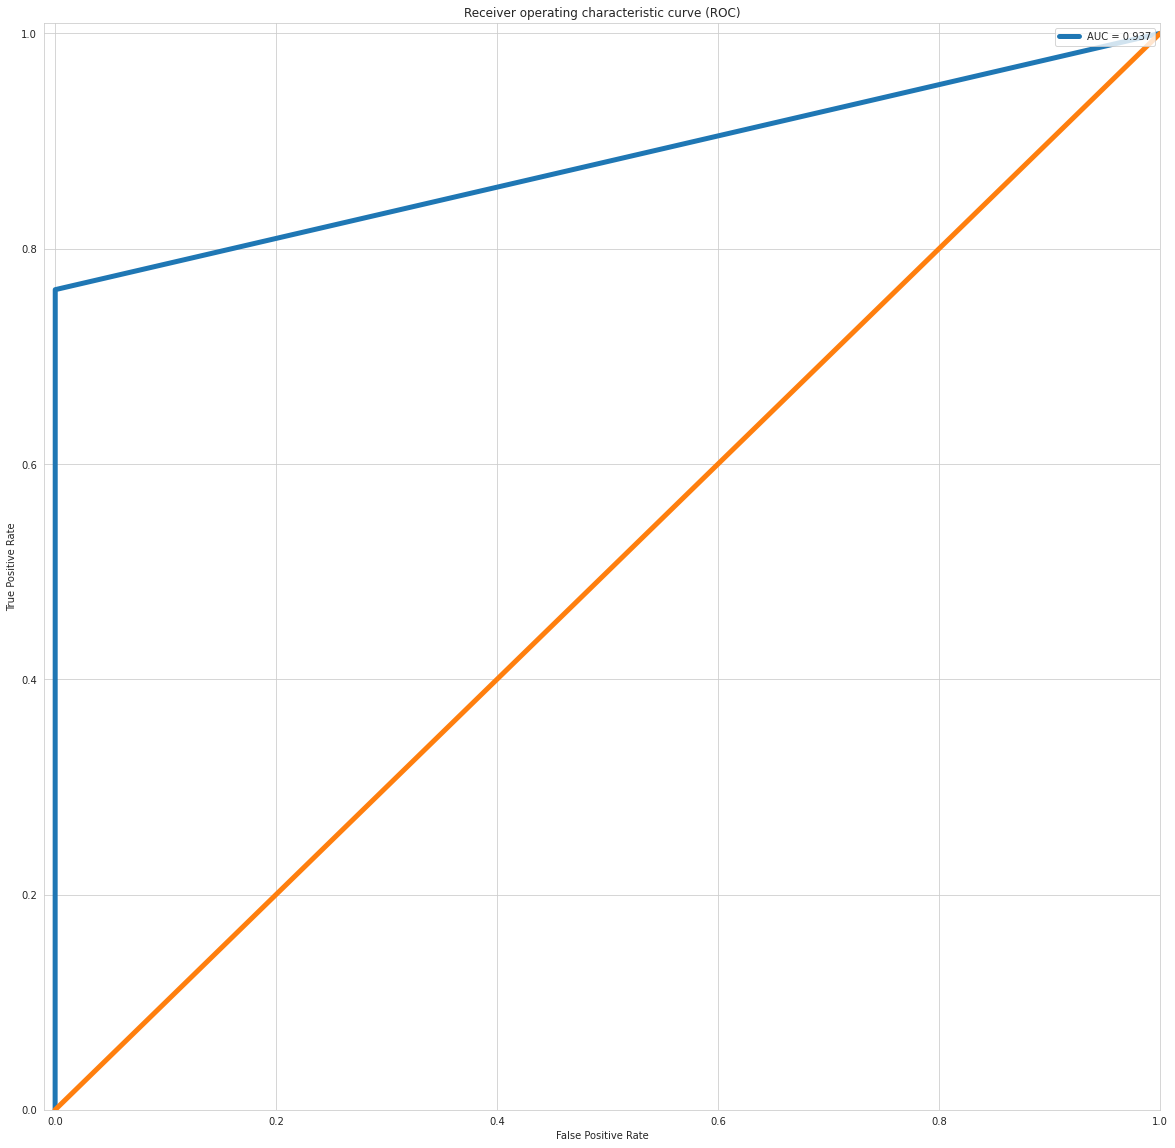

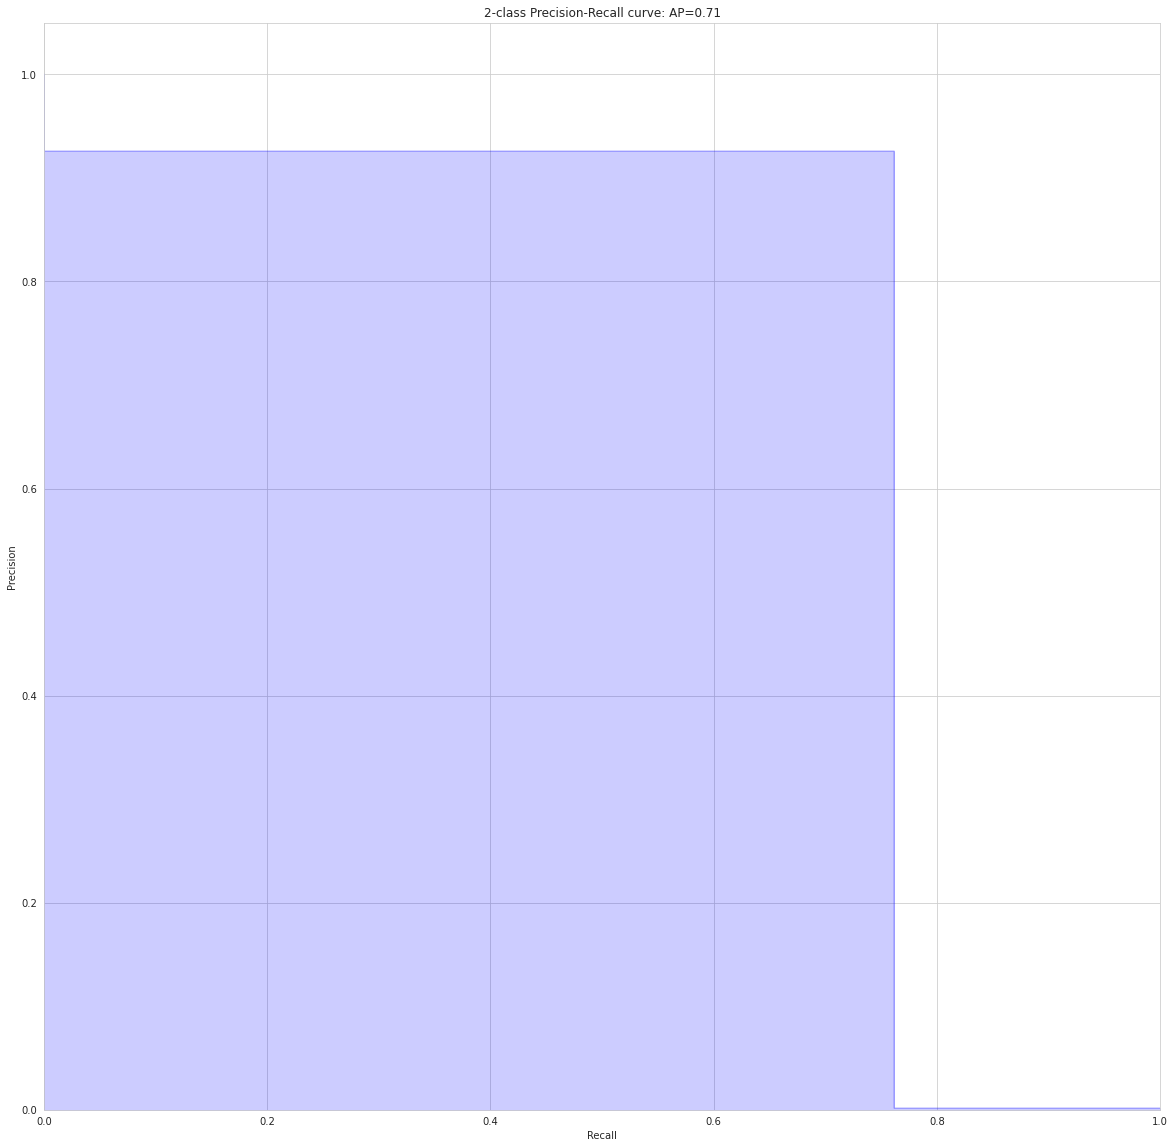

**********************************************************************
**********************************************************************
Logistic Regression with RandomOverSampling: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.06      0.92      0.11       147

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83187  2109]
 [   12   135]]
Accuracy :0.97518
F1 Score: 0.11292346298619824
Recall score: 0.9183673469387755
Precision score: 0.06016042780748663


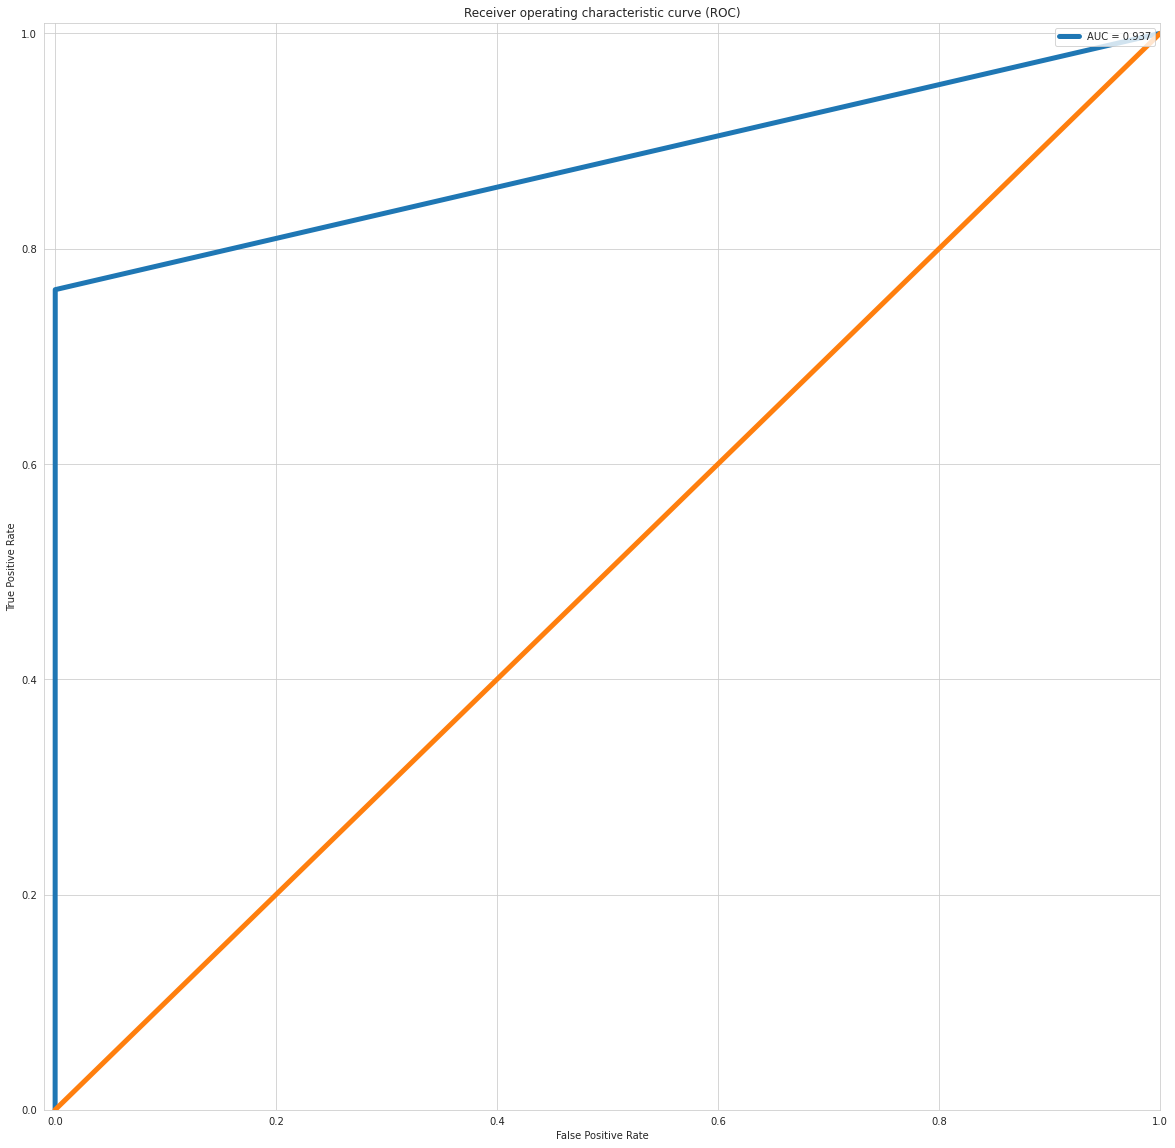

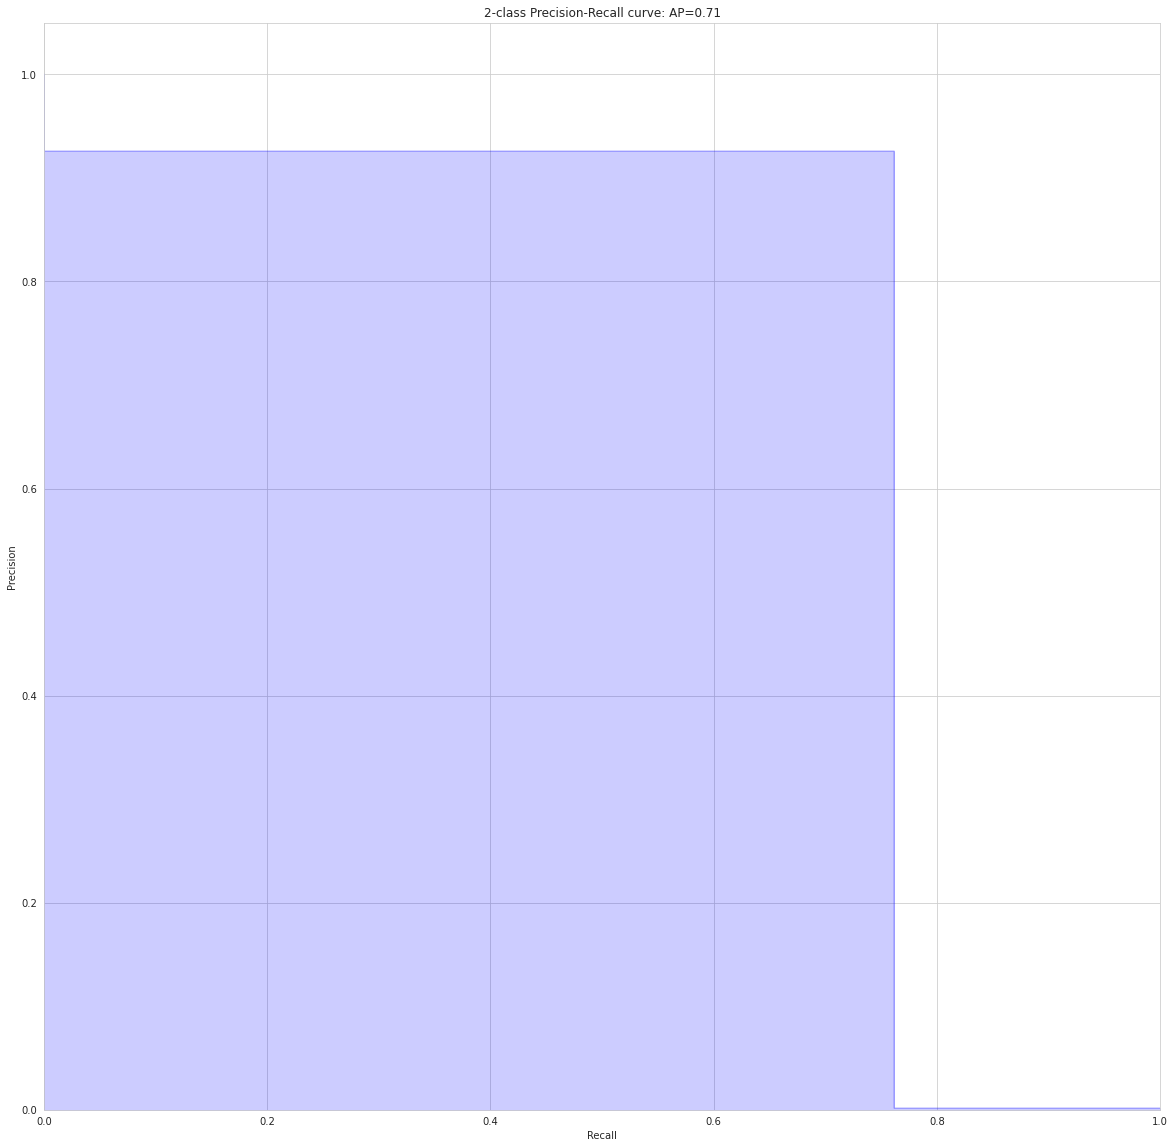

**********************************************************************
**********************************************************************
Logistic Regression with SMOTE: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1       0.05      0.92      0.10       147

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443

Confusion matrix:
 [[82958  2338]
 [   12   135]]
Accuracy :0.97250
F1 Score: 0.10305343511450381
Recall score: 0.9183673469387755
Precision score: 0.054589567327133035


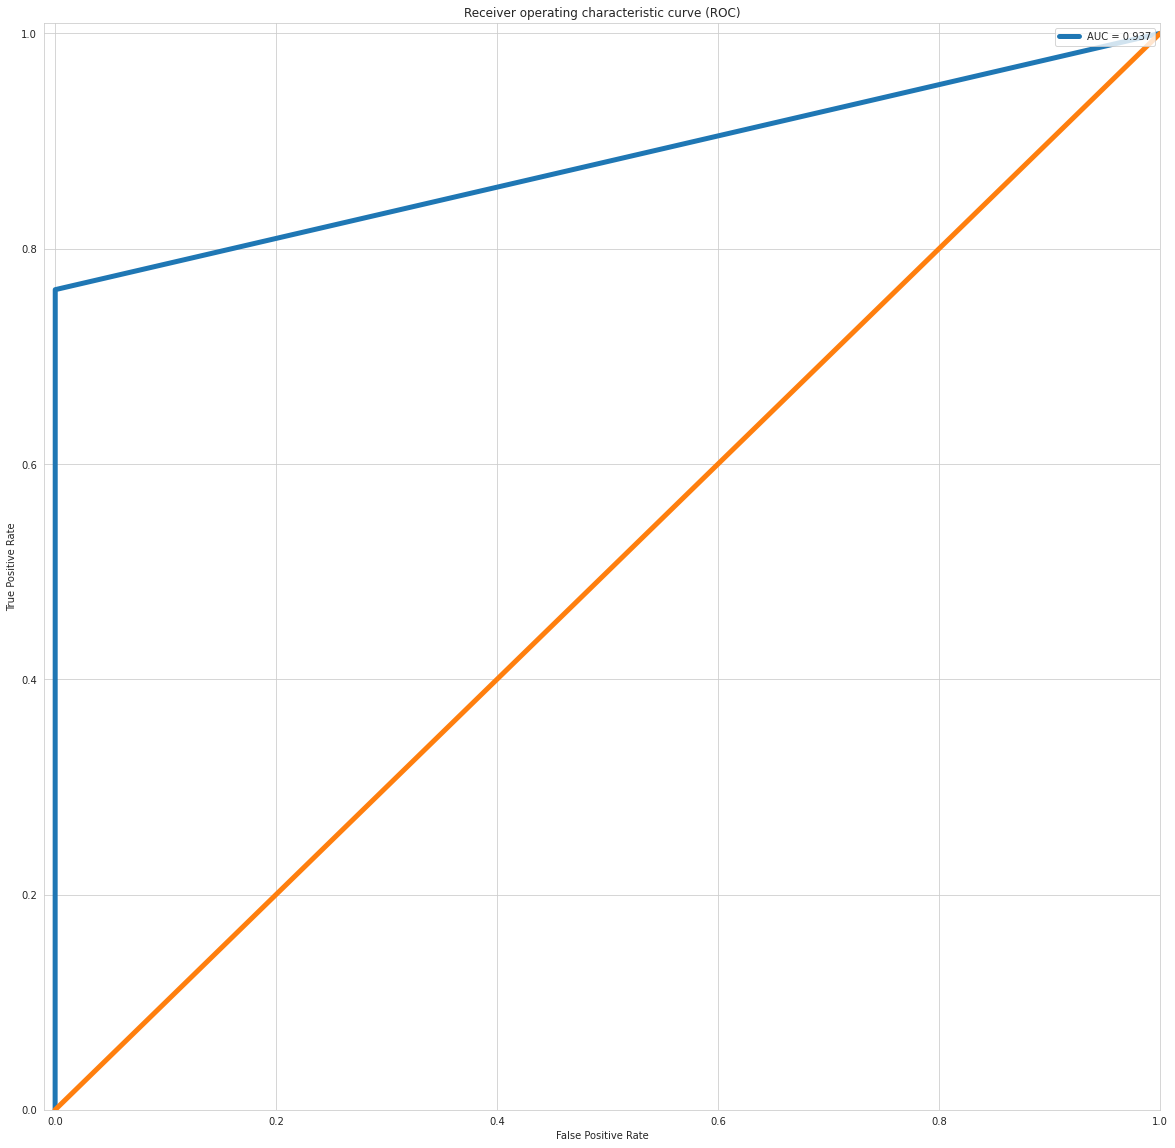

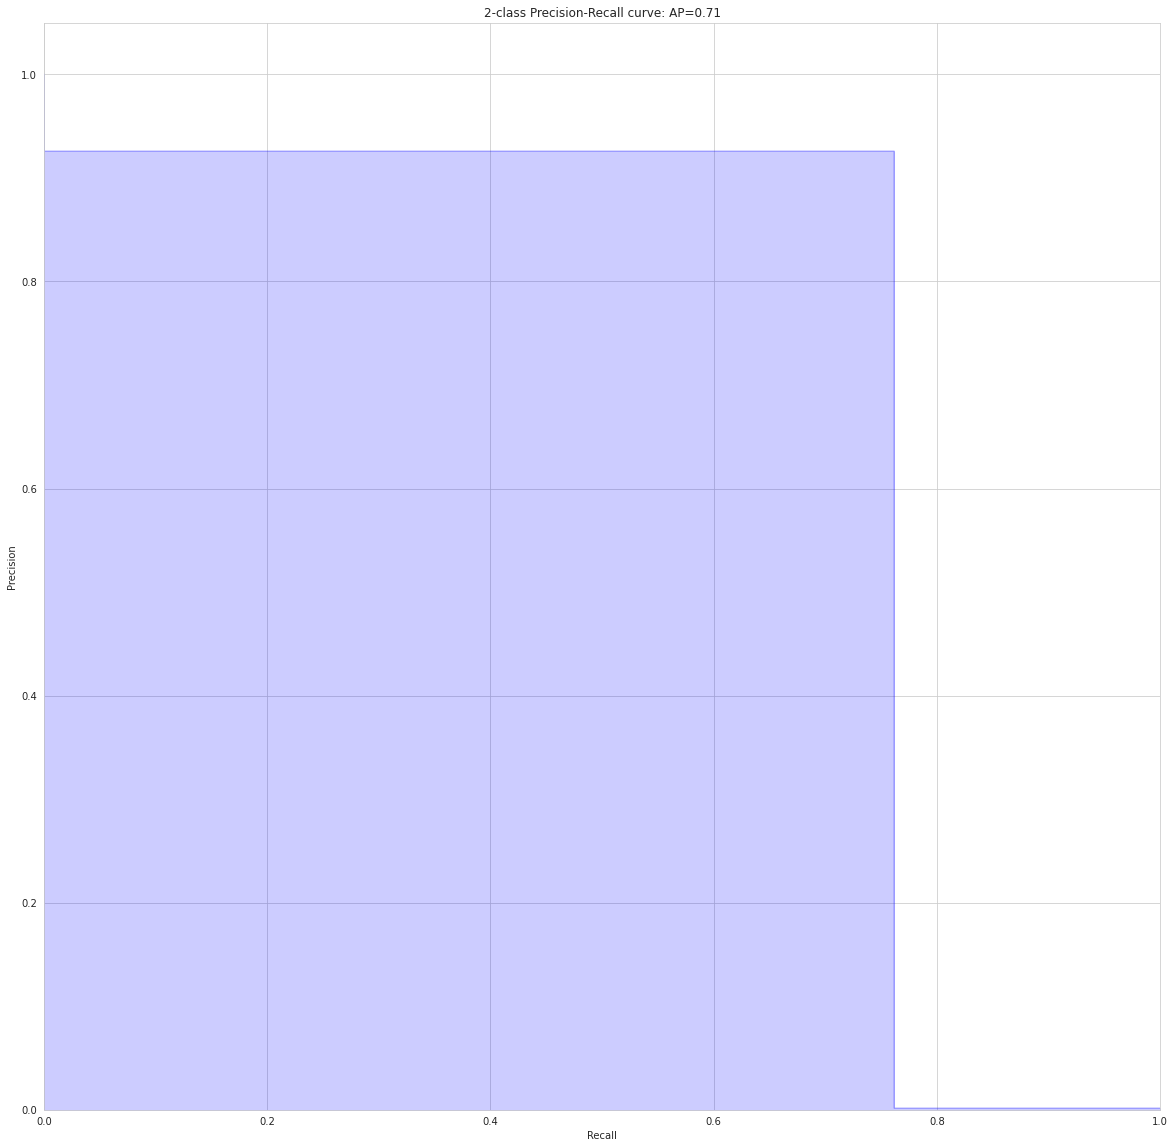

**********************************************************************
**********************************************************************
Logistic Regression with blSmote: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.07      0.88      0.13       147

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83604  1692]
 [   18   129]]
Accuracy :0.97999
F1 Score: 0.13109756097560976
Recall score: 0.8775510204081632
Precision score: 0.07084019769357495


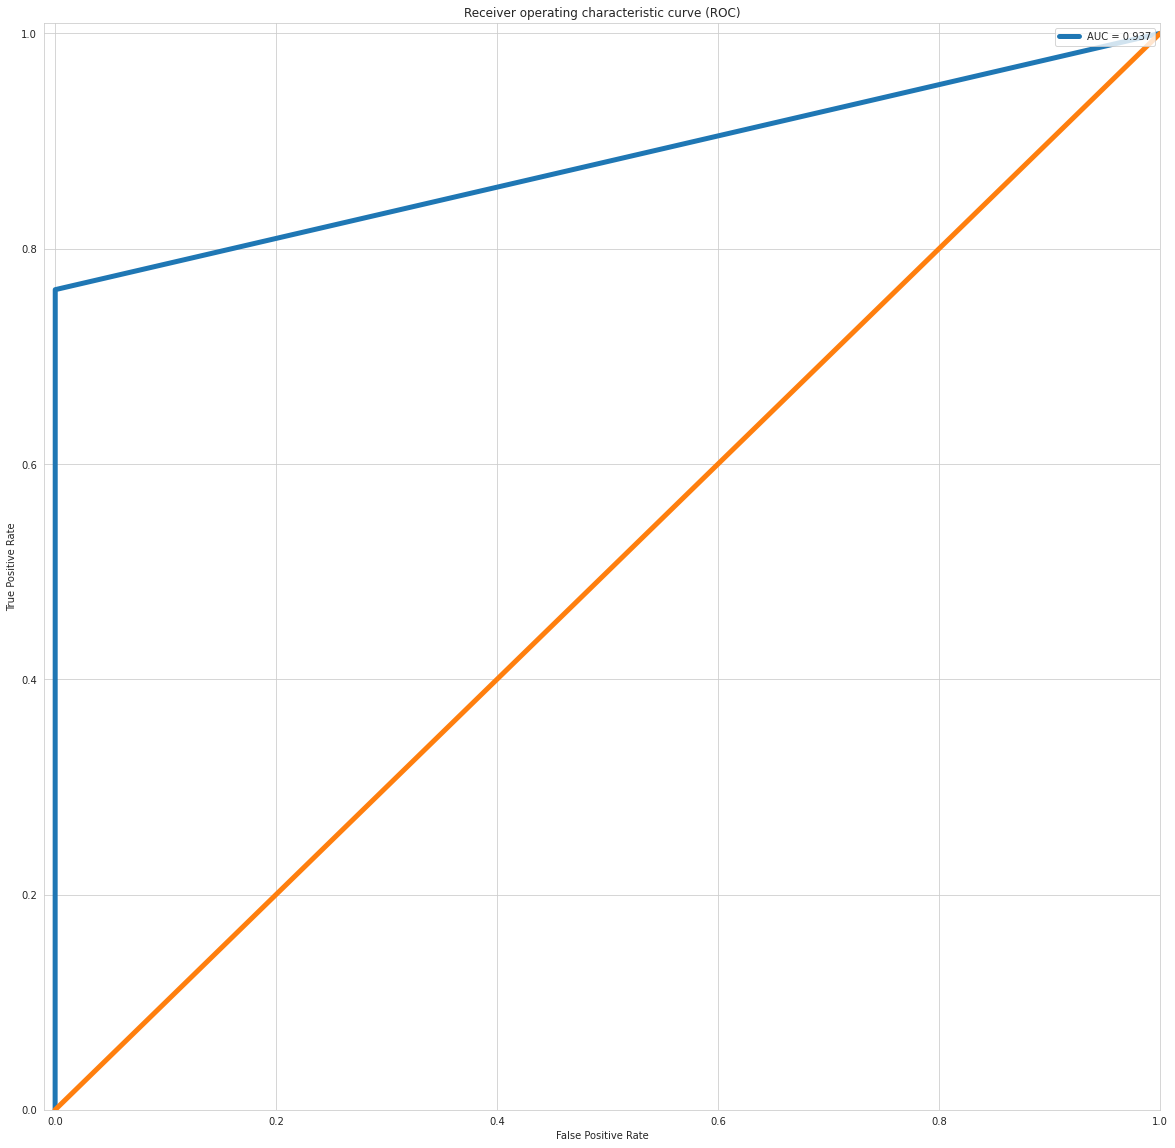

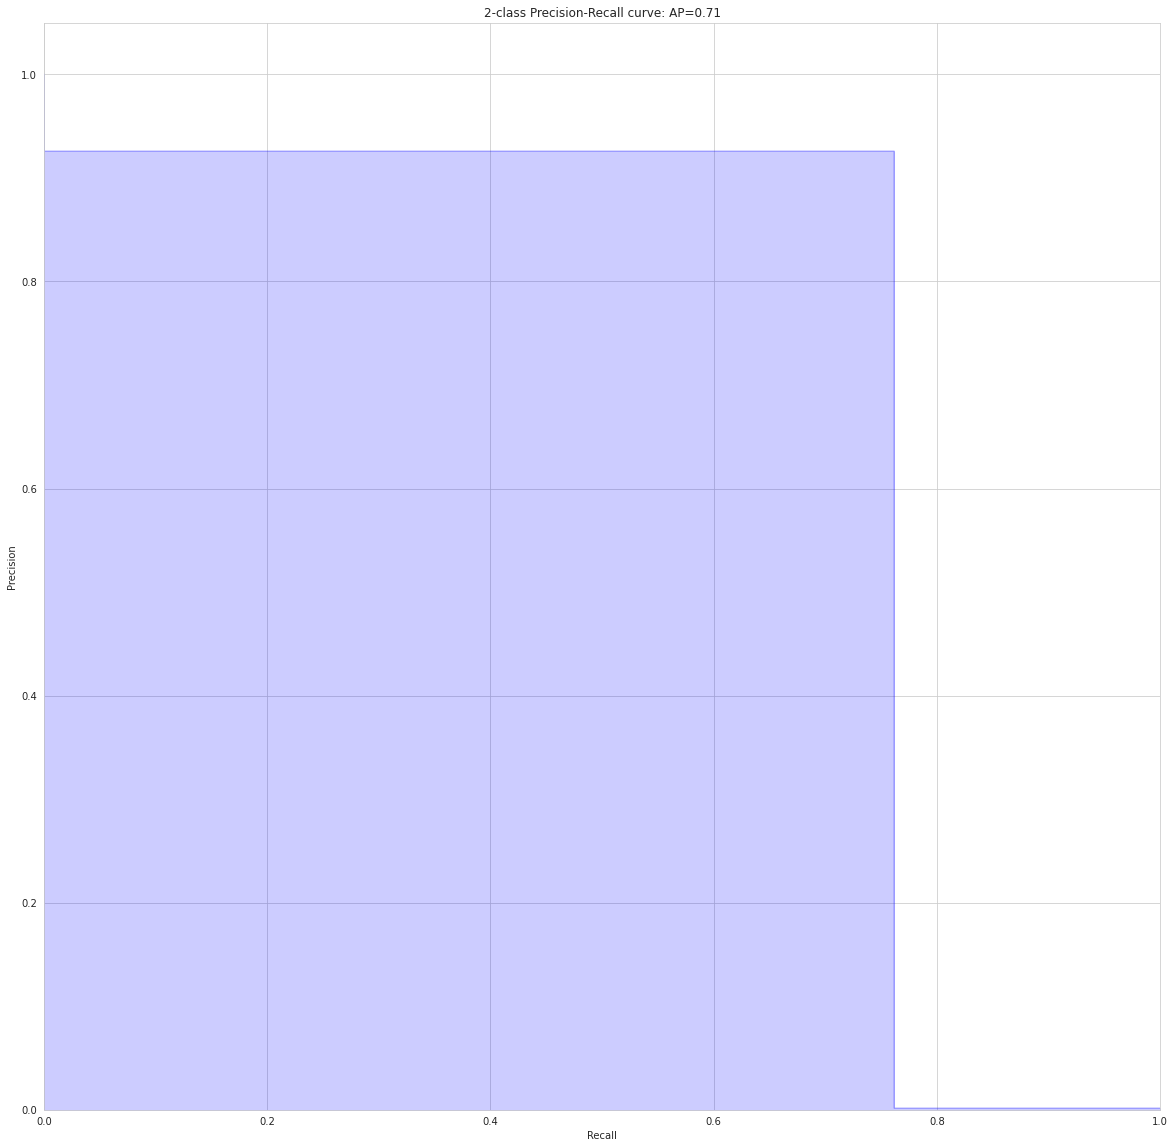

**********************************************************************
**********************************************************************
Logistic Regression with ADASYN: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     85296
           1       0.02      0.95      0.03       147

    accuracy                           0.91     85443
   macro avg       0.51      0.93      0.49     85443
weighted avg       1.00      0.91      0.95     85443

Confusion matrix:
 [[77299  7997]
 [    7   140]]
Accuracy :0.90632
F1 Score: 0.033800096571704484
Recall score: 0.9523809523809523
Precision score: 0.017205358240137643


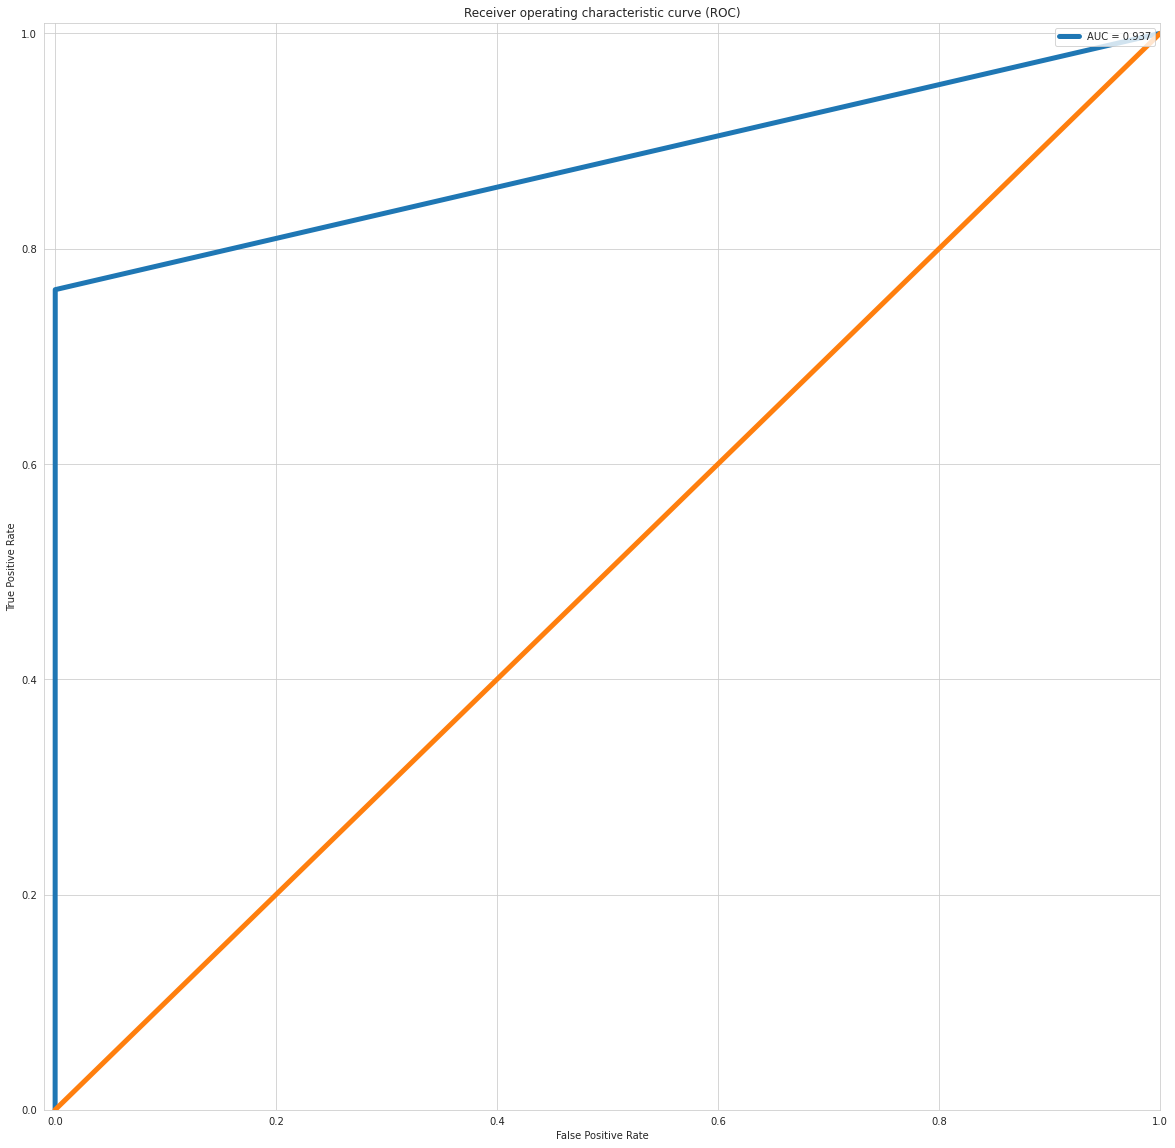

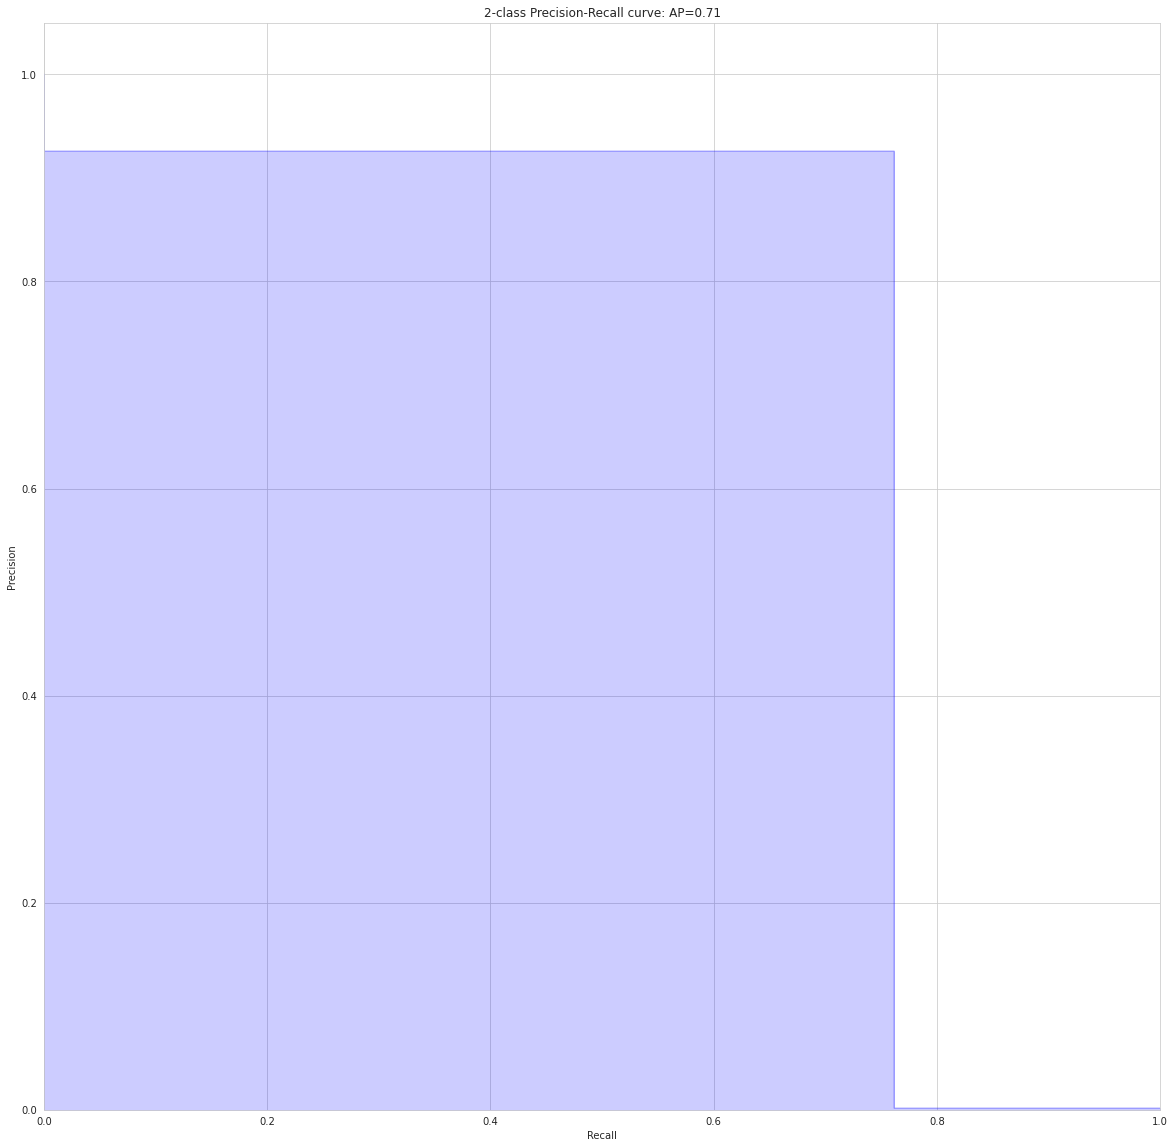

**********************************************************************


In [ ]:


# Resample your training data
rus = RandomUnderSampler()
ros = RandomOverSampler()
smote = SMOTE(kind='regular',random_state=5)
blsmote = BorderlineSMOTE(kind='borderline-2',random_state=5)
adasyn=ADASYN(random_state=0)

X_train_rus, y_train_rus = rus.fit_sample(X_train,y_train)
X_train_ros, y_train_ros = ros.fit_sample(X_train,y_train)
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)
X_train_blsmote, y_train_blsmote = blsmote.fit_sample(X_train,y_train)
X_train_ada, y_train_ada = adasyn.fit_resample(X_train,y_train)



# Fit a logistic regression model to our data
rus_model = LogisticRegression().fit(X_train_rus, y_train_rus)
ros_model = LogisticRegression().fit(X_train_ros, y_train_ros)
smote_model = LogisticRegression().fit(X_train_smote, y_train_smote)
blsmote_model = LogisticRegression().fit(X_train_blsmote, y_train_blsmote)
adasyn_model = LogisticRegression().fit(X_train_ada, y_train_ada)
name='Logistic Regression: '
y_rus = rus_model.predict(X_test)
y_ros = ros_model.predict(X_test)
y_smote = smote_model.predict(X_test)
y_blsmote = blsmote_model.predict(X_test)
y_adasyn = adasyn_model.predict(X_test)

PrintModelResults('Logistic Regression with RandomUnderSampling: ',y_test, y_rus,false_positive_rate, true_positive_rate, threshold)

PrintModelResults('Logistic Regression with RandomOverSampling: ',y_test, y_ros,false_positive_rate, true_positive_rate, threshold)

PrintModelResults('Logistic Regression with SMOTE: ',y_test, y_smote,false_positive_rate, true_positive_rate, threshold)

PrintModelResults('Logistic Regression with blSmote: ',y_test, y_blsmote,false_positive_rate, true_positive_rate, threshold)

PrintModelResults('Logistic Regression with ADASYN: ',y_test, y_adasyn,false_positive_rate, true_positive_rate, threshold)

## Logistic Regression with sampled Data using Pipeline

**********************************************************************
Logistic Regression with pipeline
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85296
           1       0.07      0.88      0.13       147

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

Confusion matrix:
 [[83660  1636]
 [   18   129]]
Accuracy :0.98064
F1 Score: 0.13493723849372385
Recall score: 0.8775510204081632
Precision score: 0.07308781869688386


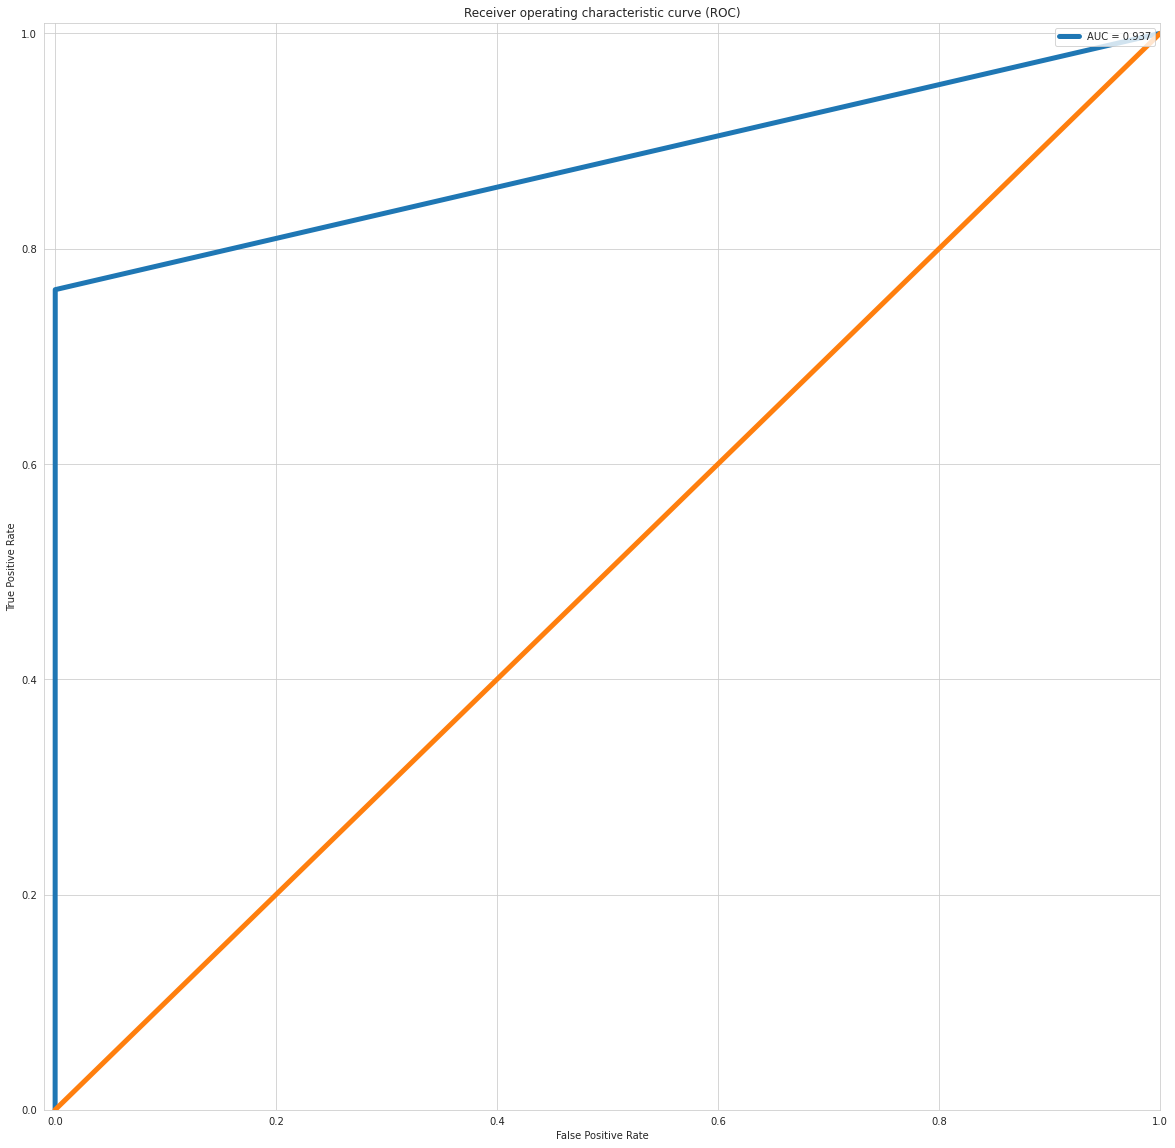

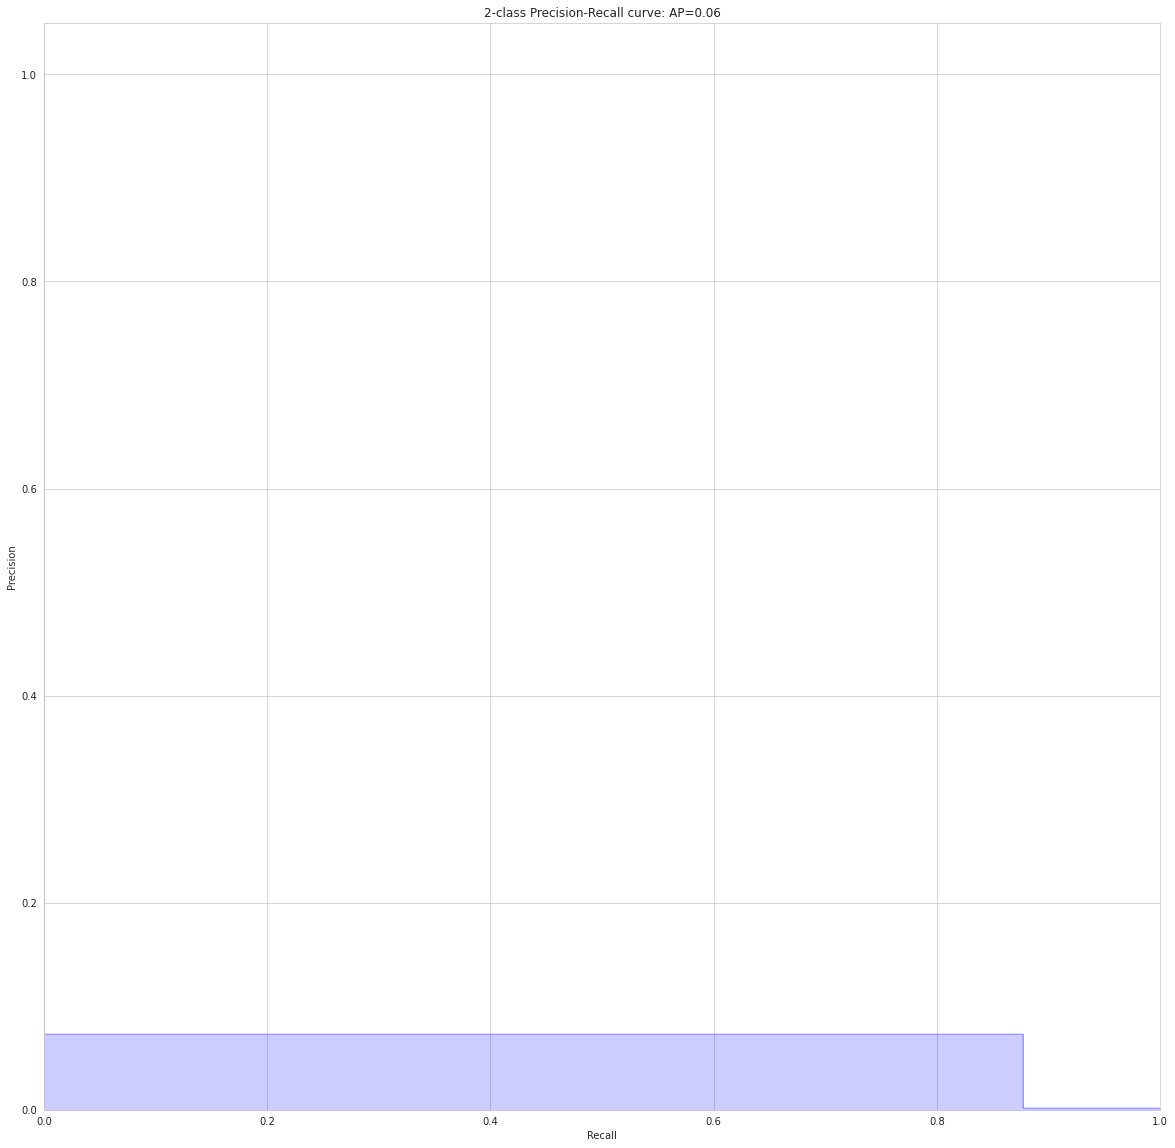

**********************************************************************


In [ ]:
# Import the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 


# Define which resampling method and which ML model to use in the pipeline
resampling = BorderlineSMOTE(kind='borderline-2',random_state=0) # instead SMOTE(kind='borderline2') 
model = LogisticRegression() 

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Logistic Regression', model)])

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
y_predicted = pipeline.predict(X_test)

# Obtain the results from the classification report and confusion matrix 

PrintModelResults("Logistic Regression with pipeline",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)


As you can see, with the BorderlineSMOTE resampling method, we can get the best f1-score 0.15 compared with other 3 reampling methods. 
Not in all cases does resampling necessarily lead to better results.  
When the fraud cases are very spread and scattered over the data, using SMOTE can introduce a bit of bias.   
Nearest neighbors aren't necessarily also fraud cases, so the synthetic samples might 'confuse' the model slightly.

## Decision Tree Classifier with Resampled Data

**********************************************************************
Decision Tree Classifier with Random UnderSampling: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92     85296
           1       0.01      0.93      0.02       147

    accuracy                           0.85     85443
   macro avg       0.51      0.89      0.47     85443
weighted avg       1.00      0.85      0.91     85443

Confusion matrix:
 [[72102 13194]
 [   10   137]]
Accuracy :0.84546
F1 Score: 0.020329425730820597
Recall score: 0.9319727891156463
Precision score: 0.010276798439726953


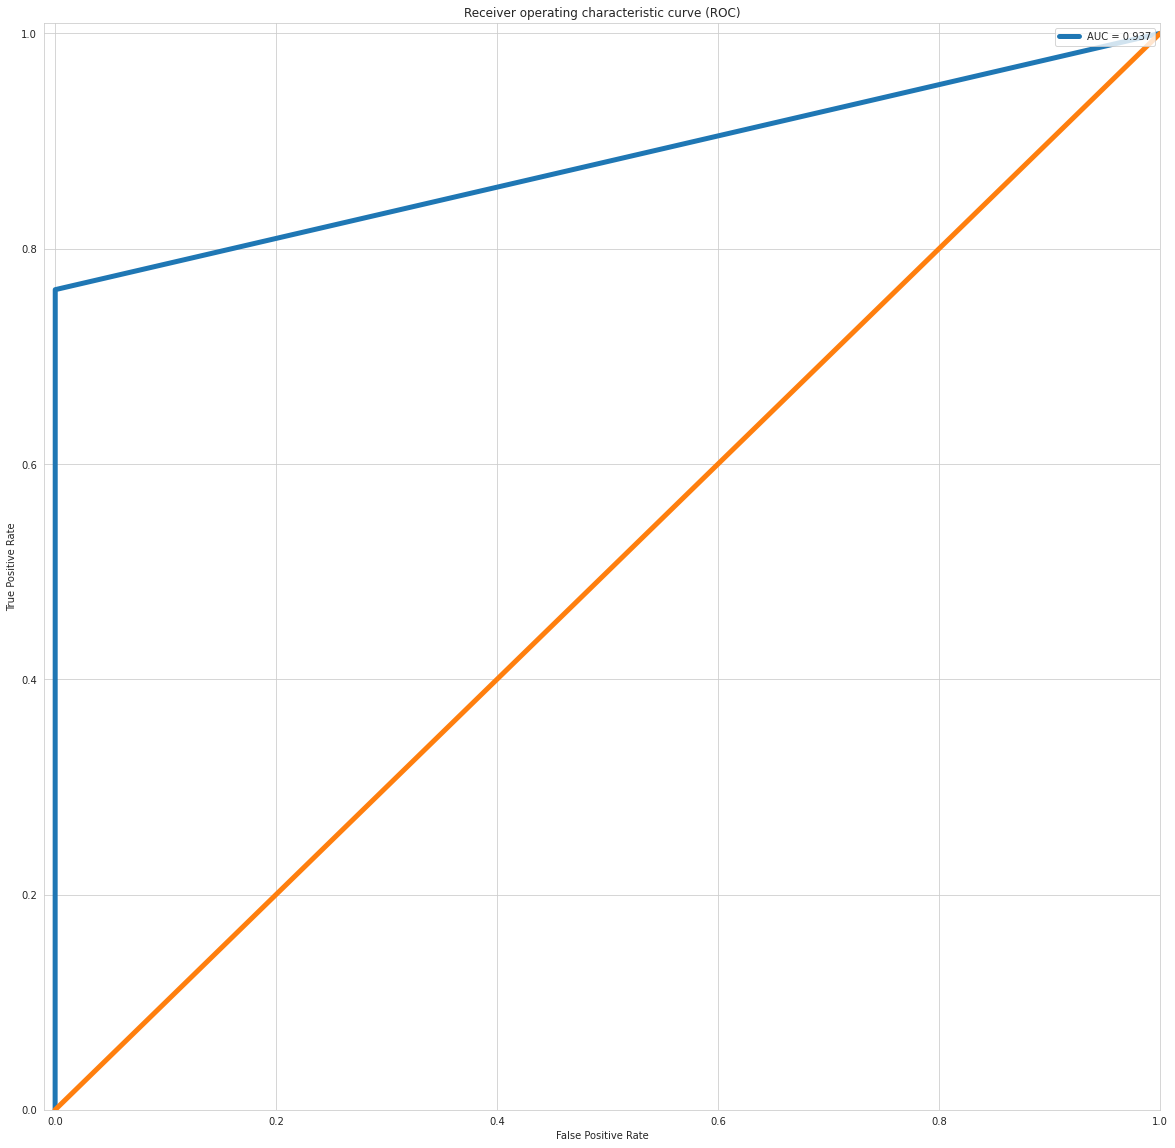

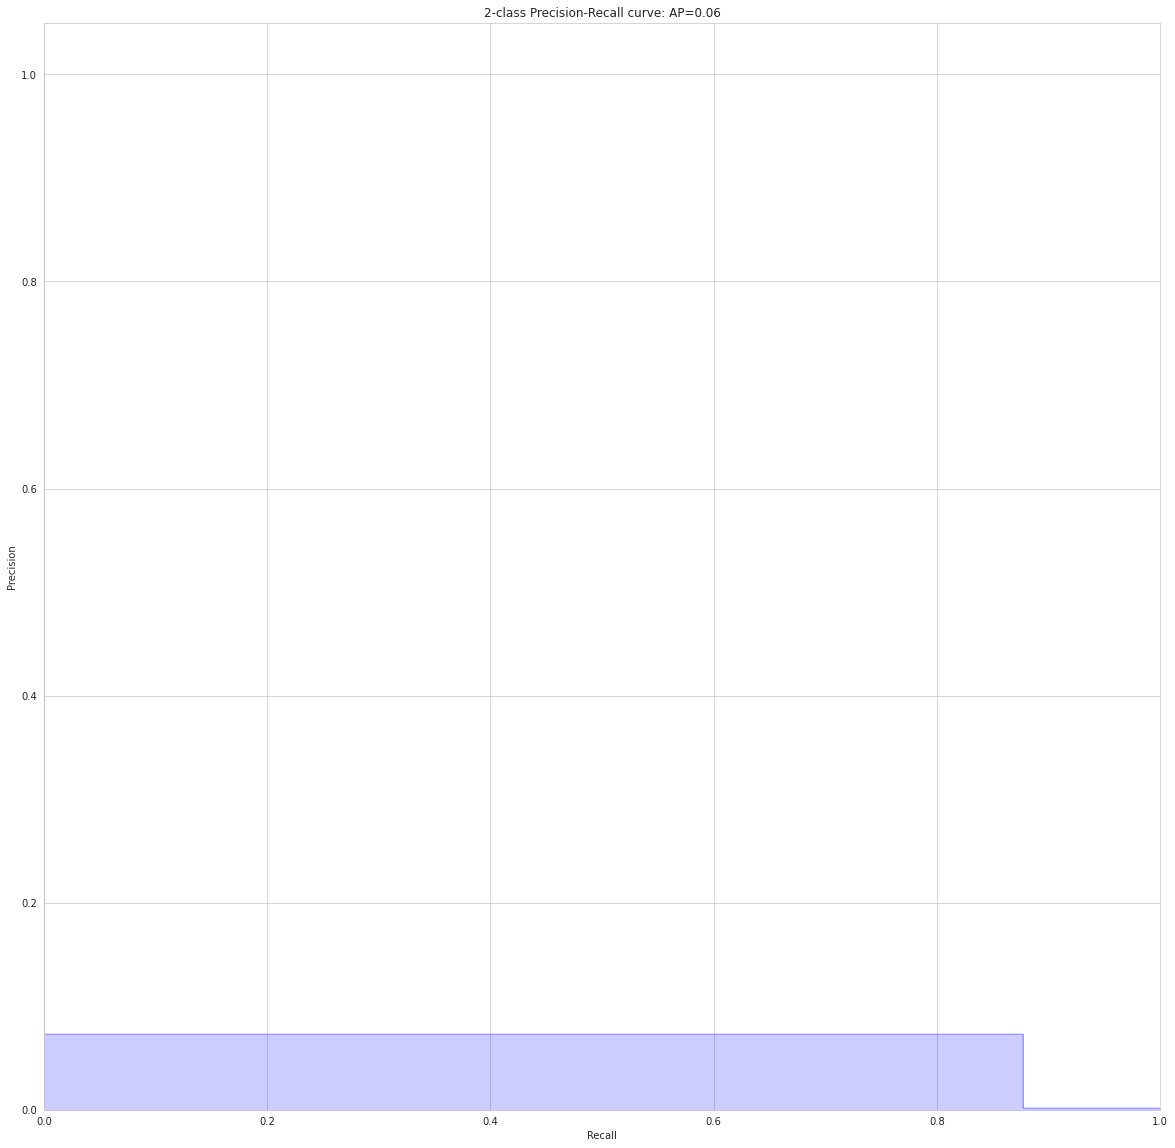

**********************************************************************
**********************************************************************
Decision Tree Classifier with Random OverSampling: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92     85296
           1       0.01      0.93      0.02       147

    accuracy                           0.85     85443
   macro avg       0.51      0.89      0.47     85443
weighted avg       1.00      0.85      0.91     85443

Confusion matrix:
 [[72102 13194]
 [   10   137]]
Accuracy :0.84546
F1 Score: 0.020329425730820597
Recall score: 0.9319727891156463
Precision score: 0.010276798439726953


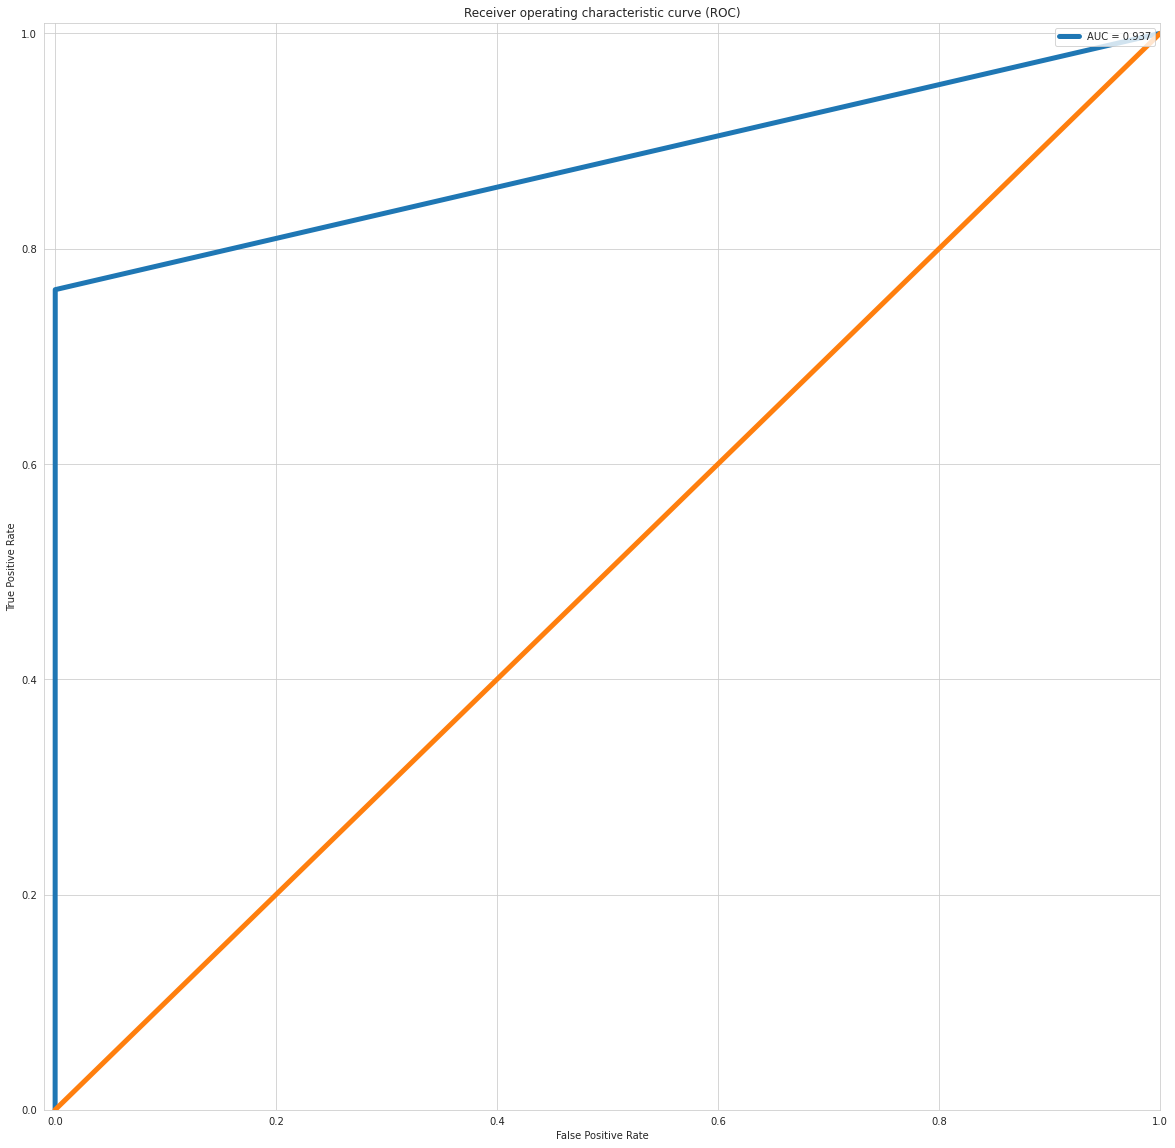

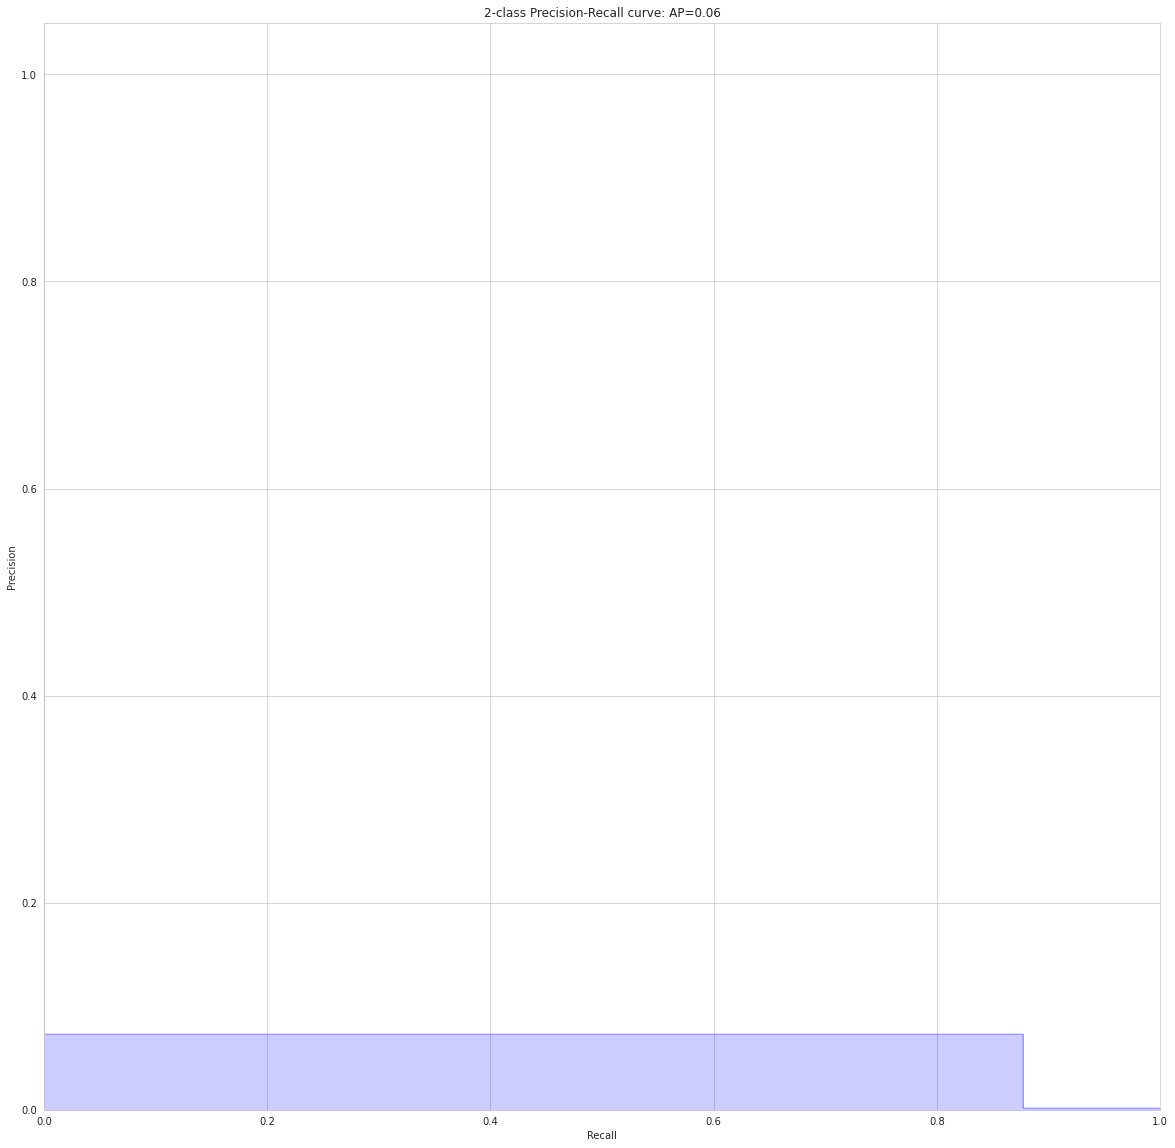

**********************************************************************
**********************************************************************
Decision Tree Classifier with SMOTE: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92     85296
           1       0.01      0.93      0.02       147

    accuracy                           0.85     85443
   macro avg       0.51      0.89      0.47     85443
weighted avg       1.00      0.85      0.91     85443

Confusion matrix:
 [[72102 13194]
 [   10   137]]
Accuracy :0.84546
F1 Score: 0.020329425730820597
Recall score: 0.9319727891156463
Precision score: 0.010276798439726953


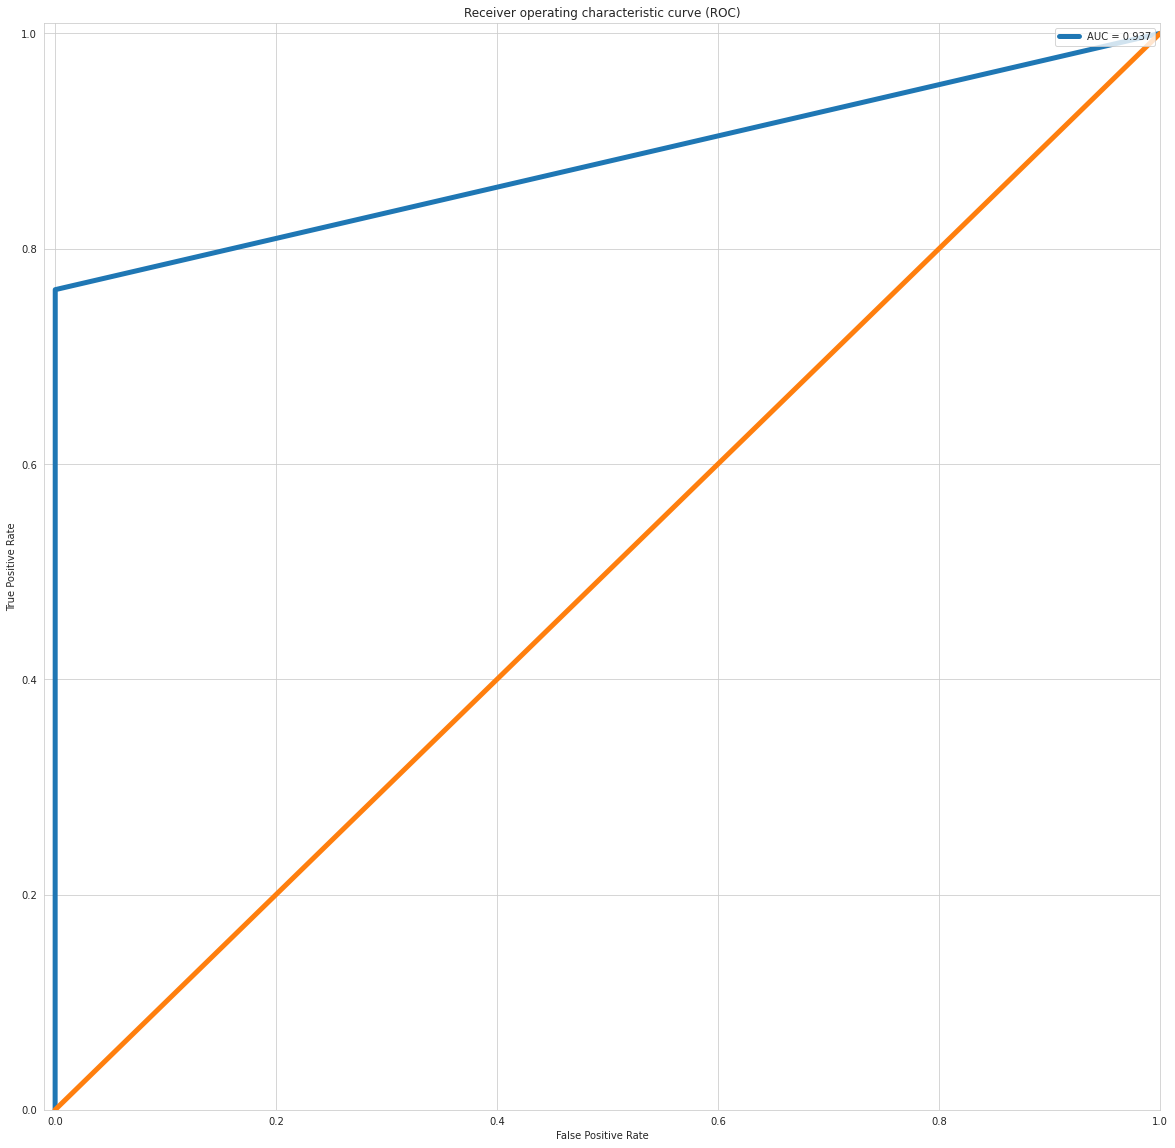

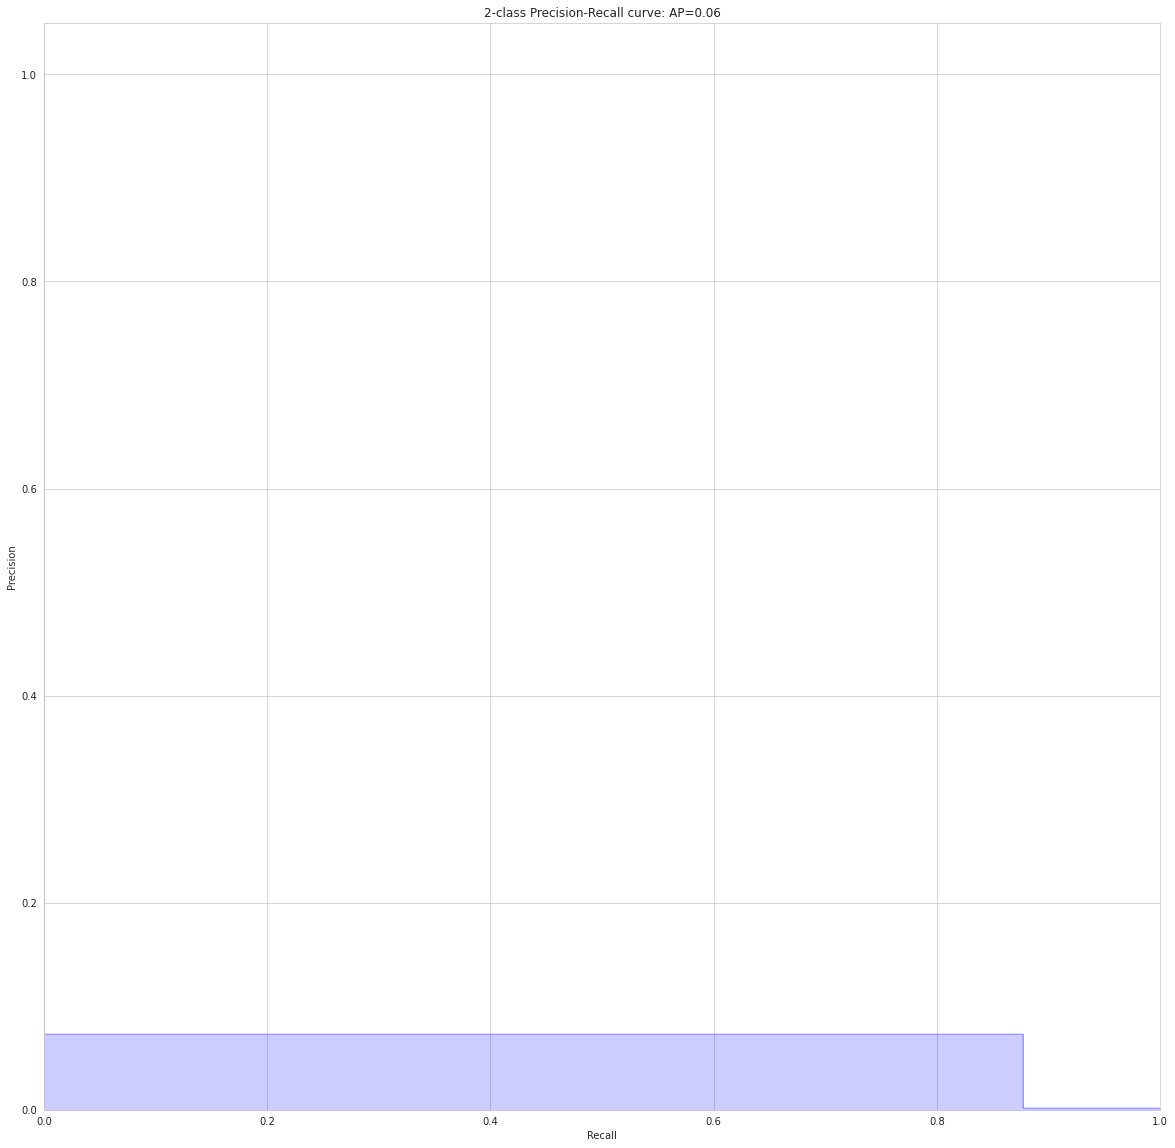

**********************************************************************
**********************************************************************
Decision Tree Classifier with blSMOTE: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92     85296
           1       0.01      0.93      0.02       147

    accuracy                           0.85     85443
   macro avg       0.51      0.89      0.47     85443
weighted avg       1.00      0.85      0.91     85443

Confusion matrix:
 [[72102 13194]
 [   10   137]]
Accuracy :0.84546
F1 Score: 0.020329425730820597
Recall score: 0.9319727891156463
Precision score: 0.010276798439726953


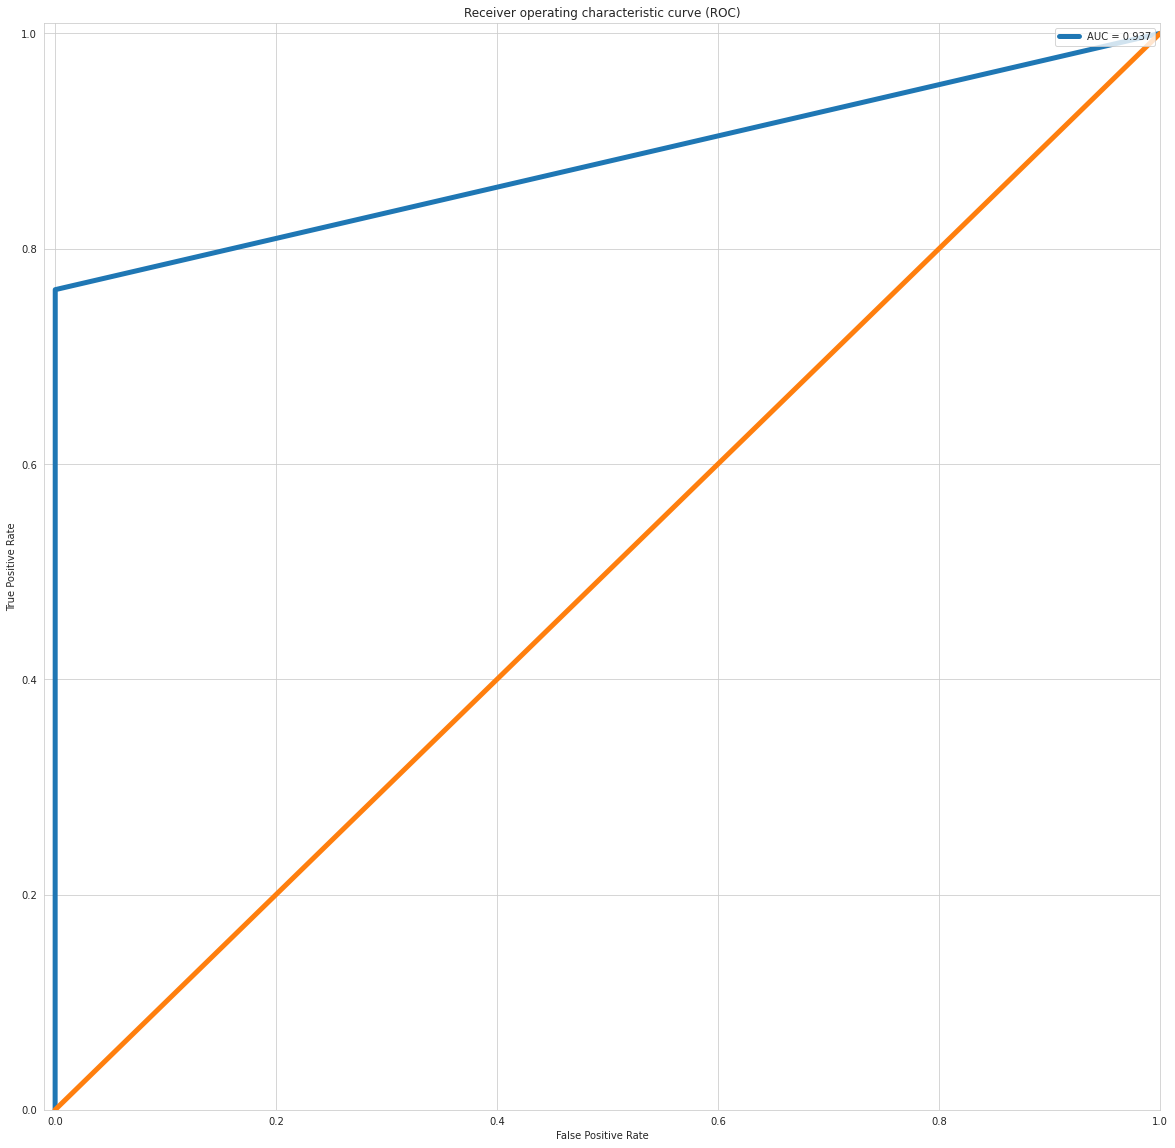

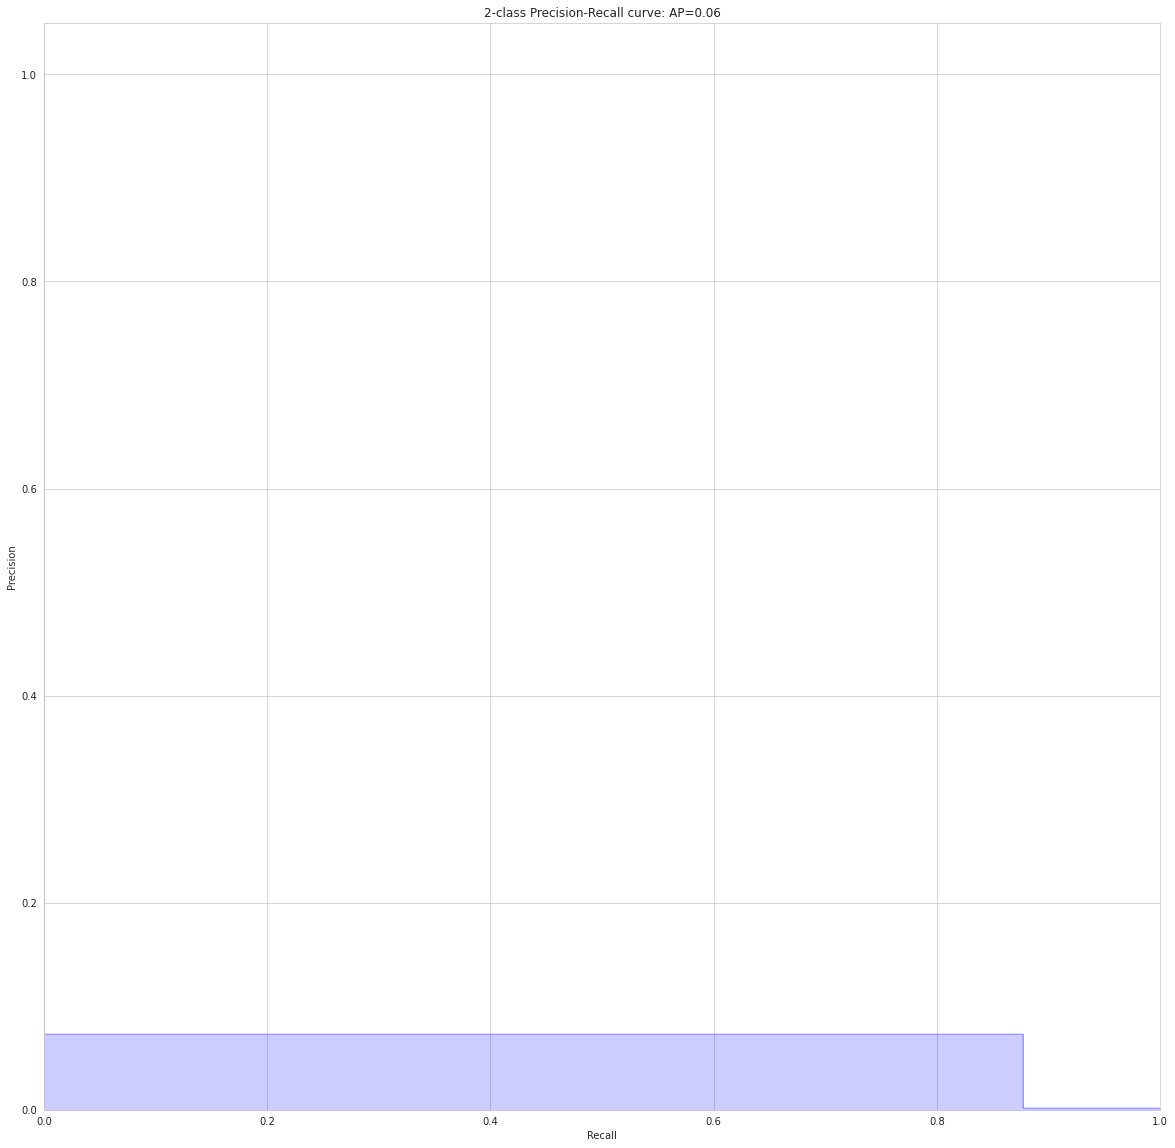

**********************************************************************
**********************************************************************
Decision Tree Classifier with ADASYN: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.85      0.92     85296
           1       0.01      0.93      0.02       147

    accuracy                           0.85     85443
   macro avg       0.51      0.89      0.47     85443
weighted avg       1.00      0.85      0.91     85443

Confusion matrix:
 [[72102 13194]
 [   10   137]]
Accuracy :0.84546
F1 Score: 0.020329425730820597
Recall score: 0.9319727891156463
Precision score: 0.010276798439726953


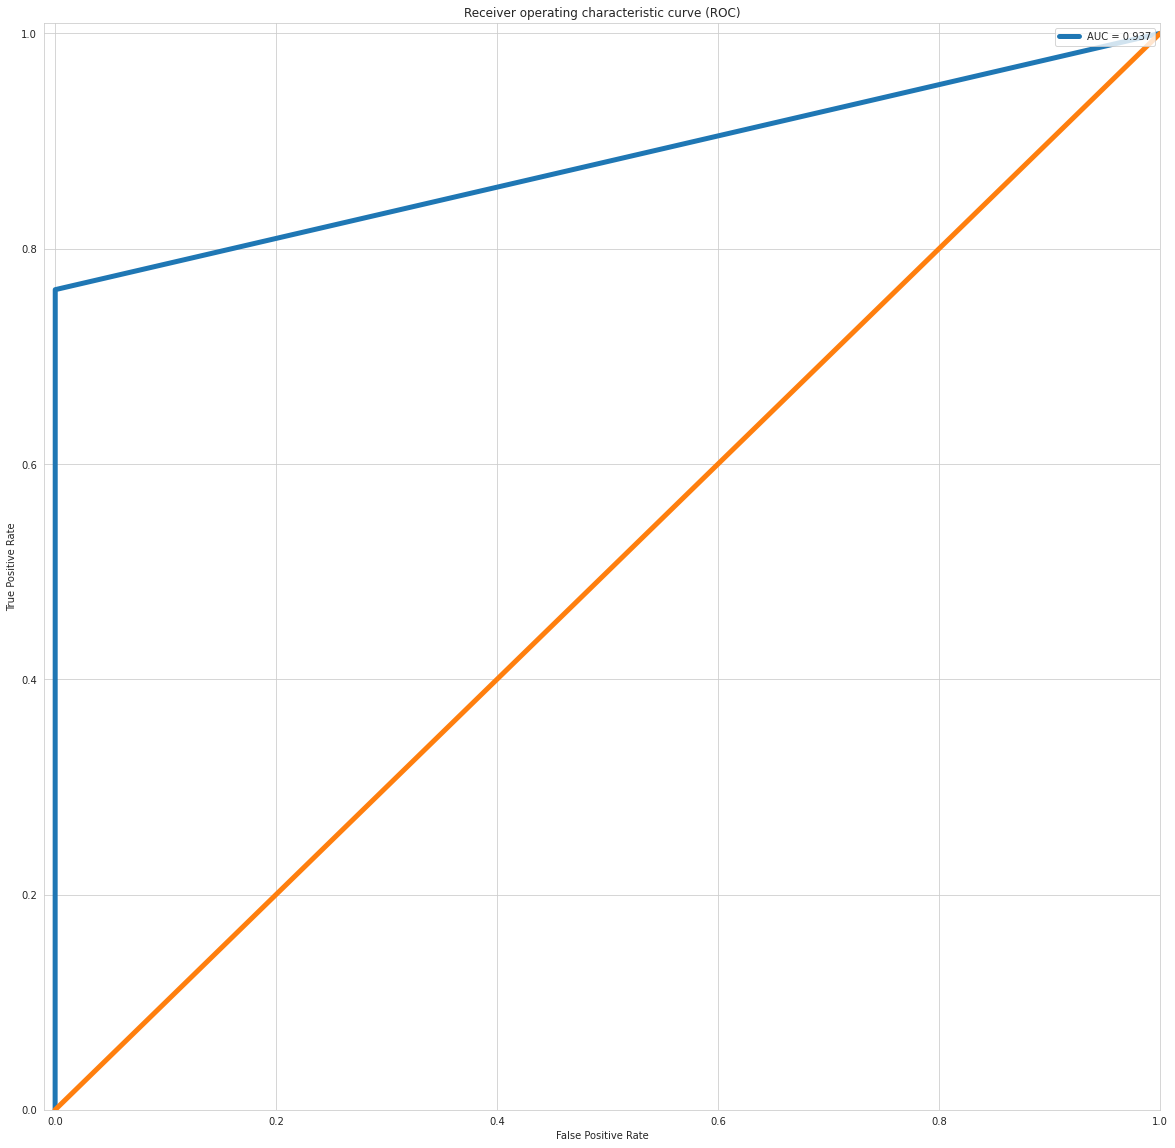

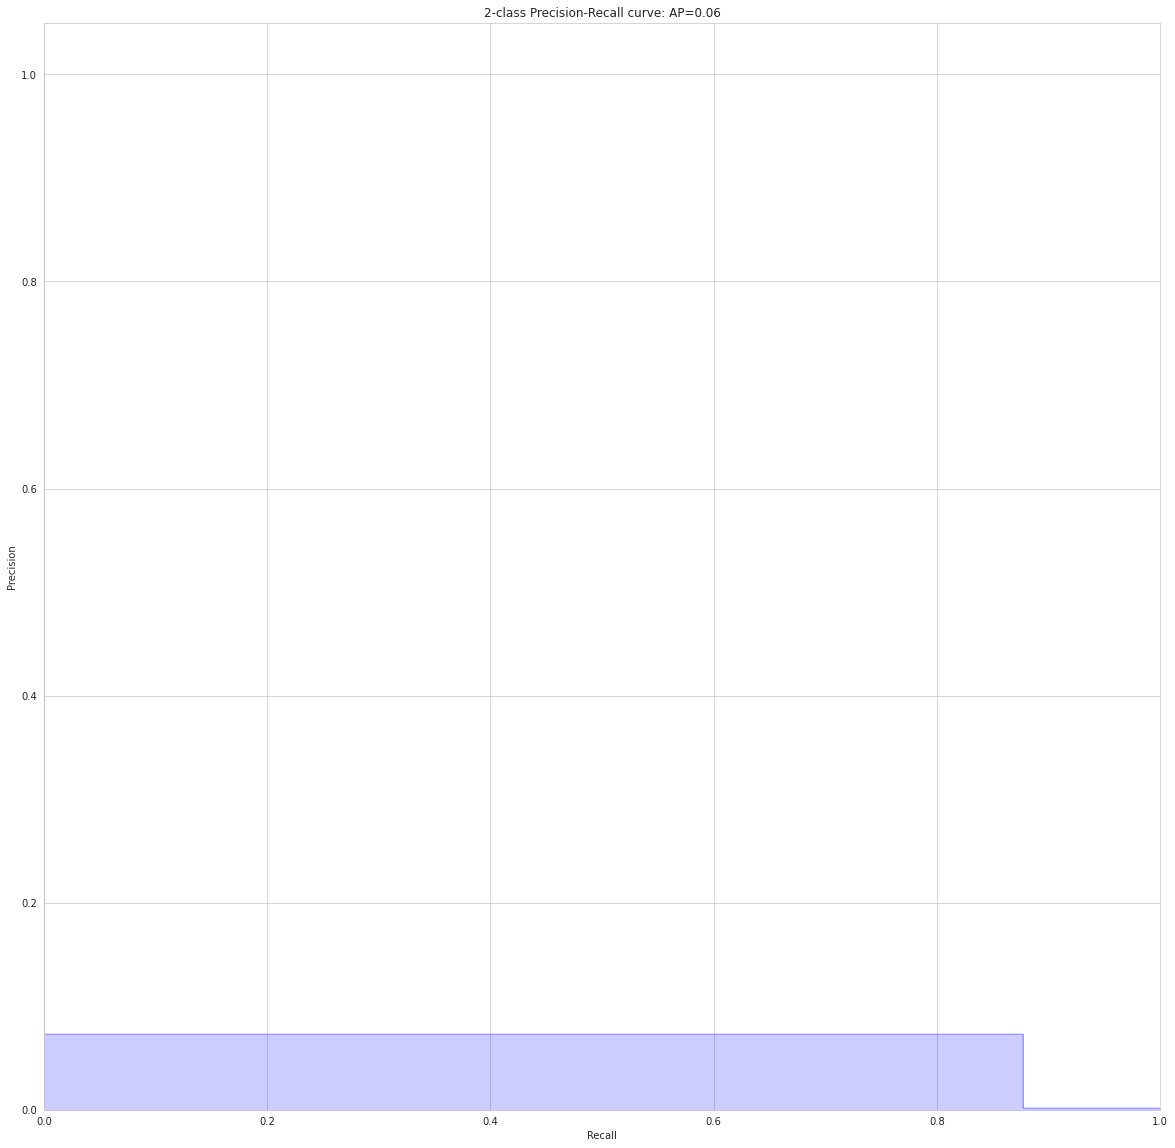

**********************************************************************


In [ ]:


# Resample your training data
rus = RandomUnderSampler()
ros = RandomOverSampler()
smote = SMOTE(kind='regular',random_state=5)
blsmote = BorderlineSMOTE(kind='borderline-2',random_state=5)
adasyn=ADASYN(random_state=0)

X_train_rus, y_train_rus = rus.fit_sample(X_train,y_train)
X_train_ros, y_train_ros = ros.fit_sample(X_train,y_train)
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)
X_train_blsmote, y_train_blsmote = blsmote.fit_sample(X_train,y_train)
X_train_ada, y_train_ada = adasyn.fit_resample(X_train,y_train)
model= DecisionTreeClassifier(criterion='entropy', max_depth= 3, min_samples_leaf= 5)


# Fit a logistic regression model to our data
rus_model = model.fit(X_train_rus, y_train_rus)
ros_model = model.fit(X_train_ros, y_train_ros)
smote_model = model.fit(X_train_smote, y_train_smote)
blsmote_model = model.fit(X_train_blsmote, y_train_blsmote)
adasyn_model = model.fit(X_train_ada, y_train_ada)
name='Decision Tree Classifier: '
y_rus = rus_model.predict(X_test)
y_ros = ros_model.predict(X_test)
y_smote = smote_model.predict(X_test)
y_blsmote = blsmote_model.predict(X_test)
y_adasyn = adasyn_model.predict(X_test)

PrintModelResults('Decision Tree Classifier with Random UnderSampling: ',y_test, y_rus,false_positive_rate, true_positive_rate, threshold)

PrintModelResults('Decision Tree Classifier with Random OverSampling: ',y_test, y_ros,false_positive_rate, true_positive_rate, threshold)

PrintModelResults('Decision Tree Classifier with SMOTE: ',y_test, y_smote,false_positive_rate, true_positive_rate, threshold)

PrintModelResults('Decision Tree Classifier with blSMOTE: ',y_test, y_blsmote,false_positive_rate, true_positive_rate, threshold)

PrintModelResults('Decision Tree Classifier with ADASYN: ',y_test, y_adasyn,false_positive_rate, true_positive_rate, threshold)

**********************************************************************
Decision Tree Classifier with pipeline: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85296
           1       0.61      0.71      0.66       147

    accuracy                           1.00     85443
   macro avg       0.80      0.86      0.83     85443
weighted avg       1.00      1.00      1.00     85443

Confusion matrix:
 [[85229    67]
 [   42   105]]
Accuracy :0.99872
F1 Score: 0.6583072100313481
Recall score: 0.7142857142857143
Precision score: 0.6104651162790697


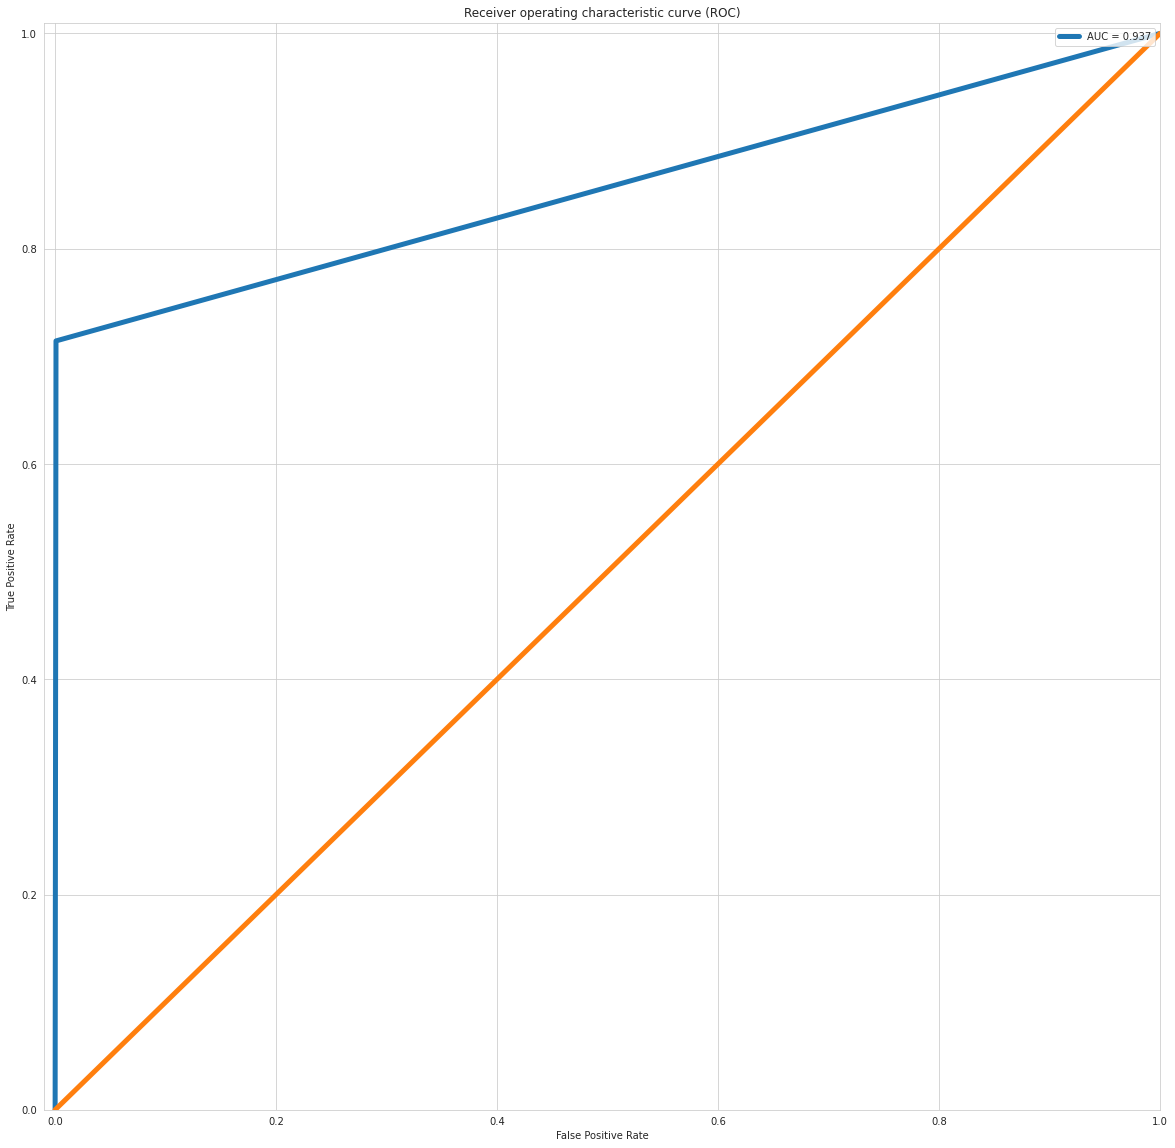

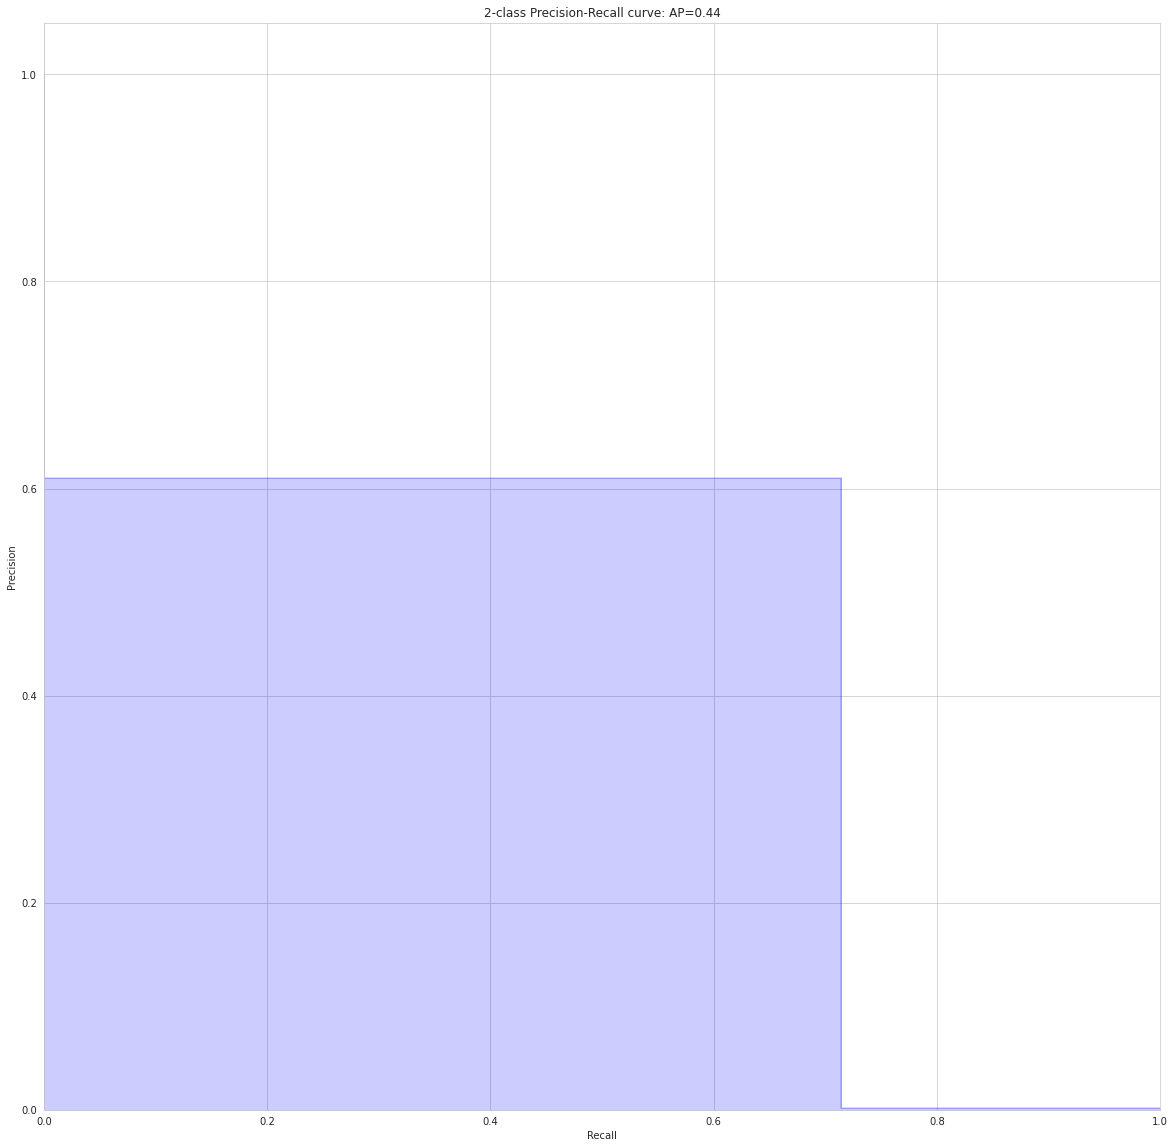

**********************************************************************


In [ ]:
# Import the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import BorderlineSMOTE

# Define which resampling method and which ML model to use in the pipeline
resampling = BorderlineSMOTE(kind='borderline-2',random_state=0) # instead SMOTE(kind='borderline2') 
model = DecisionTreeClassifier() 

# Define the pipeline, tell it to combine SMOTE with the Logistic Regression model
pipeline = Pipeline([('SMOTE', resampling), ('Decision Tree Classifier', model)])

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
y_predicted = pipeline.predict(X_test)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults("Decision Tree Classifier with pipeline: ",y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

Precision =  0.63. The rate of true positive in all positive cases.  
Recall =  0.71. The rate of true positive in all true cases.  
F1-score = 0.66  
False positives cases = 62.  

## Random Forest Classifier with Resampled data and SMOTE Data Catch Fraud 

**********************************************************************
Random Forest Classifier with Random UnderSampling: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.06      0.11     85296
           1       0.00      1.00      0.00       147

    accuracy                           0.06     85443
   macro avg       0.50      0.53      0.06     85443
weighted avg       1.00      0.06      0.11     85443

Confusion matrix:
 [[ 4951 80345]
 [    0   147]]
Accuracy :0.05967
F1 Score: 0.003645878545120847
Recall score: 1.0
Precision score: 0.0018262684490384137


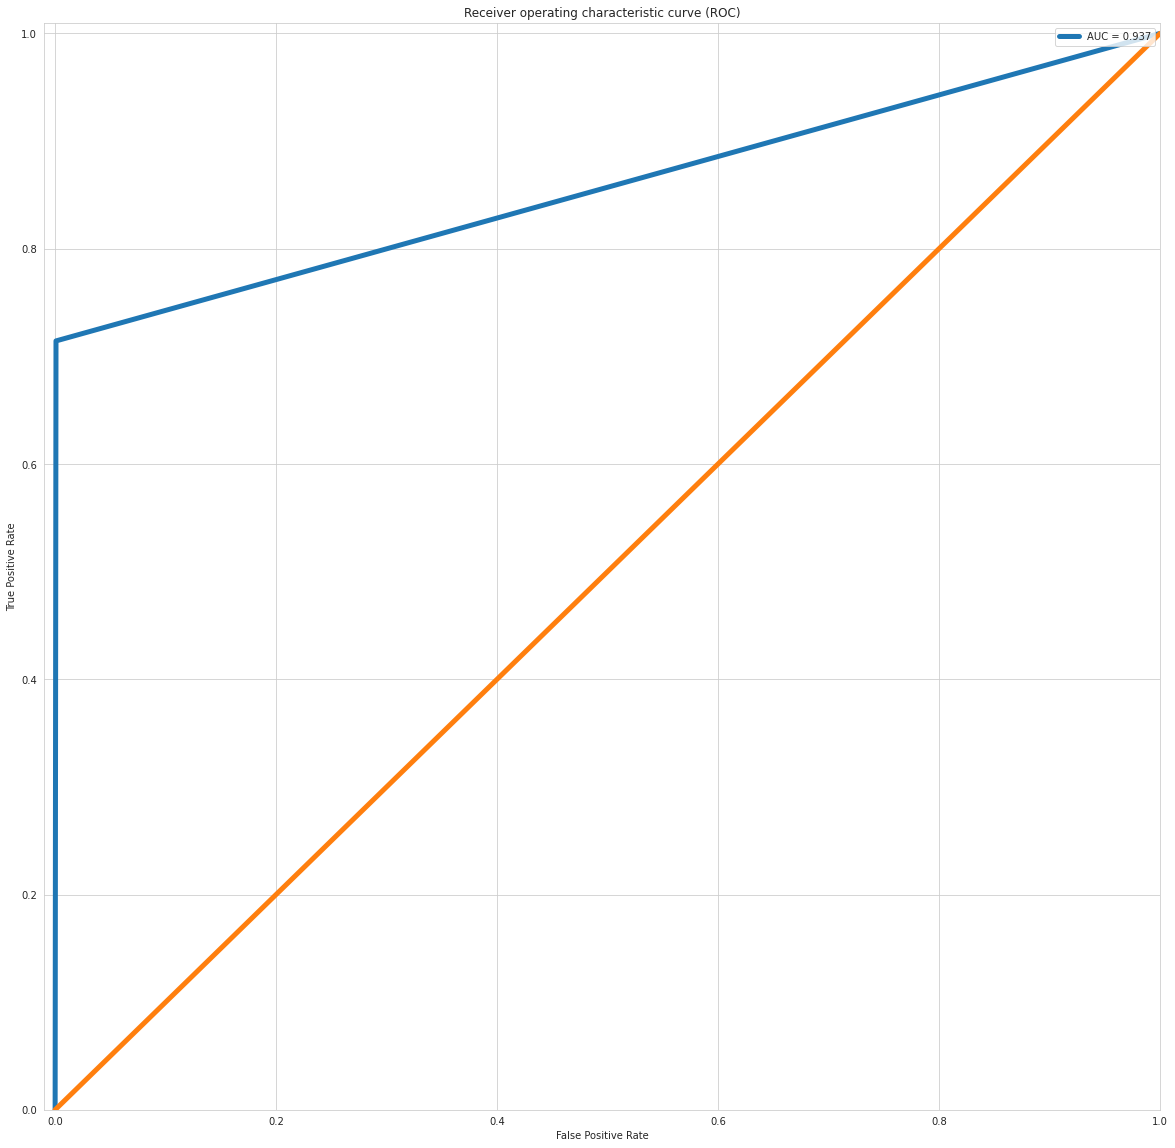

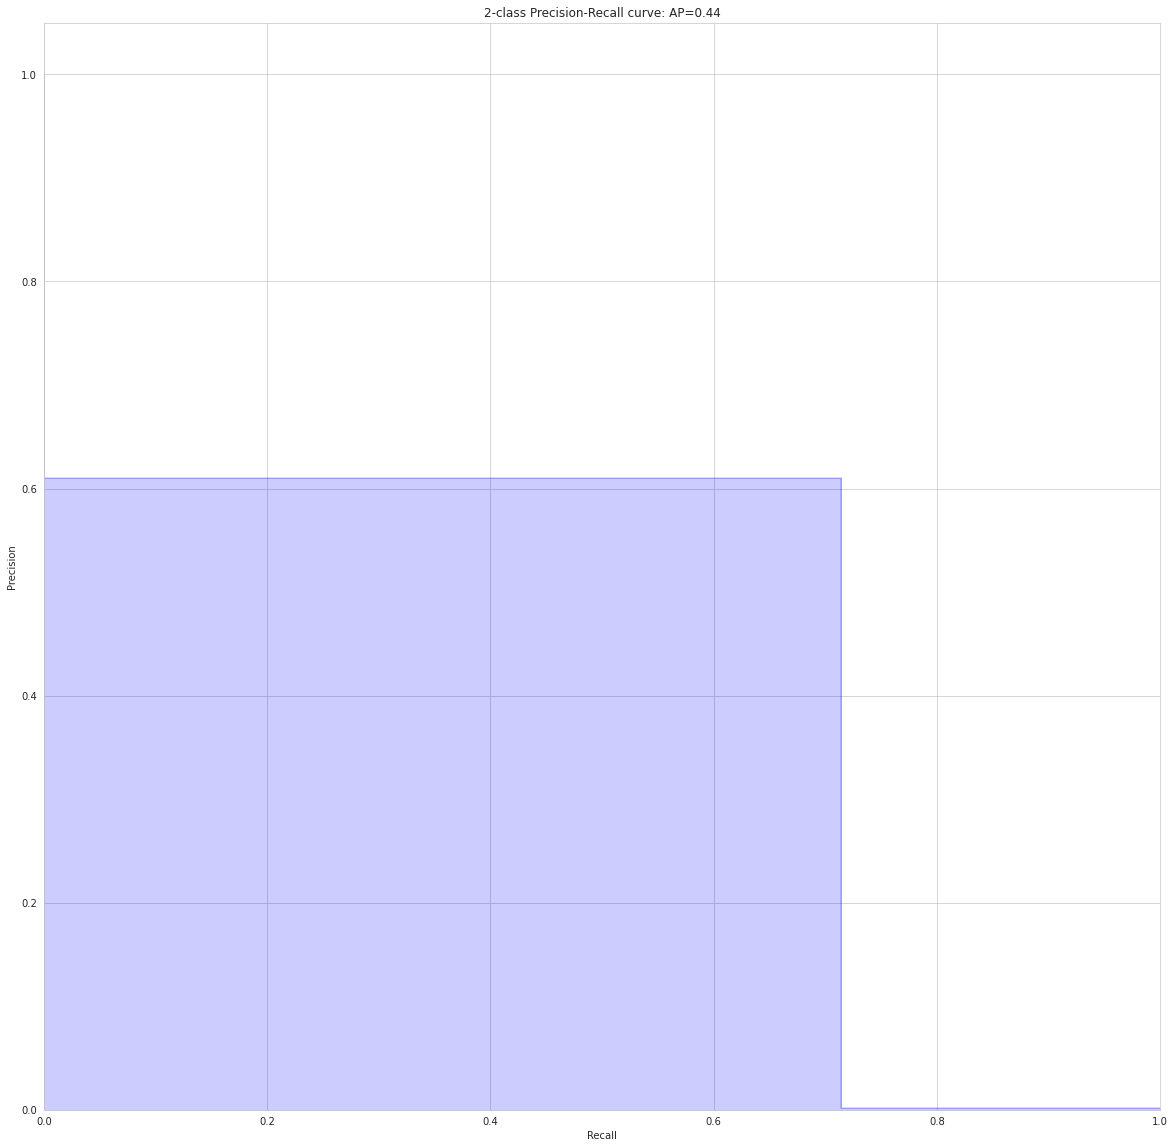

**********************************************************************
**********************************************************************
Random Forest Classifier with Random OverSampling: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.06      0.11     85296
           1       0.00      1.00      0.00       147

    accuracy                           0.06     85443
   macro avg       0.50      0.53      0.06     85443
weighted avg       1.00      0.06      0.11     85443

Confusion matrix:
 [[ 4951 80345]
 [    0   147]]
Accuracy :0.05967
F1 Score: 0.003645878545120847
Recall score: 1.0
Precision score: 0.0018262684490384137


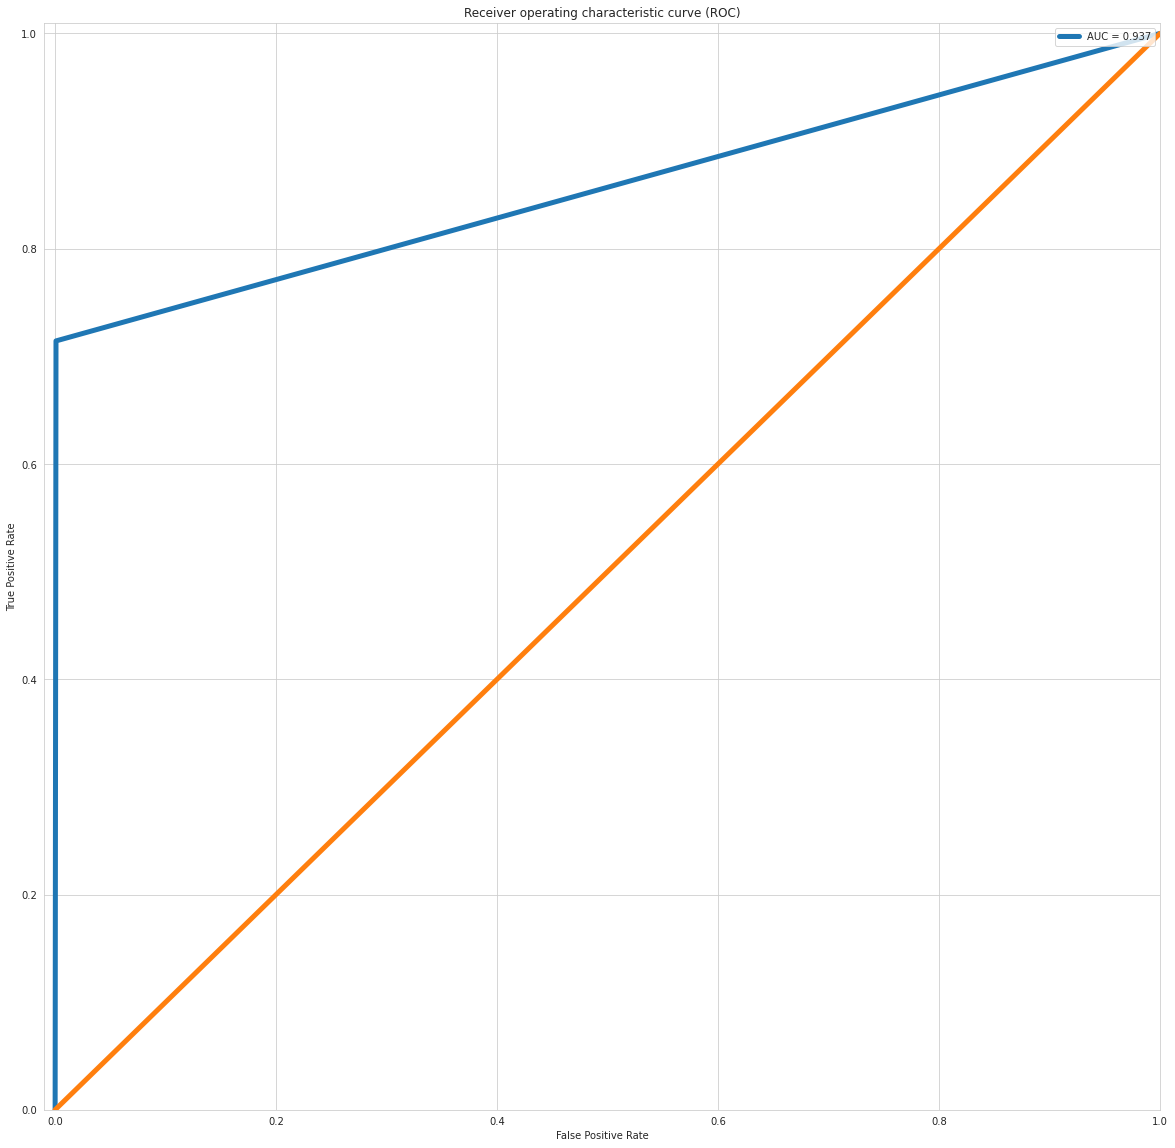

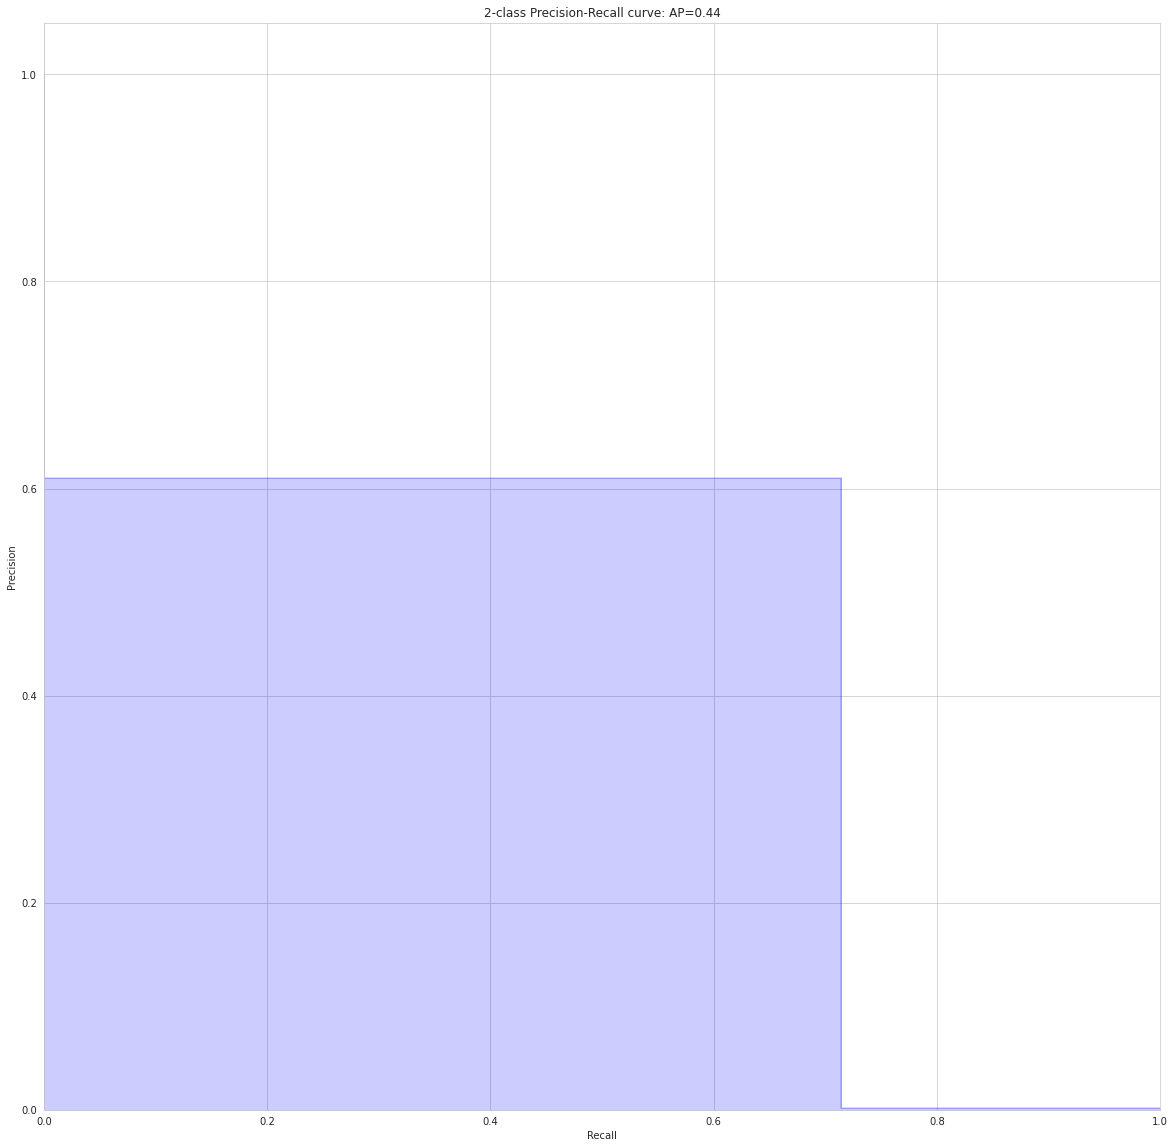

**********************************************************************
**********************************************************************
Random Forest Classifier with SMOTE: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.06      0.11     85296
           1       0.00      1.00      0.00       147

    accuracy                           0.06     85443
   macro avg       0.50      0.53      0.06     85443
weighted avg       1.00      0.06      0.11     85443

Confusion matrix:
 [[ 4951 80345]
 [    0   147]]
Accuracy :0.05967
F1 Score: 0.003645878545120847
Recall score: 1.0
Precision score: 0.0018262684490384137


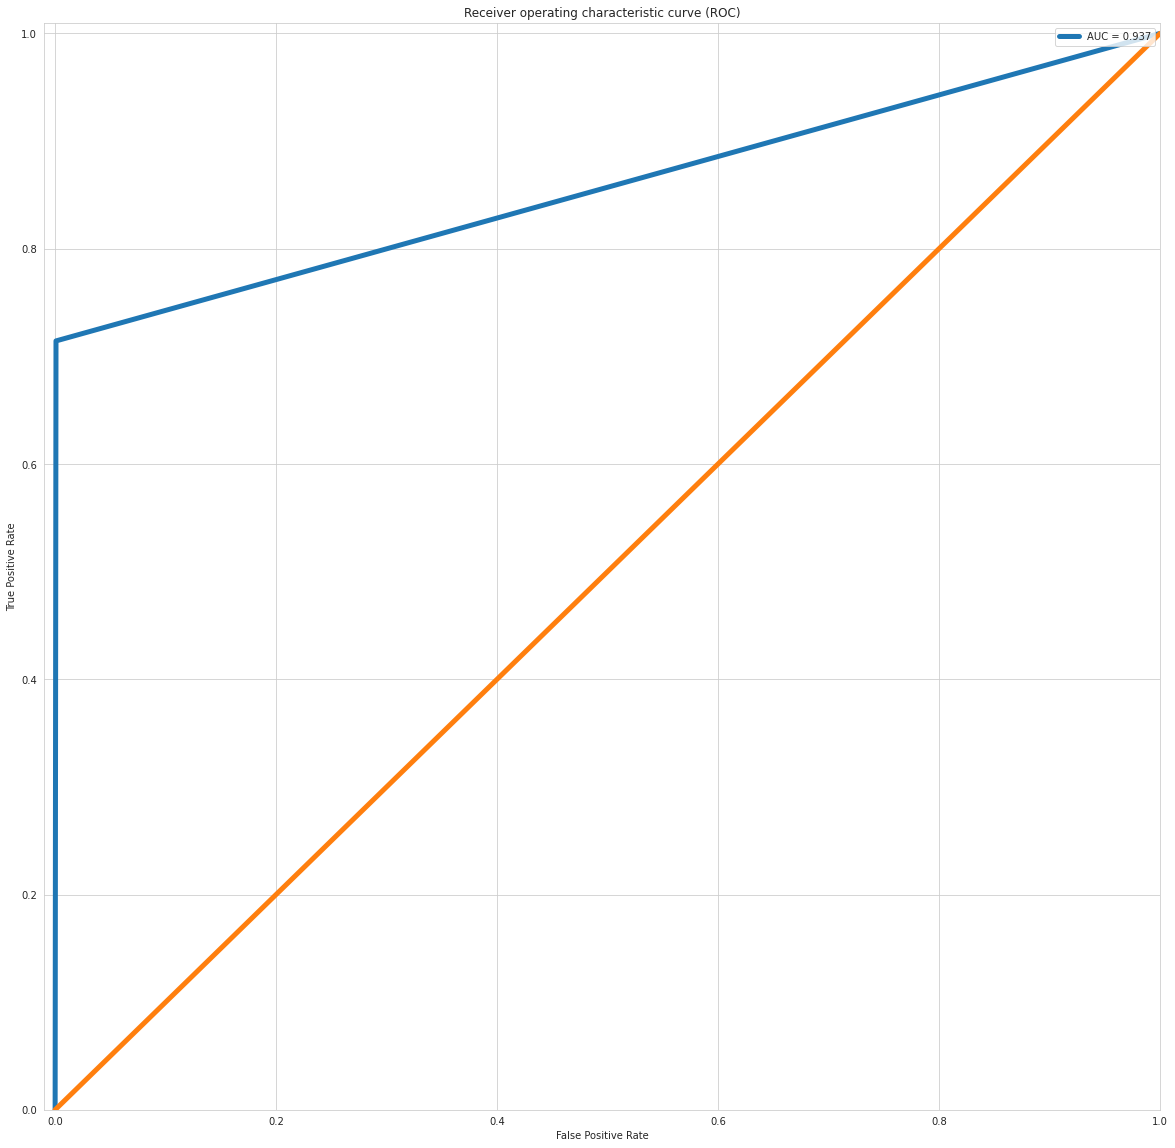

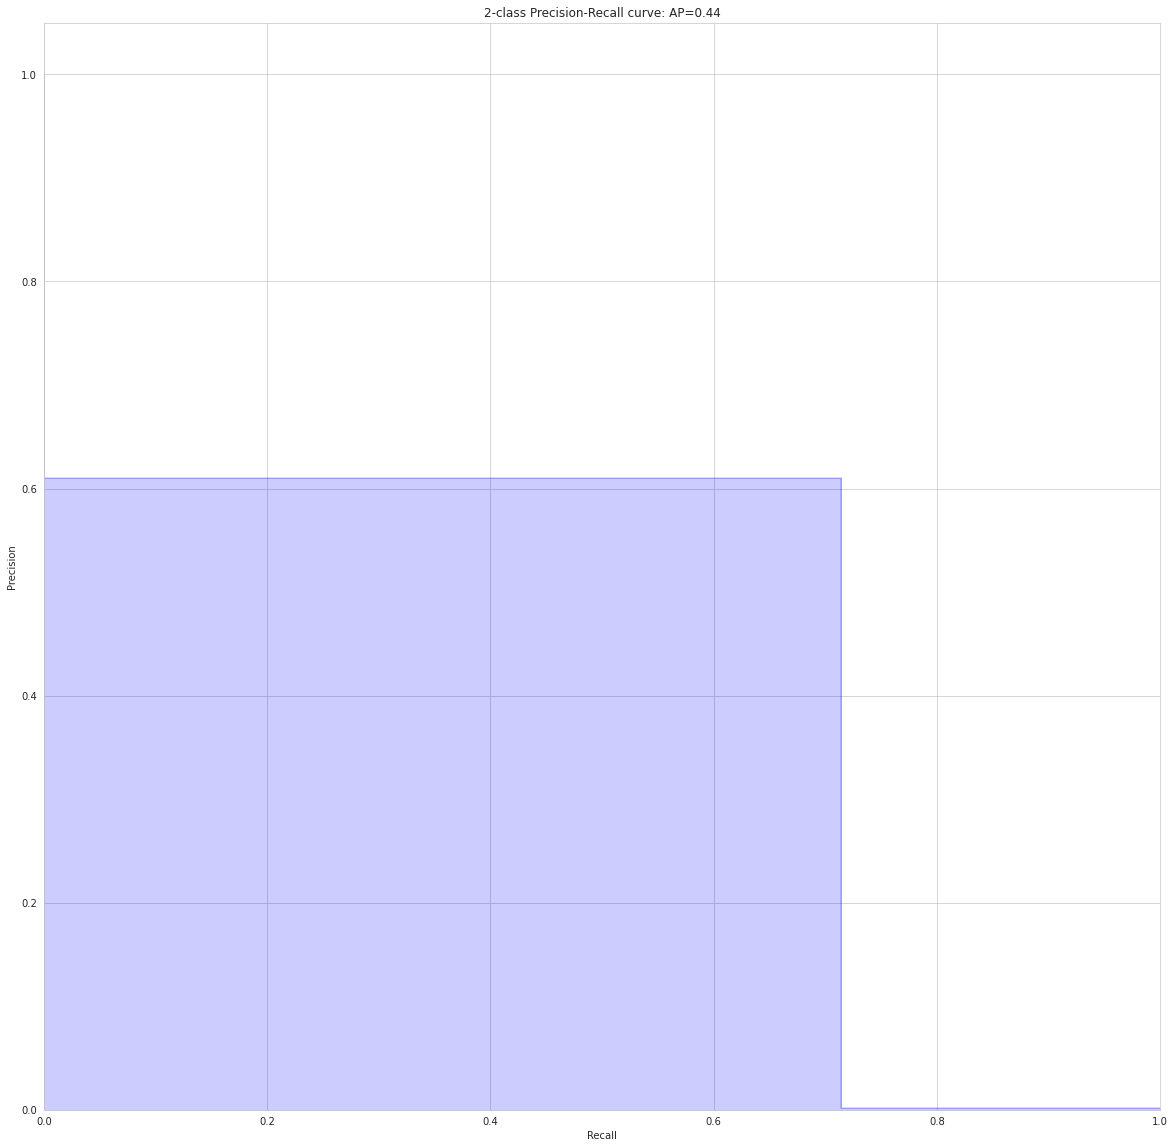

**********************************************************************
**********************************************************************
Random Forest Classifier with blSMOTE: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.06      0.11     85296
           1       0.00      1.00      0.00       147

    accuracy                           0.06     85443
   macro avg       0.50      0.53      0.06     85443
weighted avg       1.00      0.06      0.11     85443

Confusion matrix:
 [[ 4951 80345]
 [    0   147]]
Accuracy :0.05967
F1 Score: 0.003645878545120847
Recall score: 1.0
Precision score: 0.0018262684490384137


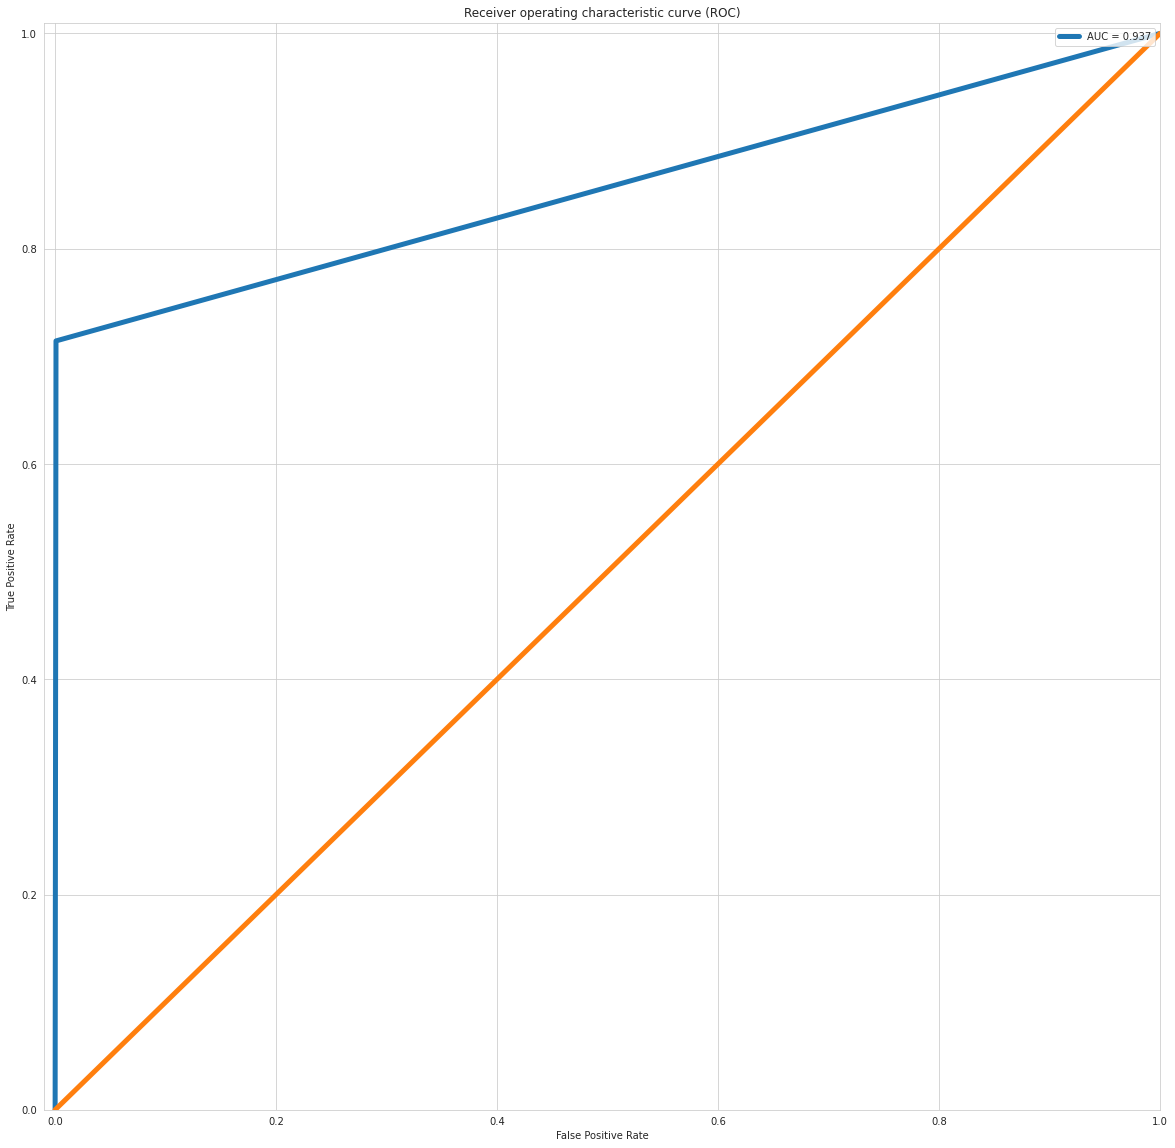

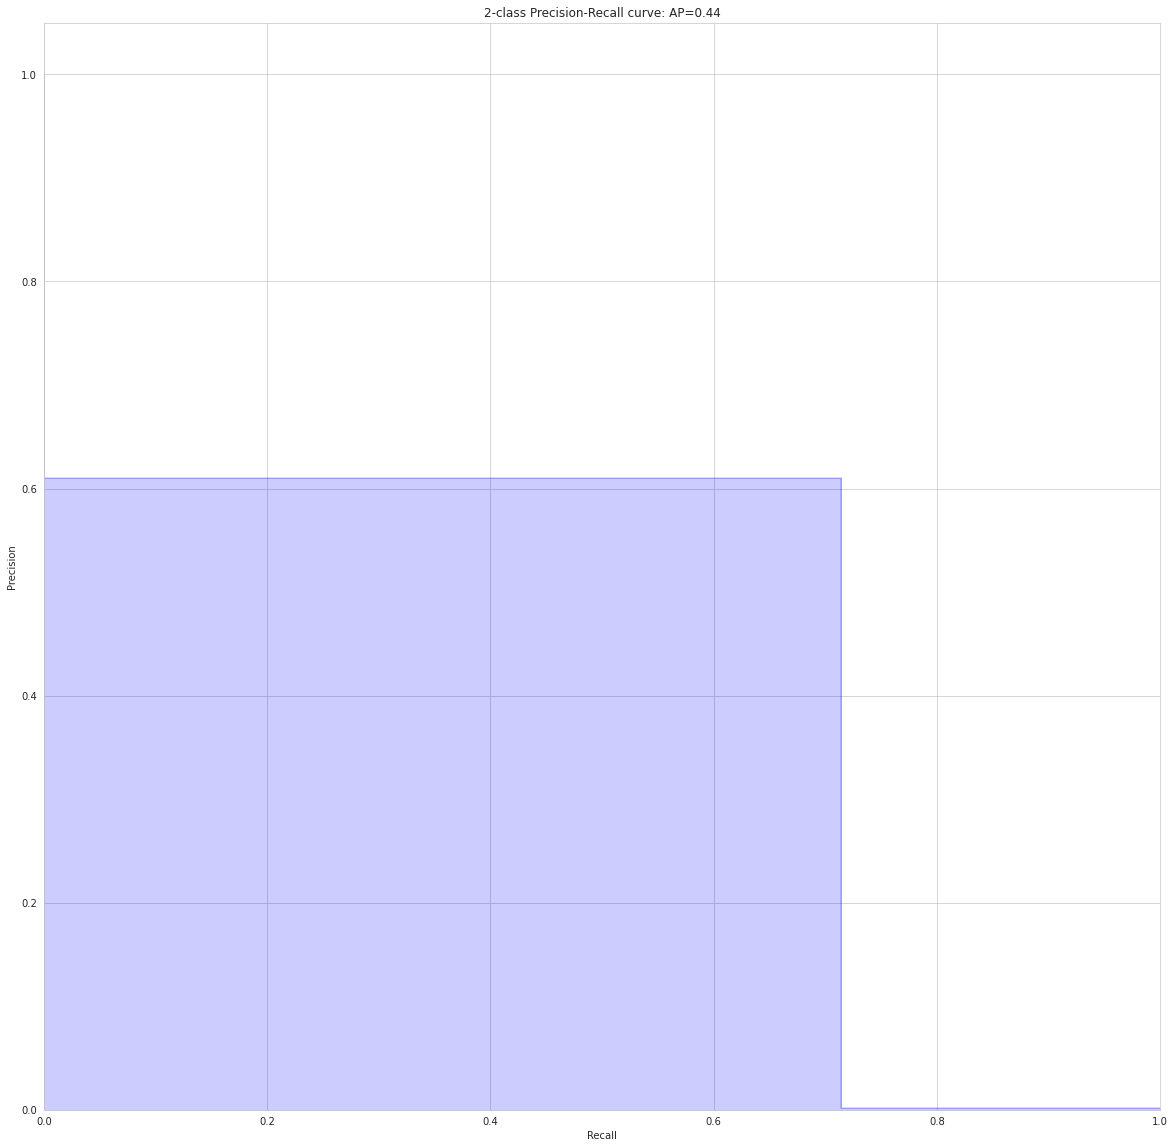

**********************************************************************
**********************************************************************
Random Forest Classifier with ADASYN: 
**********************************************************************
ROC AUC Score: 0.9371414247559837
Classification report:
               precision    recall  f1-score   support

           0       1.00      0.06      0.11     85296
           1       0.00      1.00      0.00       147

    accuracy                           0.06     85443
   macro avg       0.50      0.53      0.06     85443
weighted avg       1.00      0.06      0.11     85443

Confusion matrix:
 [[ 4951 80345]
 [    0   147]]
Accuracy :0.05967
F1 Score: 0.003645878545120847
Recall score: 1.0
Precision score: 0.0018262684490384137


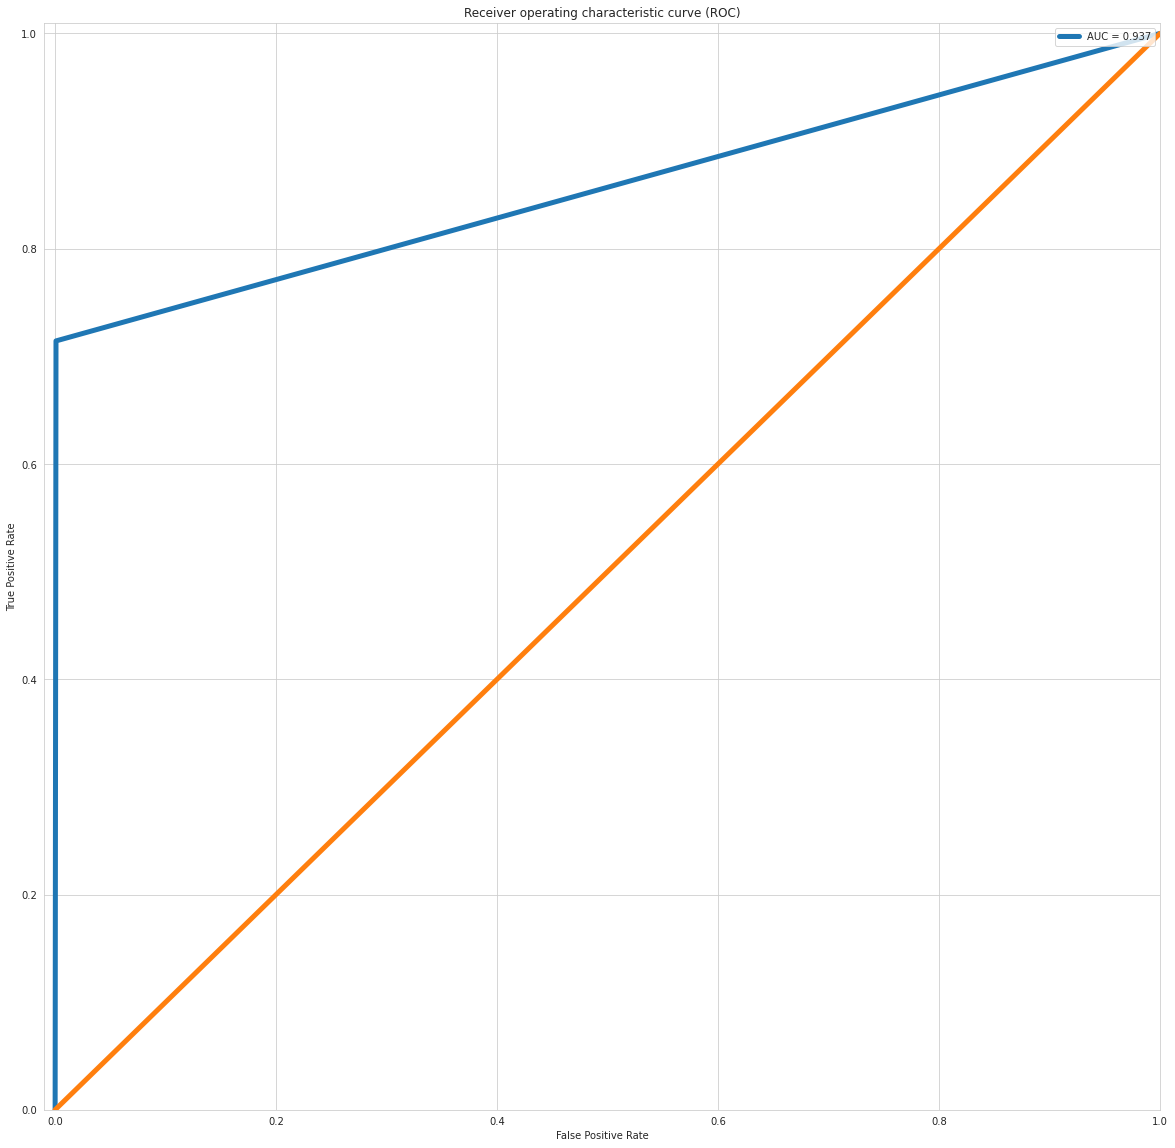

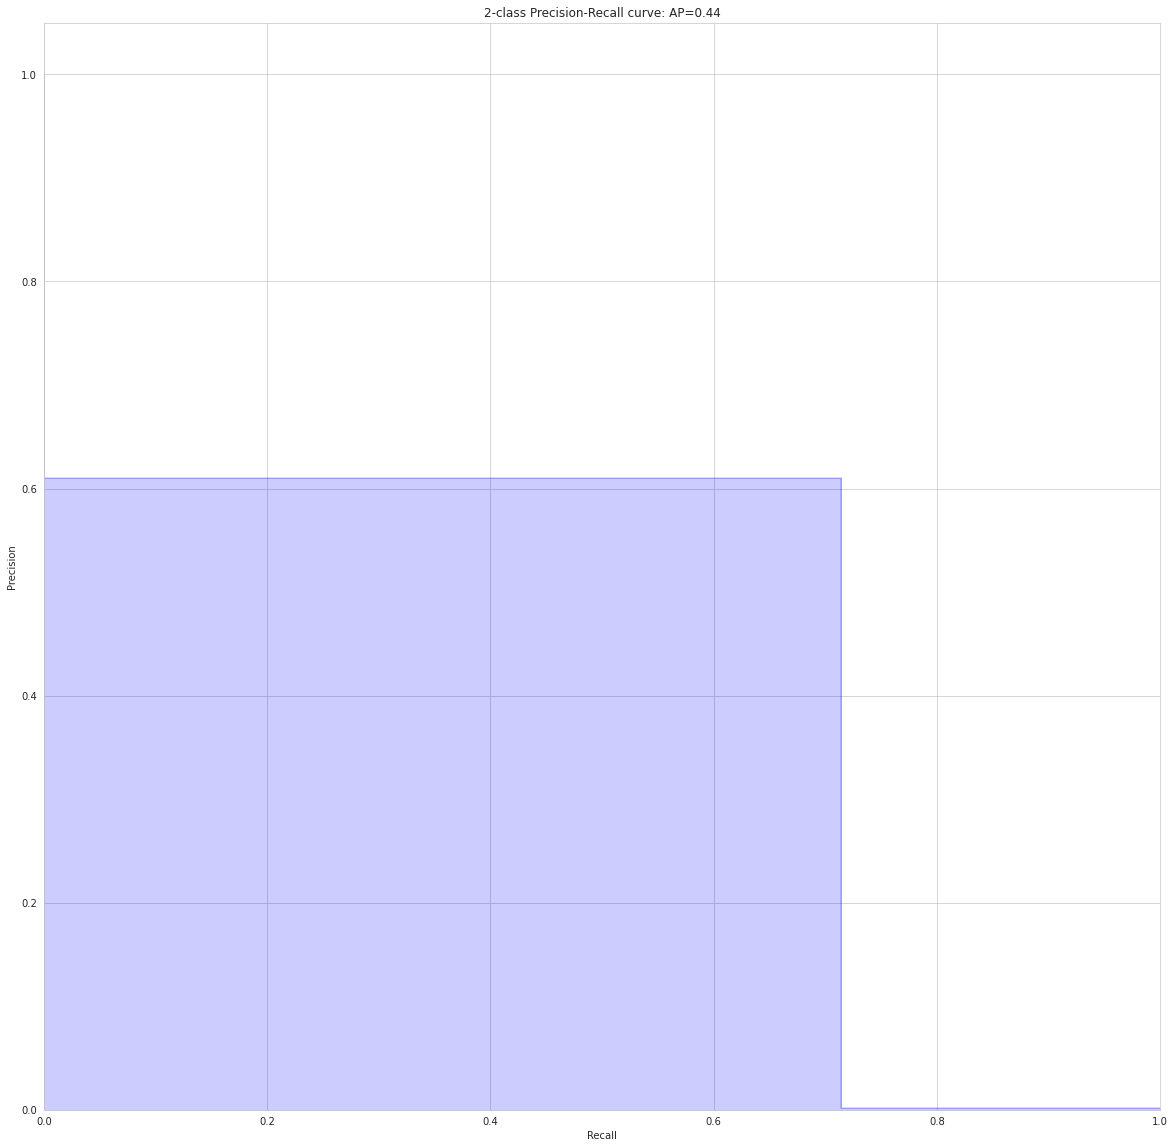

**********************************************************************


In [ ]:


# Resample your training data
rus = RandomUnderSampler()
ros = RandomOverSampler()
smote = SMOTE(kind='regular',random_state=5)
blsmote = BorderlineSMOTE(kind='borderline-2',random_state=5)
adasyn=ADASYN(random_state=0)

X_train_rus, y_train_rus = rus.fit_sample(X_train,y_train)
X_train_ros, y_train_ros = ros.fit_sample(X_train,y_train)
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)
X_train_blsmote, y_train_blsmote = blsmote.fit_sample(X_train,y_train)
X_train_ada, y_train_ada = adasyn.fit_resample(X_train,y_train)
model=RandomForestClassifier(bootstrap=True,
                               class_weight = {0:1,1:12},
                               criterion = 'entropy',
                               n_estimators = 30,
                               max_features = 'auto',
                               min_samples_leaf = 5,
                               max_depth = 3,
                               n_jobs = -1,
                               random_state = 5)



# Fit a logistic regression model to our data
rus_model = model.fit(X_train_rus, y_train_rus)
ros_model = model.fit(X_train_ros, y_train_ros)
smote_model = model.fit(X_train_smote, y_train_smote)
blsmote_model = model.fit(X_train_blsmote, y_train_blsmote)
adasyn_model = model.fit(X_train_ada, y_train_ada)
name='Random Forest Classifier: '
y_rus = rus_model.predict(X_test)
y_ros = ros_model.predict(X_test)
y_smote = smote_model.predict(X_test)
y_blsmote = blsmote_model.predict(X_test)
y_adasyn = adasyn_model.predict(X_test)

PrintModelResults('Random Forest Classifier with Random UnderSampling: ',y_test, y_rus,false_positive_rate, true_positive_rate, threshold)

PrintModelResults('Random Forest Classifier with Random OverSampling: ',y_test, y_ros,false_positive_rate, true_positive_rate, threshold)

PrintModelResults('Random Forest Classifier with SMOTE: ',y_test, y_smote,false_positive_rate, true_positive_rate, threshold)

PrintModelResults('Random Forest Classifier with blSMOTE: ',y_test, y_blsmote,false_positive_rate, true_positive_rate, threshold)

PrintModelResults('Random Forest Classifier with ADASYN: ',y_test, y_adasyn,false_positive_rate, true_positive_rate, threshold)

In [ ]:
# Import the pipeline module we need for this from imblearn
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import BorderlineSMOTE

# Define which resampling method and which ML model to use in the pipeline

resampling = BorderlineSMOTE(kind='borderline-2',random_state=0) # instead SMOTE(kind='borderline2') 
model = RandomForestClassifier() 

# Define the pipeline, tell it to combine SMOTE with the Random Forest Classifier model
pipeline = Pipeline([('SMOTE', resampling), ('Random Forest Classifier', model)])

# Fit your pipeline onto your training set and obtain predictions by fitting the model onto the test data 
pipeline.fit(X_train, y_train) 
y_predicted = pipeline.predict(X_test)

# Predict probabilities
probs = model.predict_proba(X_test)

# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults('Random Forest Classifier: ',y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

## Random Forest Classifier Model adjustments 

In [ ]:


# Define the model with balanced subsample
model = RandomForestClassifier(bootstrap=True,
                               class_weight={0:1, 1:12}, # 0: non-fraud , 1:fraud
                               criterion='entropy',
                               max_depth=10, # Change depth of model
                               min_samples_leaf=10, # Change the number of samples in leaf nodes
                               n_estimators=20, # Change the number of trees to use
                               n_jobs=-1, 
                               random_state=5)

# Fit your training model to your training set
model.fit(X_train, y_train)

# Obtain the predicted values and probabilities from the model 
y_predicted = model.predict(X_test)

# Calculate probs
probs = model.predict_proba(X_test)


# Create true and false positive rates
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_predicted)

PrintModelResults('Random Forest Classifier with pipeline: ',y_test, y_predicted,false_positive_rate, true_positive_rate, threshold)

# XG Boost with Resampled Data:

In [ ]:
# Resample your training data
rus = RandomUnderSampler()
ros = RandomOverSampler()
smote = SMOTE(kind='regular',random_state=5)
blsmote = BorderlineSMOTE(kind='borderline-2',random_state=5)
adasyn=ADASYN(random_state=0)

X_train_rus, y_train_rus = rus.fit_sample(X_train,y_train)
X_train_ros, y_train_ros = ros.fit_sample(X_train,y_train)
X_train_smote, y_train_smote = smote.fit_sample(X_train,y_train)
X_train_blsmote, y_train_blsmote = blsmote.fit_sample(X_train,y_train)
X_train_ada, y_train_ada = adasyn.fit_resample(X_train,y_train)
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)
# Fit a logistic regression model to our data
rus_model = model.fit(X_train_rus, y_train_rus)
ros_model = model.fit(X_train_ros, y_train_ros)
smote_model = model.fit(X_train_smote, y_train_smote)
blsmote_model = model.fit(X_train_blsmote, y_train_blsmote)
adasyn_model = model.fit(X_train_ada, y_train_ada)
name='XGBoost Classifier: '
y_rus = rus_model.predict(X_test)
y_ros = ros_model.predict(X_test)
y_smote = smote_model.predict(X_test)
y_blsmote = blsmote_model.predict(X_test)
y_adasyn = adasyn_model.predict(X_test)

PrintModelResults('XGBoost Classifier with Random Under Sampling: ',y_test, y_rus,false_positive_rate, true_positive_rate, threshold)

PrintModelResults('XGBoost Classifier  with Random Over Sampling: ',y_test, y_ros,false_positive_rate, true_positive_rate, threshold)

PrintModelResults('XGBoost Classifier with SMOTE: ',y_test, y_smote,false_positive_rate, true_positive_rate, threshold)

PrintModelResults('XGBoost Classifier  with SMOTE: ',y_test, y_blsmote,false_positive_rate, true_positive_rate, threshold)

PrintModelResults('XGBoost Classifier with ADASYN: ',y_test, y_adasyn,false_positive_rate, true_positive_rate, threshold)

Choosing best model on the balanced data
He we balanced the data with various approach such as Undersampling, Oversampling, SMOTE and Adasy. With every data balancing thechnique we built several models such as Logistic, XGBoost, Decision Tree, and Random Forest.

We can see that almost all the models performed more or less good. But we should be interested in the best model.

Though the Undersampling technique models performed well, we should keep mind that by doing the undersampling some imformation were lost. Hence, it is better not to consider the undersampling models.

Whereas the SMOTE and Adasyn models performed well. Among those models the simplist model Logistic regression has ROC score 0.99 in the train set and 0.97 on the test set. We can consider the Logistic model as the best model to choose because of the easy interpretation of the models and also the resourse requirements to build the mdoel is lesser than the other heavy models such as Random forest or XGBoost.

Hence, we can conclude that the Logistic regression model with SMOTE is the best model for its simlicity and less resource requirement.

# Print the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

In [ ]:
var_imp = []
smote_model = LogisticRegression().fit(X_train_smote, y_train_smote)
y_smote = smote_model.predict(X_test)
# Predictions on the train set
y_train_pred = smote_model.predict(X_train_smote)
print('Train auc =', metrics.roc_auc_score(y_train_smote, y_train_pred))
fpr, tpr, thresholds = metrics.roc_curve(y_train_smote, y_train_pred)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)
print("fpr, tpr=",fpr, tpr)

# Result Summary:

# Results of models with imbalanced records:

**************************************************
## Logistic Regression:
**************************************************
- ROC AUC Score: 0.9723342769859773
- F1 Score: 0.728
- Recall score: 0.6190476190476191
- Precision score: 0.883495145631068
- Accuracy :0.99940

**************************************************
## Decision Tree Classifier: 
**************************************************
- ROC AUC Score: 0.9723342769859773
- F1 Score: 0.8086642599277978
- Recall score: 0.7619047619047619
- Precision score: 0.8615384615384616
- accuracy:85390/85443=99.93%

**************************************************
## Random Forest Classifier: 
**************************************************
- ROC AUC Score: 0.9338118031868534
- F1 Score: 0.8172043010752688
- Recall score: 0.7755102040816326
- Precision score: 0.8636363636363636
- Accuracy:99.93%
**************************************************
## Voting Classifier: 
**************************************************
- ROC AUC Score: 0.9338118031868534
- F1 Score: 0.8439716312056739
- Recall score: 0.8095238095238095
- Precision score: 0.8814814814814815
- Accuracy :0.99940

*****************************************************
## XG Boost: 
*****************************************************
- ROC AUC Score: 0.9338116038011528
- Accuracy :0.99949
- F1 Score: 0.8358208955223881
- Recall score: 0.7619047619047619
- Precision score: 0.9256198347107438






# Results of models with balanced records:

*****************************************************
## Logistic Regression with RandomUnderSampling: 
*****************************************************
- ROC AUC Score: 0.9614695507728508
- Accuracy :0.95770
- F1 Score: 0.06999485331960886
- Recall score: 0.9251700680272109
- Precision score: 0.036373361861460285


*****************************************************
## Logistic Regression with RandomOverSampling: 
*****************************************************
- ROC AUC Score: 0.9614695507728508
- Accuracy :0.97536
- F1 Score: 0.11368421052631579
- Recall score: 0.9183673469387755
- Precision score: 0.06059245960502693


*****************************************************
## Logistic Regression with SMOTE: 
*****************************************************
- ROC AUC Score: 0.9614695507728508
- Accuracy :0.97250
- F1 Score: 0.10305343511450381
- Recall score: 0.9183673469387755
- Precision score: 0.054589567327133035


*****************************************************
## Logistic Regression with blSmote: 
*****************************************************
- ROC AUC Score: 0.9614695507728508
- Accuracy :0.97999
- F1 Score: 0.13109756097560976
- Recall score: 0.8775510204081632
- Precision score: 0.07084019769357495


*****************************************************
## Logistic Regression with ADASYN: 
*****************************************************
- ROC AUC Score: 0.9614695507728508
- Accuracy :0.90632
- F1 Score: 0.033800096571704484
- Recall score: 0.9523809523809523
- Precision score: 0.017205358240137643


*****************************************************
## Decision Tree Classifier with Random UnderSampling: 
*****************************************************
- ROC AUC Score: 0.9614695507728508
- Accuracy :0.84546
- F1 Score: 0.020329425730820597
- Recall score: 0.9319727891156463
- Precision score: 0.010276798439726953


*****************************************************
## Decision Tree Classifier with Random OverSampling: 
*****************************************************
- ROC AUC Score: 0.9614695507728508
- Accuracy :0.84546
- F1 Score: 0.020329425730820597
- Recall score: 0.9319727891156463
- Precision score: 0.010276798439726953


*****************************************************
## Decision Tree Classifier with SMOTE: 
*****************************************************
- ROC AUC Score: 0.9614695507728508
- Accuracy :0.84546
- F1 Score: 0.020329425730820597
- Recall score: 0.9319727891156463
- Precision score: 0.010276798439726953


*****************************************************
## Decision Tree Classifier with blSMOTE: 
*****************************************************
- ROC AUC Score: 0.9614695507728508
- Accuracy :0.84546
- F1 Score: 0.020329425730820597
- Recall score: 0.9319727891156463
- Precision score: 0.010276798439726953


*****************************************************
##  Decision Tree Classifier with ADASYN: 
*****************************************************
- ROC AUC Score: 0.9614695507728508

- Accuracy :0.84546
- F1 Score: 0.020329425730820597
- Recall score: 0.9319727891156463
- Precision score: 0.010276798439726953


*****************************************************
##  Random Forest Classifier with Random UnderSampling: 
*****************************************************
- ROC AUC Score: 0.9614695507728508
- Accuracy :0.05967
- F1 Score: 0.003645878545120847
- Recall score: 1.0
- Precision score: 0.0018262684490384137


*****************************************************
## Random Forest Classifier with Random OverSampling: 
*****************************************************
- ROC AUC Score: 0.9614695507728508
- Accuracy :0.05967
- F1 Score: 0.003645878545120847
- Recall score: 1.0
- Precision score: 0.0018262684490384137


*****************************************************
## Random Forest Classifier with SMOTE: 
*****************************************************
- ROC AUC Score: 0.9614695507728508
- Accuracy :0.05967
- F1 Score: 0.003645878545120847
- Recall score: 1.0
- Precision score: 0.0018262684490384137


*****************************************************
## Random Forest Classifier with blSMOTE: 
*****************************************************
- ROC AUC Score: 0.9614695507728508
- Accuracy :0.05967
- F1 Score: 0.003645878545120847
- Recall score: 1.0
- Precision score: 0.0018262684490384137


*****************************************************
## Random Forest Classifier with ADASYN: 
*****************************************************
- ROC AUC Score: 0.9614695507728508
- Accuracy :0.05967
- F1 Score: 0.003645878545120847
- Recall score: 1.0
- Precision score: 0.0018262684490384137


*****************************************************
## XGBoost Classifier with Random Under Sampling: 
*****************************************************
- ROC AUC Score: 0.9614695507728508
- Accuracy :0.94655
- F1 Score: 0.05425553944916131
- Recall score: 0.891156462585034
- Precision score: 0.02797949594190517


*****************************************************
## XGBoost Classifier  with Random Over Sampling: 
*****************************************************
- ROC AUC Score: 0.9614695507728508
- Accuracy :0.94655
- F1 Score: 0.05425553944916131
- Recall score: 0.891156462585034
- Precision score: 0.02797949594190517


*****************************************************
## XGBoost Classifier with SMOTE: 
*****************************************************
- ROC AUC Score: 0.9614695507728508
- Accuracy :0.94655
- F1 Score: 0.05425553944916131
- Recall score: 0.891156462585034
- Precision score: 0.02797949594190517


*****************************************************
##  XGBoost Classifier  with SMOTE: 
*****************************************************
- ROC AUC Score: 0.9614695507728508

- Accuracy :0.94655
- F1 Score: 0.05425553944916131
- Recall score: 0.891156462585034
- Precision score: 0.02797949594190517


*****************************************************
## XGBoost Classifier with ADASYN: 
*****************************************************
- ROC AUC Score: 0.9614695507728508
- Accuracy :0.94655
- F1 Score: 0.05425553944916131
- Recall score: 0.891156462585034
- Precision score: 0.02797949594190517


*****************************************************

## Cost benefit analysis
We have tried several models till now with both balanced and imbalanced data. We have noticed most of the models have performed more or less well in terms of ROC score, Precision and Recall.

But while picking the best model we should consider few things such as whether we have required infrastructure, resources or computational power to run the model or not. For the models such as Random forest, SVM, XGBoost,Voting Classifier we require heavy computational resources and eventually to build that infrastructure the cost of deploying the model increases. On the other hand the simpler model such as Logistic regression requires less computational resources, so the cost of building the model is less.

We also have to consider that for little change of the ROC score how much monetary loss of gain the bank incur. If the amount if huge then we have to consider building the complex model even though the cost of building the model is high. 

## Summary to  business
For banks with smaller average transaction value, we would want high precision because we only want to label relevant transactions as fraudulent. However, when precision is low, such tasks are a burden because the human element has to be increased.

For banks having a larger transaction value, if the recall is low, i.e., it is unable to detect transactions that are labelled as non-fraudulent. So we have to consider the losses if the missed transaction was a high-value fraudulent one.

So here, to save the banks from high-value fraudulent transactions, we have to focus on a high recall in order to detect actual fraudulent transactions.

After performing several models, we have seen that in the balanced dataset with SMOTE technique the simplest Logistic regression model has good ROC score and also high Recall. Hence, we can go with the logistic model here. It is also easier to interpret and explain to the business plus it is cost effective also.